In [ ]:
# installer colored
pip install colored

In [ ]:
pip install termcolor

In [ ]:
pip install flake8

In [ ]:
pip install autopep8

In [ ]:
pip install lightgbm

In [ ]:
pip install xgboost

In [1]:
import sys
sys.path.append("work/mylib")

In [2]:
# Importation de ma librairie POO

from exploratory_data_analysis.DataExplorerFond import DataExplorerFond
from exploratory_data_analysis.UnivariateDataExplorer import UnivariateDataExplorer
from exploratory_data_analysis.DistributionDataExplorer import DistributionDataExplorer
from exploratory_data_analysis.BivariateDataExplorer import BivariateDataExplorer
from exploratory_data_analysis.MyPCA import MyPCA
from exploratory_data_analysis.MyTSNE import MyTSNE

from machine_learning.PipelineBaselineMultiMetrics import PipelineBaselineMultiMetrics
from machine_learning.PipelineBaselineOneMetric import PipelineBaselineOneMetric

In [4]:
#Librairie de base
from pymongo import MongoClient
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
plt.style.use('ggplot')
from termcolor import colored
#from tabulate import tabulate
from IPython.core.display import display, HTML, Markdown
import timeit
display(HTML(""))
import json
from typing import List, Union 

# warning
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

#librairie tests statistiques 
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest

# Pipeline composite
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline as imbpipeline
from sklearn import set_config
set_config(display='diagram')

#datacleaning
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#feature sélection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif , mutual_info_classif

#Feature engineering
#from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection, DropCorrelatedFeatures

# selection modèle 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate, cross_val_score

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


# Réduction dimension linéaire features
from sklearn.decomposition import PCA

# Réduction dimension non linéaire features
from sklearn.manifold import TSNE

#Import algorithmes 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# oversampling
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline as imbpipeline

# Metrics
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score, make_scorer

# Tracking models et hyperparamètres 
#import mlflow
#import mlflow.sklearn
#from optuna.integration.mlflow import MLflowCallback

# Framework optimisation
#import optuna
#from optuna import Trial, visualization
#from optuna.samplers import TPESampler
#from optuna.integration.mlflow import MLflowCallback

# pkl model
import joblib
import pickle

#Interprétation local et global 
#import shap
#from lime.lime_tabular import LimeTabularExplainer
     

# 1) Connexion et insérer des données dans MongoDB

In [ ]:
# Connect
client = MongoClient("mongodb://mongo:27017")

# Connect to database
db = client['DB_TEST']

coll = db['Churn_collection']


# read et loads chaques lignes pour inserer dans database (DB_TEST) et collection (col_restaurants)

json_file_path = "Bank Customer Churn Prediction2.json"

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

# insérer les données 
coll.insert_many(contents)

# 2) connection et extraction churn collection

In [5]:
import pymongo
import json
client = MongoClient("mongodb://mongo:27017")
# Connect to database DB_TEST
db = client['DB_TEST']
# la Churn_collection
coll = db['Churn_collection']
# utiliser methode find pour récupérer les données churn
cursor = coll.find()
cursor

In [6]:
pipeline = [
  #Stage 1: Trouver les documents contenant les clients en France 
  {
    "$match": { "country": "France"}
  },
  # Stage 2: Trier les  credit_score (ASCENDING)
  {
    "$sort": {"credit_score": pymongo.ASCENDING }
  }
]

#Transformer pipeline en dataframe pandas 
results = coll.aggregate(pipeline)
results_pipe = pd.DataFrame(list(results))
results_pipe.tail()

_id  customer_id  credit_score country  gender  \
5009  640894efdb2eeb47f5c4083d     15682868           850  France  Female   
5010  640894efdb2eeb47f5c40873     15709256           850  France  Female   
5011  640894efdb2eeb47f5c408de     15730579           850  France    Male   
5012  640894efdb2eeb47f5c409d1     15647800           850  France  Female   
5013  640894efdb2eeb47f5c409e3     15798615           850  France  Female   

      age  tenure    balance  products_number  credit_card  active_member  \
5009   40       9   99816.46                1            1              1   
5010   28       9       0.00                2            1              1   
5011   68       5  169445.40                1            1              1   
5012   34       6  101266.51                1            1              0   
5013   47       9  137301.87                1            1              0   

      estimated_salary  churn  
5009         163989.66      1  
5010         164864.67      0  
5011         186335.07      0  
5012          33501.98      0  
5013          44351.77      0

# 3) Train test split

- [X] les dimensions du df_churn: (10000, 13)
- [X] le df_churn à été séparé pour eviter data leakage (train_set (80%) , test_set (20%))
- [X] Ne pas utiliser testset

In [7]:
#Création d'un dataframe
df_original = pd.DataFrame(list(cursor))

In [8]:
# copy du dataframe df_original
df_churn = df_original.copy()
# Vérifier les dimensions
print("Les dimensions du df_churn:",df_churn.shape)

Les dimensions du df_churn: (10000, 13)


In [9]:
#Séparer le df_churn en train_set et test_set
trainset, testset = train_test_split(df_churn, test_size=0.2, random_state=7777)

# 3) Data exploration trainset

- [X] Les dimensions du trainset: (8000, 13)

- [X] Il n'y a pas de valeurs manquantes

- [X] Pas de doublons



In [10]:
# voir trainset first row
trainset.head(1)

_id  customer_id  credit_score country  gender  \
6480  640894efdb2eeb47f5c3fc56     15693704           679  France  Female   

      age  tenure    balance  products_number  credit_card  active_member  \
6480   24       6  114948.76                2            0              1   

      estimated_salary  churn  
6480         135768.25      0

In [11]:
# Vérifier les dimensions
print("Les dimensions du trainset:",trainset.shape)

Les dimensions du trainset: (8000, 13)


In [12]:
# voir les valeurs manquantes 
trainset.isnull().sum()

_id                 0
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [13]:
# voir types des colonnes
trainset.dtypes

_id                  object
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [14]:
# voir describe
trainset.describe()

customer_id  credit_score          age       tenure        balance  \
count  8.000000e+03   8000.000000  8000.000000  8000.000000    8000.000000   
mean   1.569030e+07    650.069000    38.923250     4.983750   76907.465613   
std    7.226716e+04     96.945286    10.460905     2.887824   62387.799836   
min    1.556570e+07    350.000000    18.000000     0.000000       0.000000   
25%    1.562751e+07    584.000000    32.000000     2.000000       0.000000   
50%    1.568978e+07    651.000000    37.000000     5.000000   97387.355000   
75%    1.575327e+07    718.000000    44.000000     7.000000  127916.345000   
max    1.581569e+07    850.000000    92.000000    10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count       8000.00000  8000.000000    8000.000000       8000.000000   
mean           1.52800     0.706625       0.516125      99806.139843   
std            0.58117     0.455337       0.499771      57488.702139   
min            1.00000     0.000000       0.000000         11.580000   
25%            1.00000     0.000000       0.000000      50857.102500   
50%            1.00000     1.000000       1.000000      99969.915000   
75%            2.00000     1.000000       1.000000     148733.105000   
max            4.00000     1.000000       1.000000     199992.480000   

             churn  
count  8000.000000  
mean      0.204250  
std       0.403178  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [15]:
#instancie un objet de la DataExplorerFond et l'assigne à la variable explorer_fond.
explorer_fond = DataExplorerFond(trainset)
# appeler methode pour vérification des doublons 
explorer_fond.doublons()

Les doublons dans trainset: 0


In [16]:
#Appeler methode unique_multi_cols pour vérifier les valeurs uniques 
explorer_fond.unique_multi_cols()


_id

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 8000

[ObjectId('640894efdb2eeb47f5c3fc56') ObjectId('640894efdb2eeb47f5c400e6')
 ObjectId('640894efdb2eeb47f5c4025b') ...
 ObjectId('640894efdb2eeb47f5c40282') ObjectId('640894efdb2eeb47f5c3fb16')
 ObjectId('640894efdb2eeb47f5c3efcc')]

---------------------------------------------------------------------------------------

customer_id

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 8000

[15693704 15665374 15697691 ... 15776596 15706128 15629885]

---------------------------------------------------------------------------------------

credit_score

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 456

[679 610 512 674 624 794 645 662 803 704 531 655 688 599 641 661 597 850
 748 582 700 659 642 757 592 443 668 731 576 746 501 760 589 553 530 632
 638 658 606 498 725 593 478 735 603 795 639 584 540 781 633 778 572 703
 497 542 697 687 509 625 528 543 736 547 671 695 605 523 698 722 484 798
 716 670 713 555 537 554 616

## Analyse univariée trainset

- [X] Les clients sont plus représenter

   France (50,2%)
   Germany (25%)
   Spain (24.7%)
   
- [X] Le sexe des clients
   
   Male (54.8%)
   female (45.2%)
   
- [ ] Il y a quelques outliers
   expérimenter (suppression ou transformation gaussienne)

In [17]:
# supprimer colonnes '_id', 'customer_id'
trainset = trainset.drop(columns=['_id', 'customer_id'])
testset = testset.drop(columns=['_id', 'customer_id'])
# Création listes 'object', 'int64'
li_number = list(trainset.select_dtypes(include=['number']))
li_cat = list(trainset.select_dtypes(exclude=['number']))

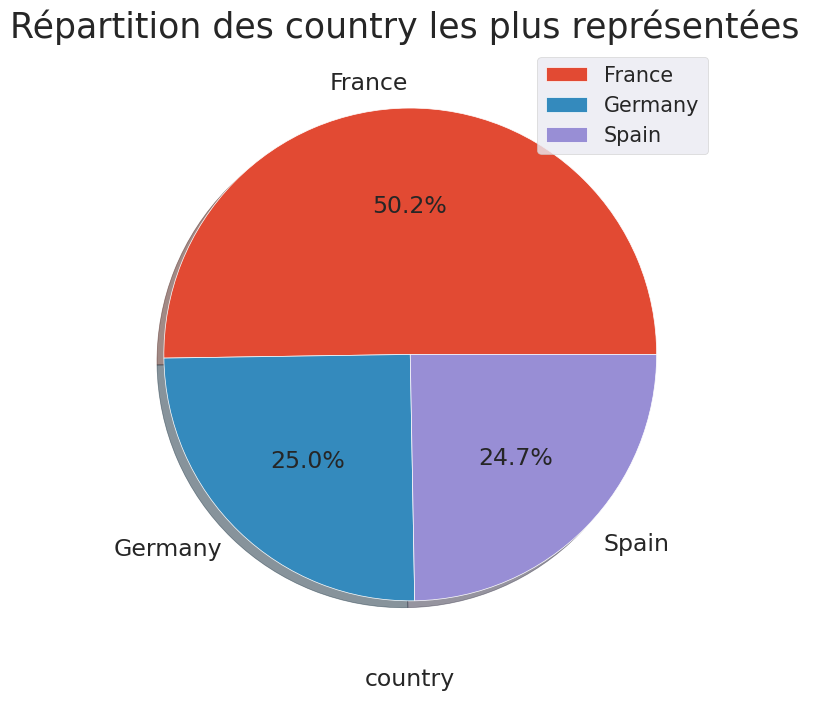

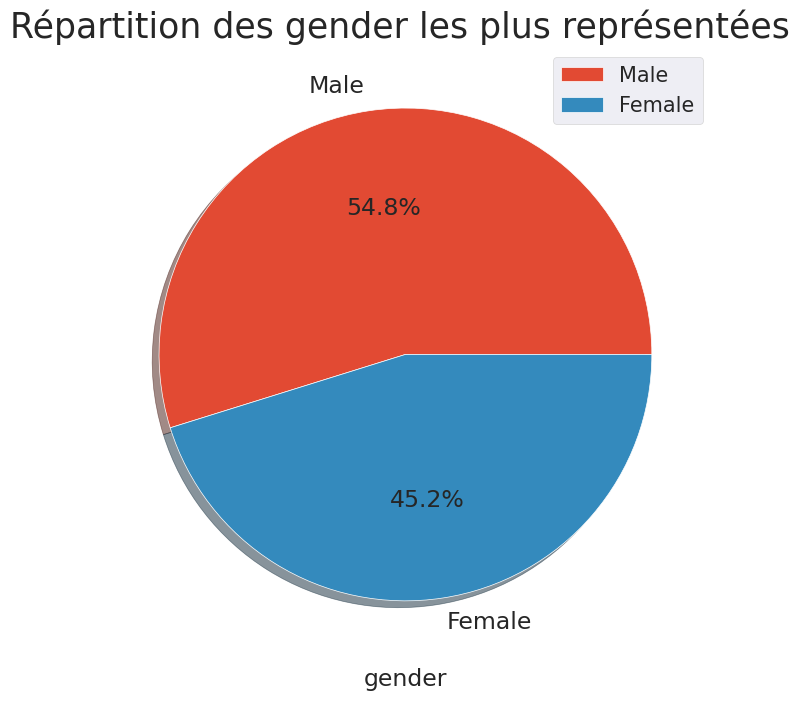

In [62]:
#instancie un objet de la class UnivariateDataExplorer et l'assigne à la variable Univariate_viz.
Univariate_viz = UnivariateDataExplorer(trainset)

# appeler methode categ_pie_plot pour afficher les variables objects avec plot cammenbert 
for col in li_cat:
    Univariate_viz.categ_pie_plot(col)

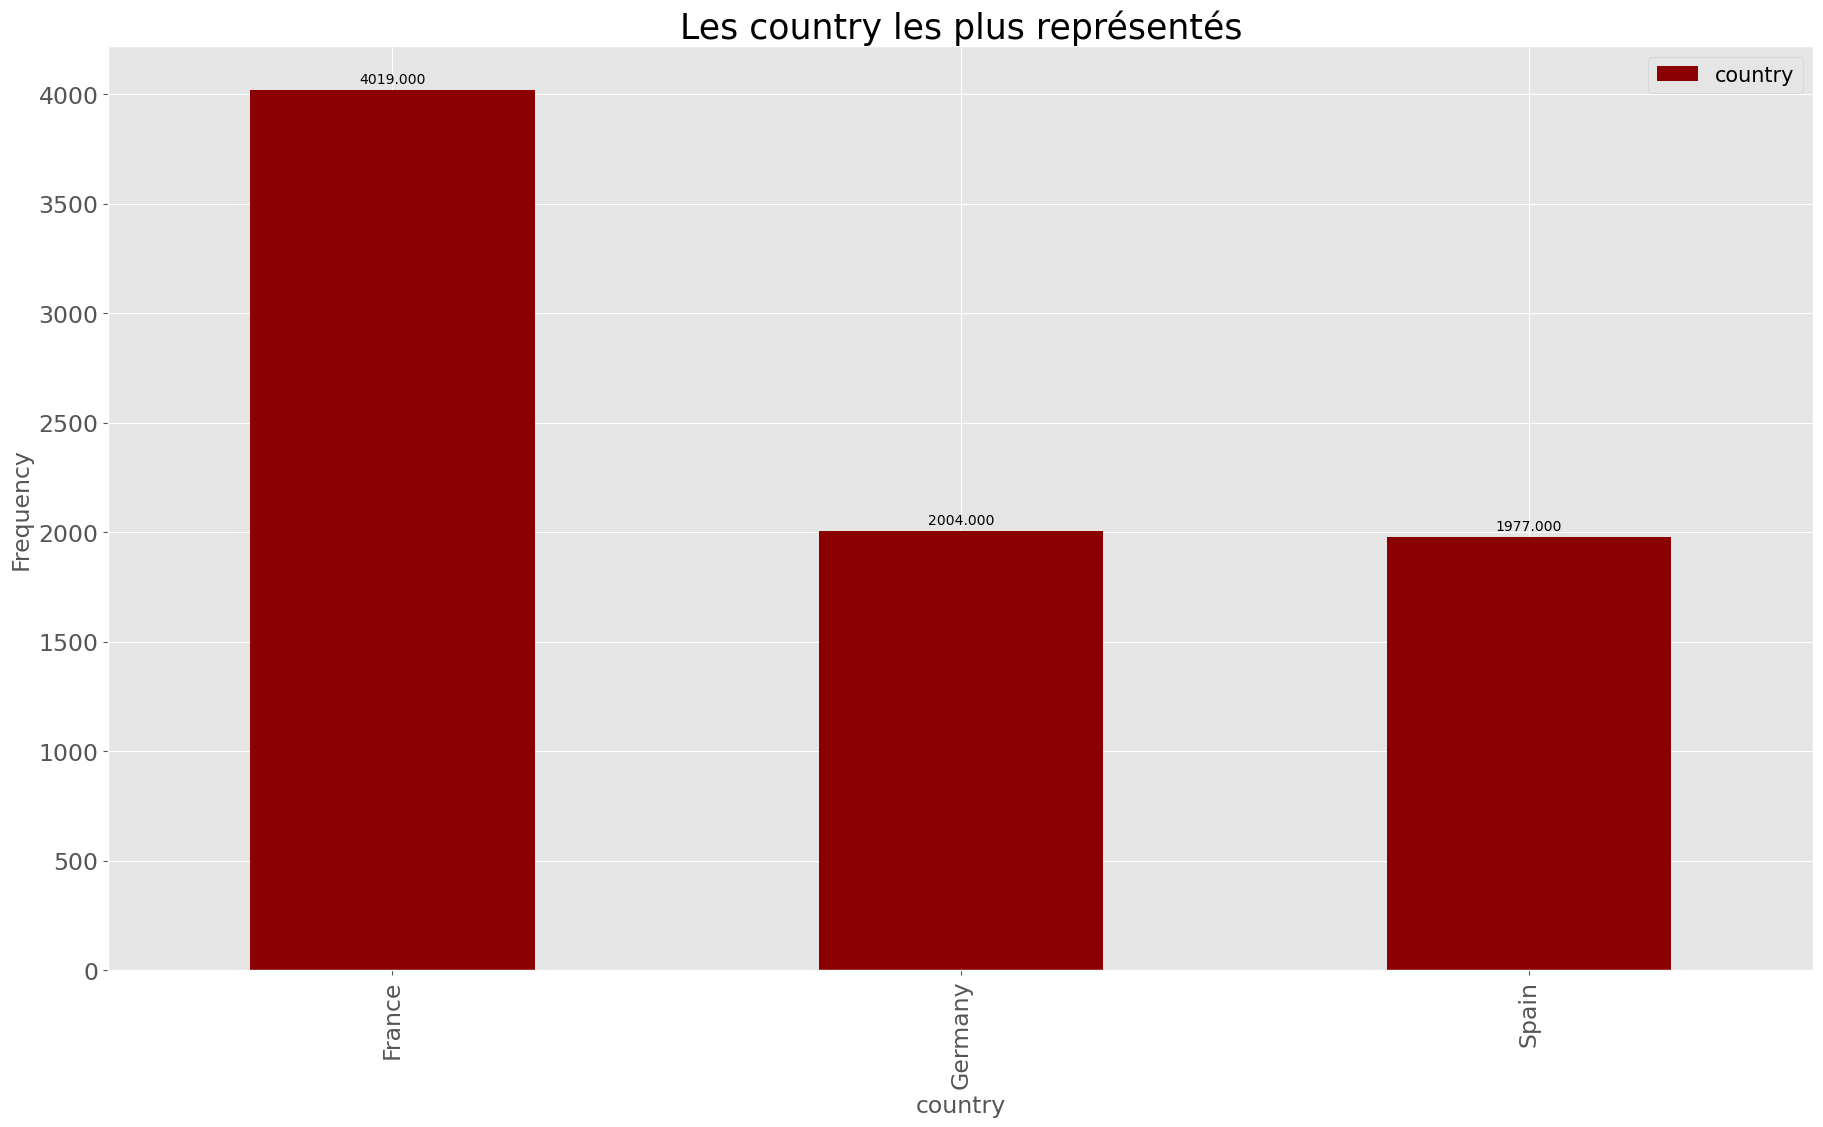

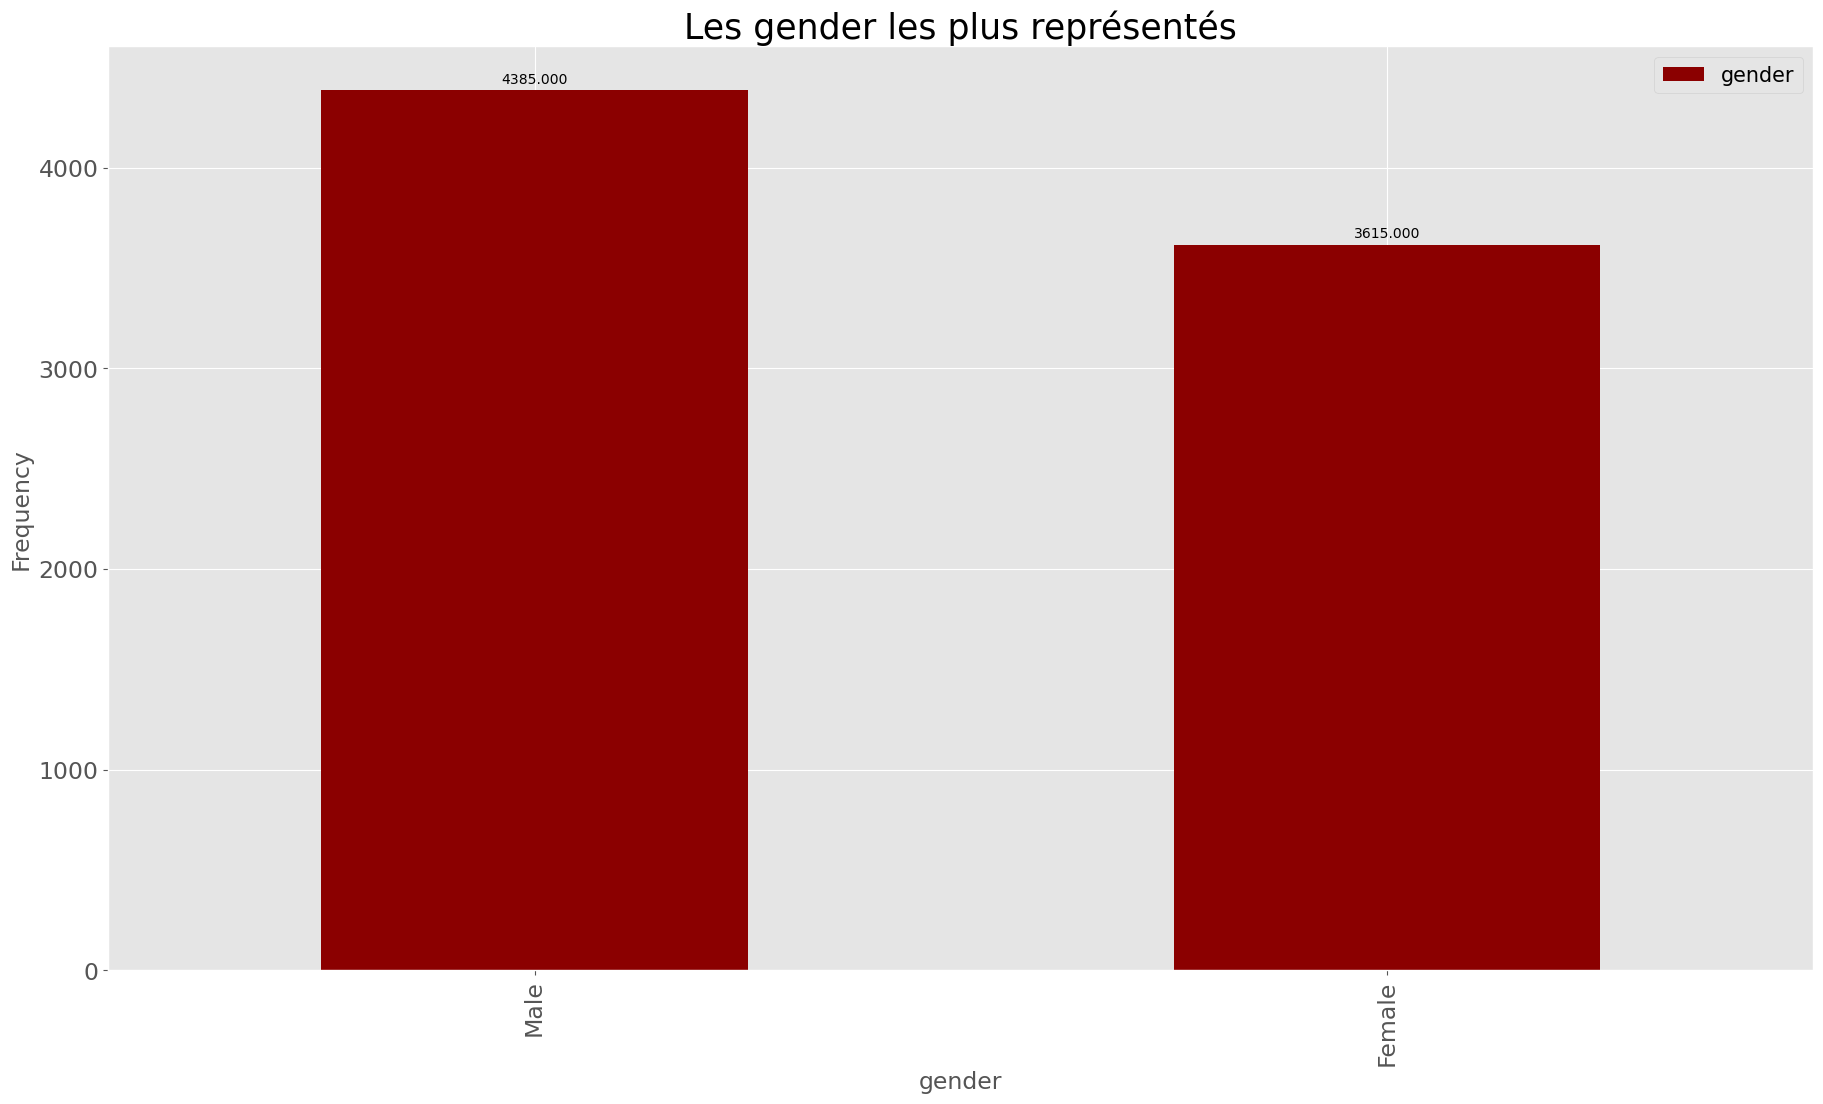

In [19]:
# Appeler methode categ_barplot pour afficher les variables objects avec barplot
for col in li_cat:
    Univariate_viz.categ_bar_plot(col)

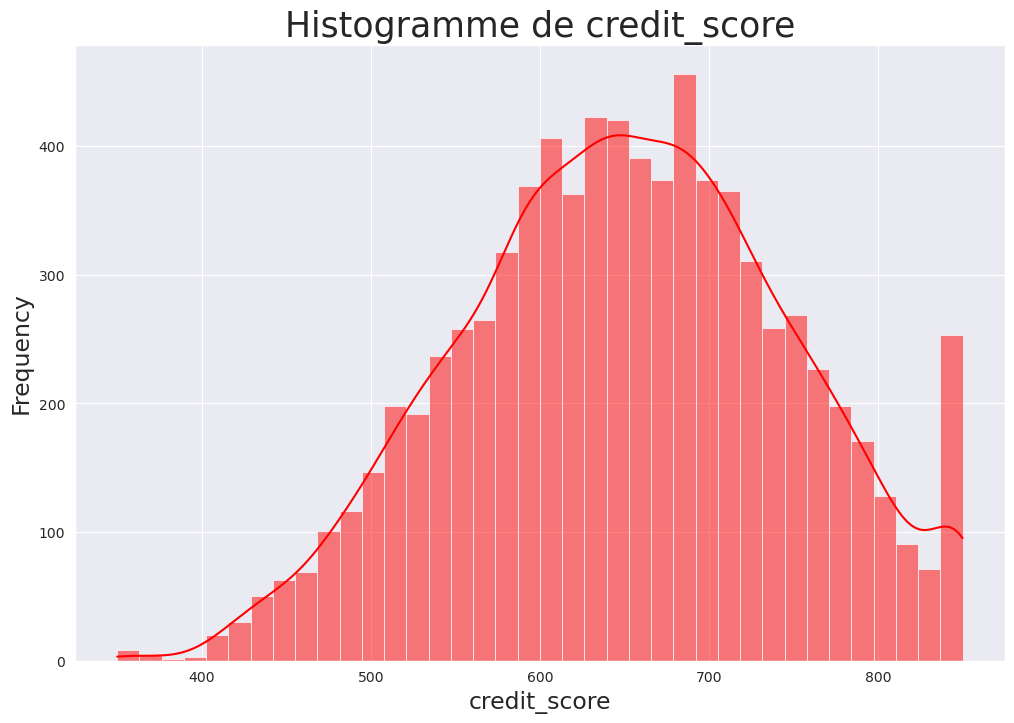

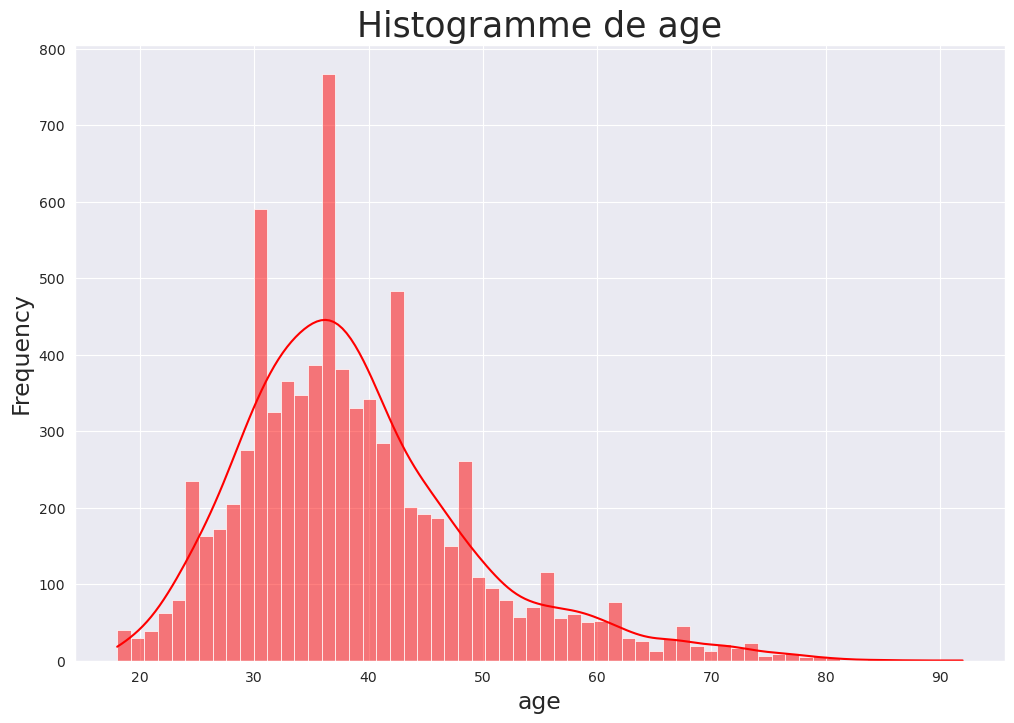

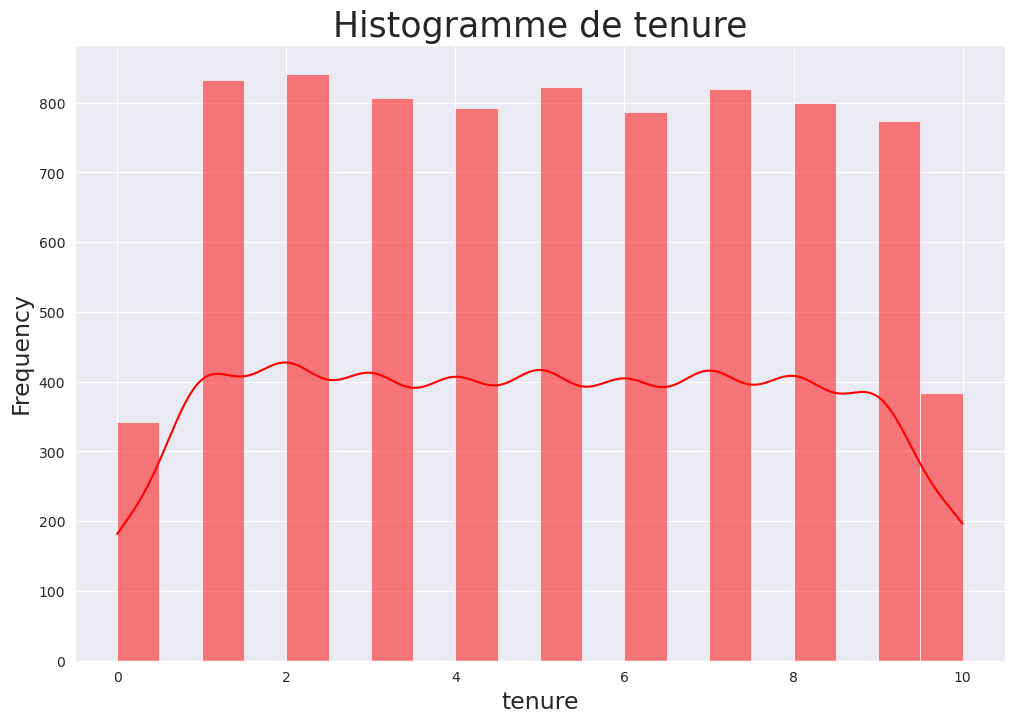

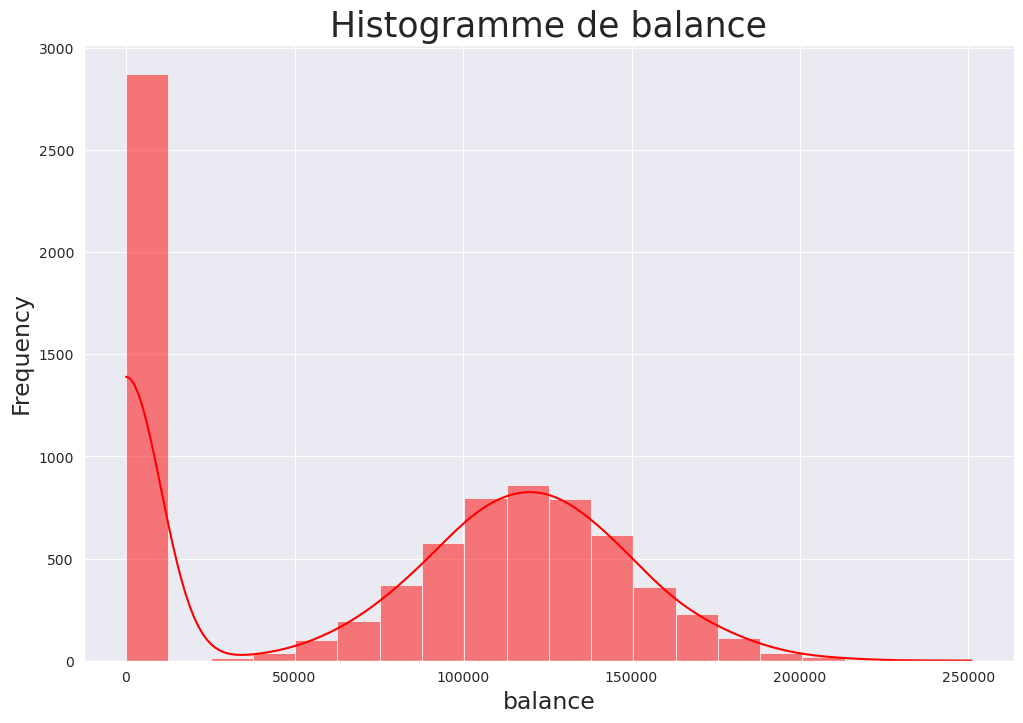

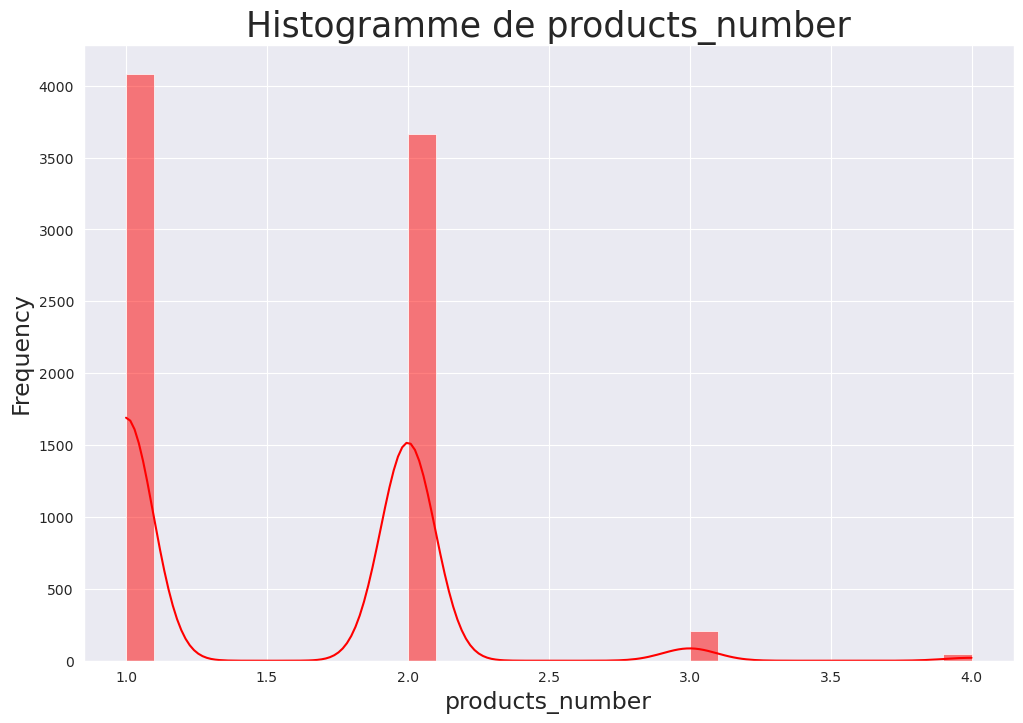

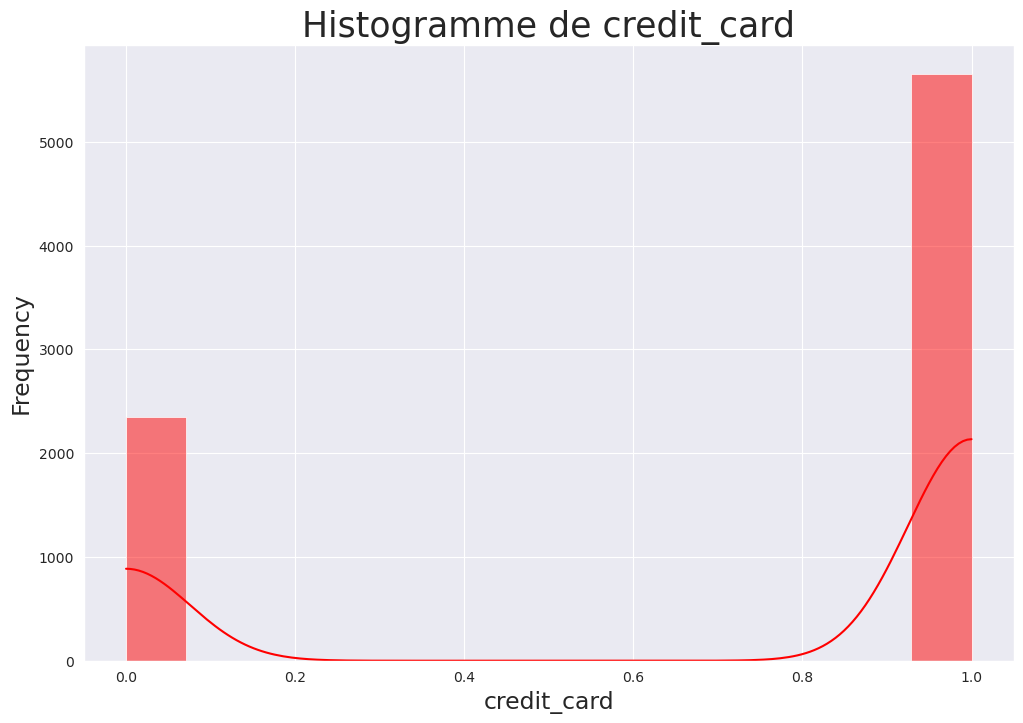

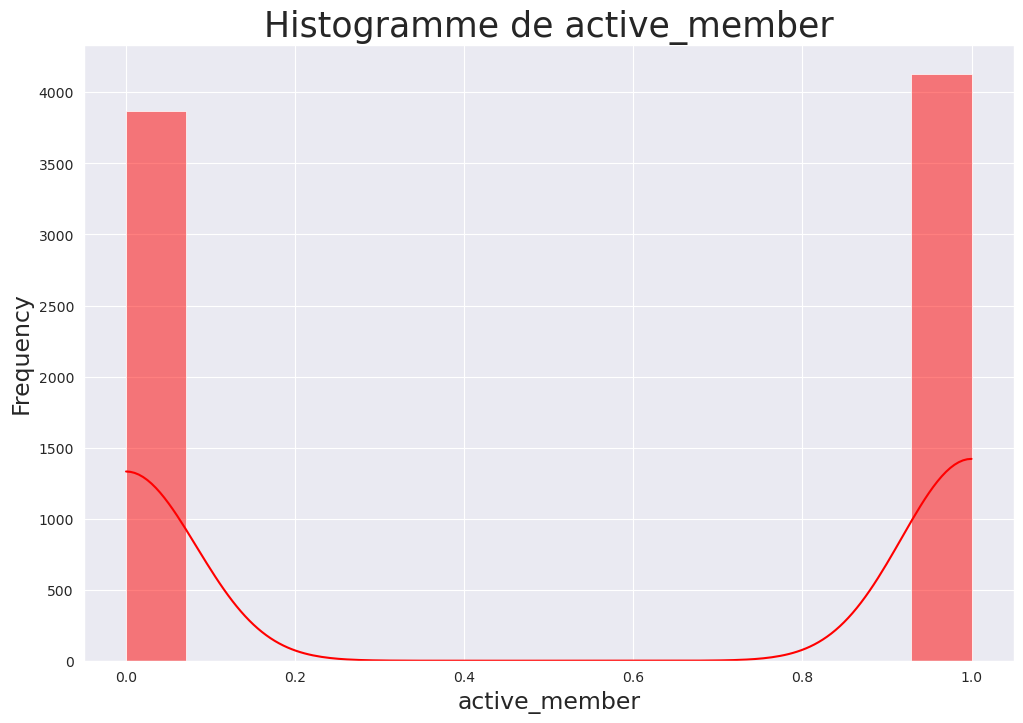

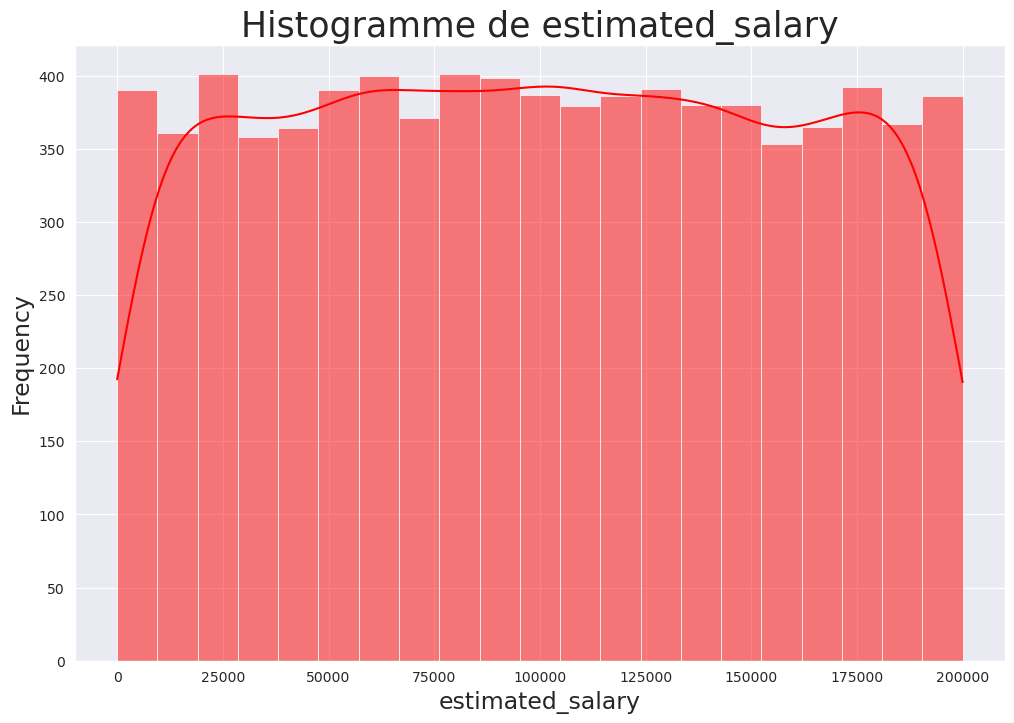

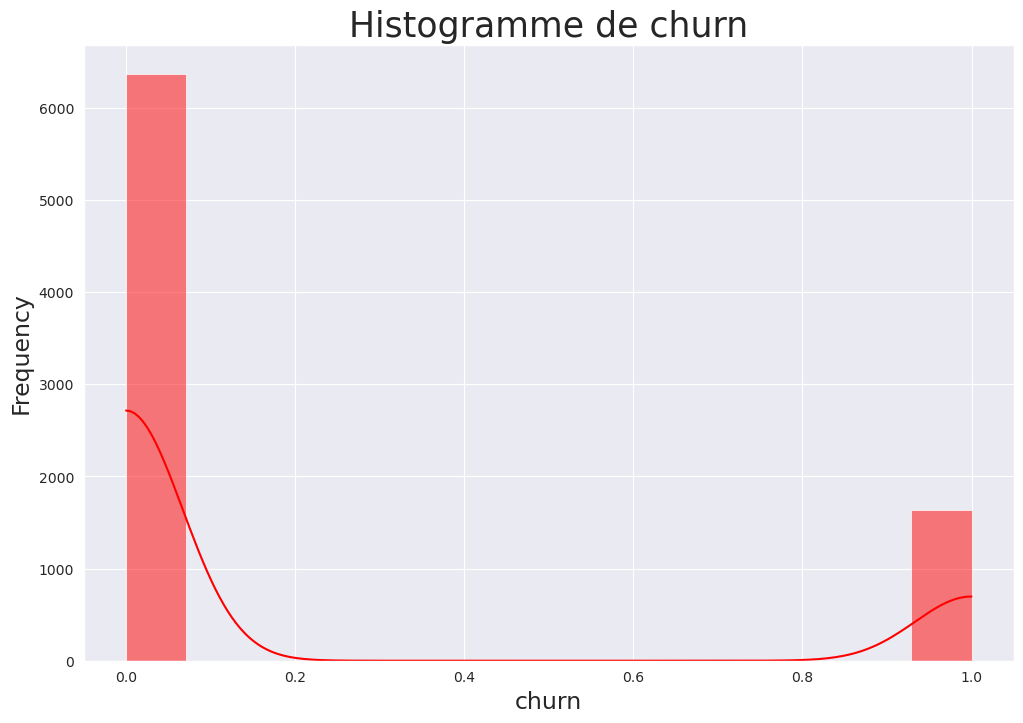

In [20]:
# Appeler methode num_hist_plot pour afficher les variables numériques avec histplot
for col in li_number:
    Univariate_viz.num_hist_plot(col)

CREDIT_SCORE

Test Shapiro
stat=0.994, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=107.364, p=0.000
Probablement pas  Gaussien 


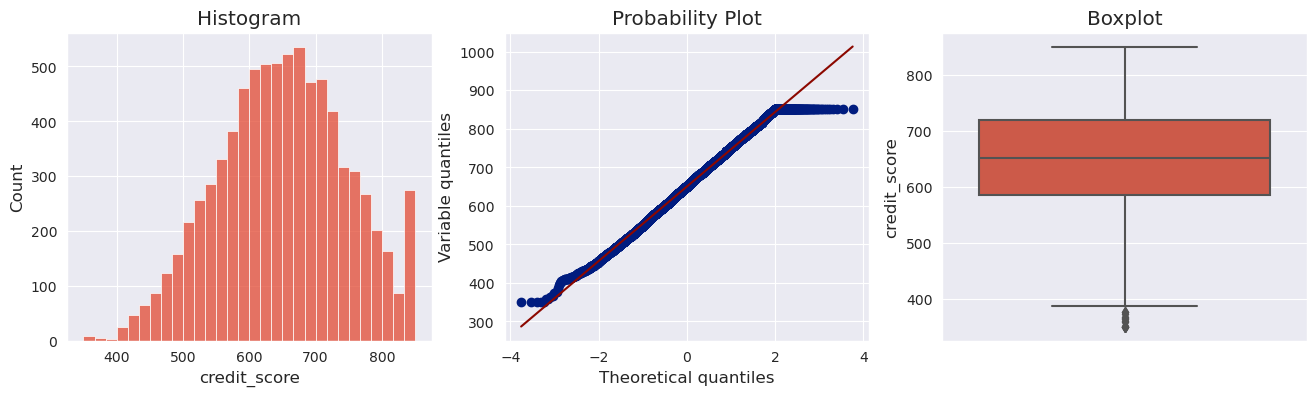


AGE

Test Shapiro
stat=0.944, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=1209.988, p=0.000
Probablement pas  Gaussien 


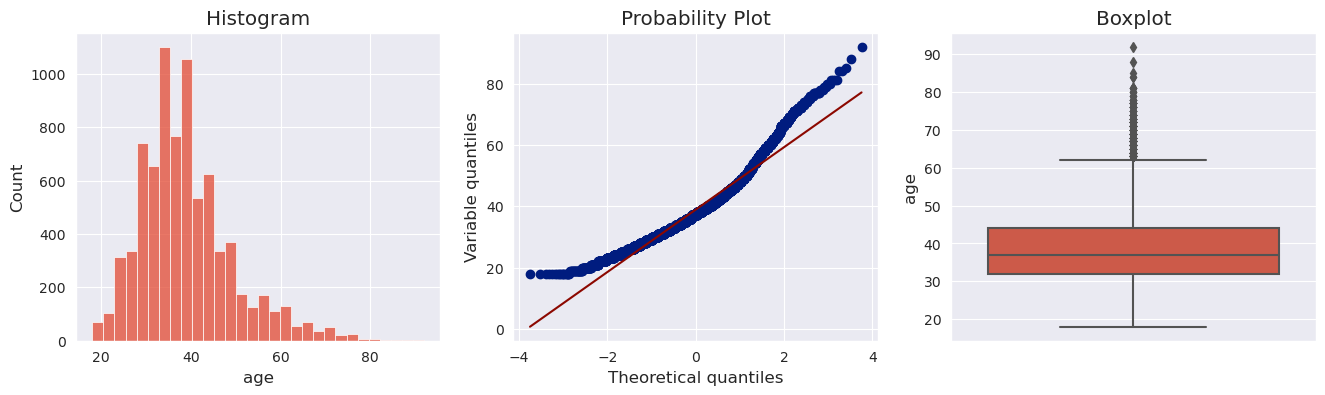


TENURE

Test Shapiro
stat=0.949, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=4805.887, p=0.000
Probablement pas  Gaussien 


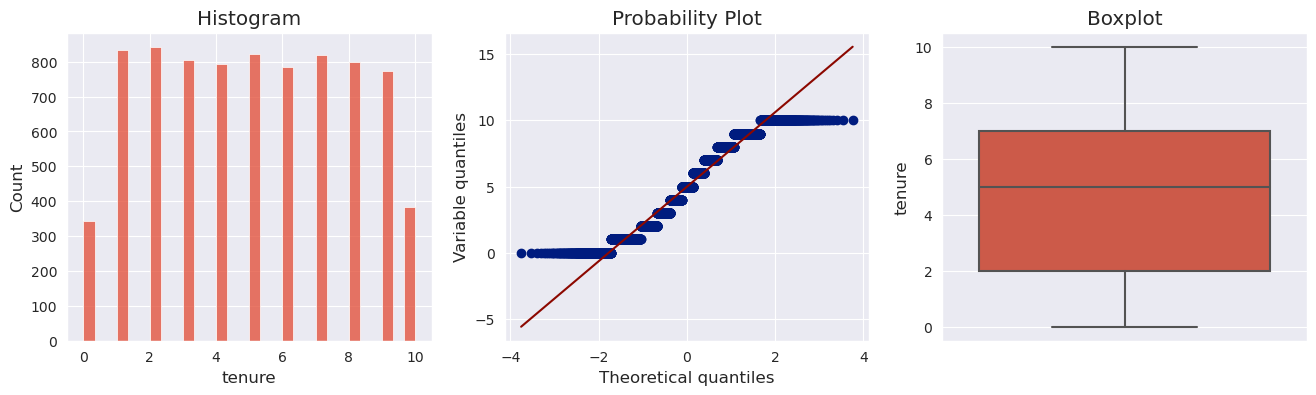


BALANCE

Test Shapiro
stat=0.847, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=51831.897, p=0.000
Probablement pas  Gaussien 


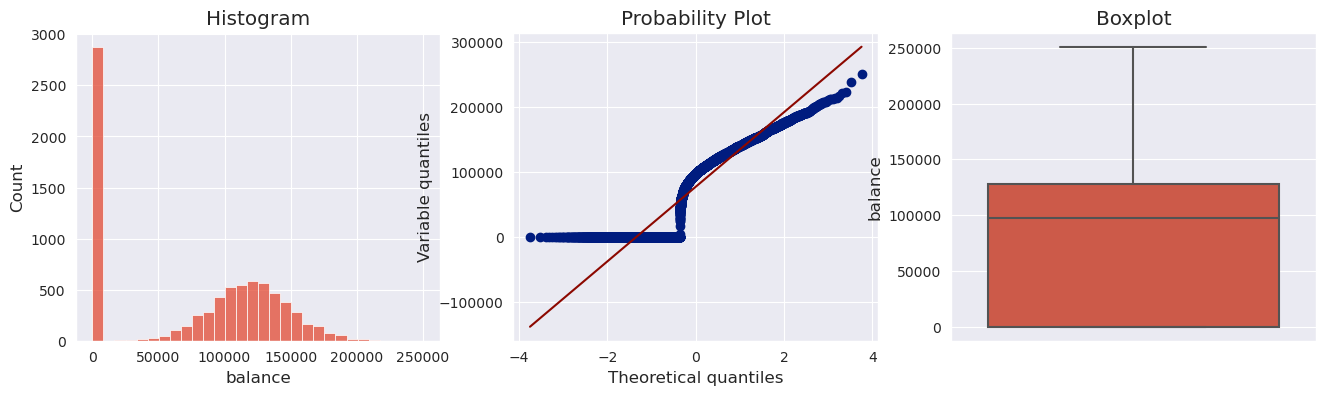


PRODUCTS_NUMBER

Test Shapiro
stat=0.705, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=685.796, p=0.000
Probablement pas  Gaussien 


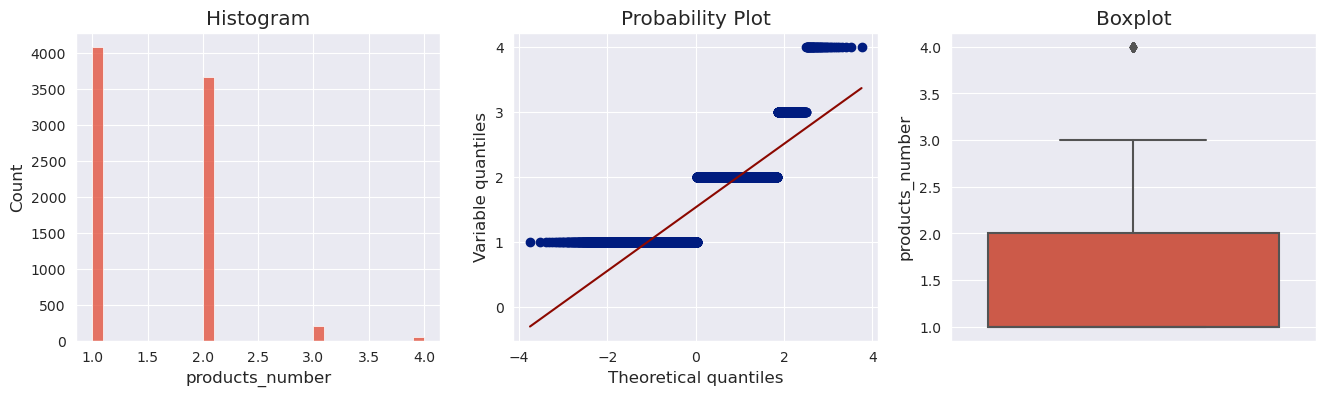


CREDIT_CARD

Test Shapiro
stat=0.571, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=6455.555, p=0.000
Probablement pas  Gaussien 


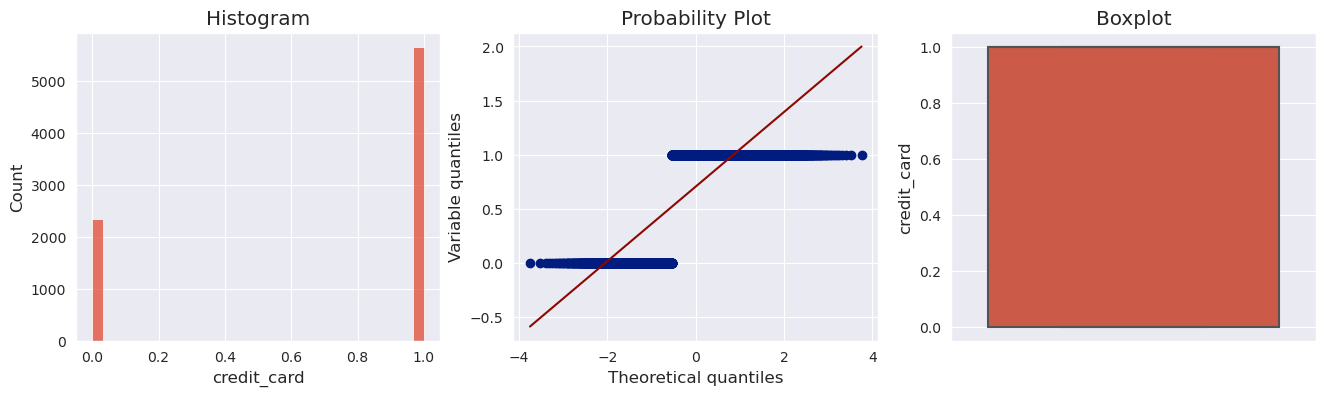


ACTIVE_MEMBER

Test Shapiro
stat=0.636, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=27660.266, p=0.000
Probablement pas  Gaussien 


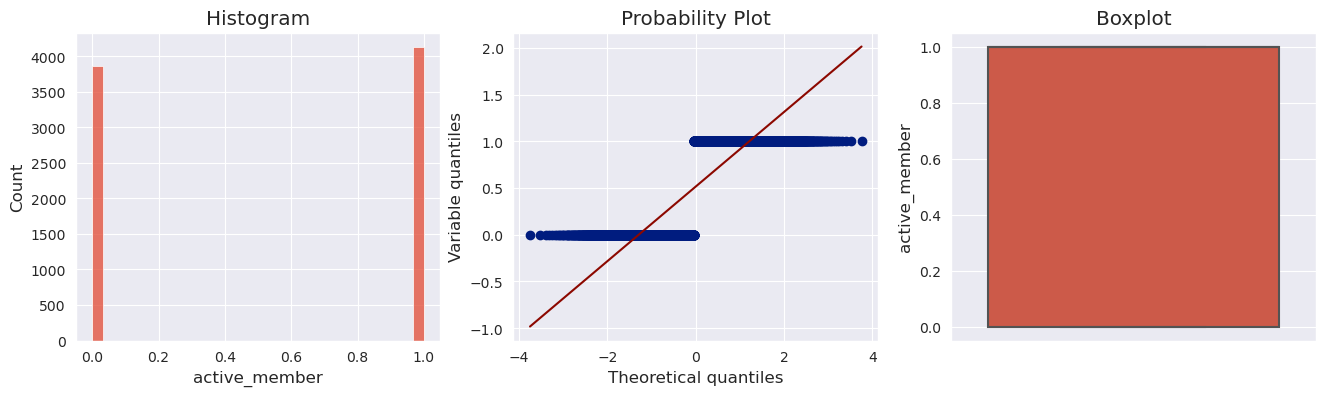


ESTIMATED_SALARY

Test Shapiro
stat=0.957, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=5687.532, p=0.000
Probablement pas  Gaussien 


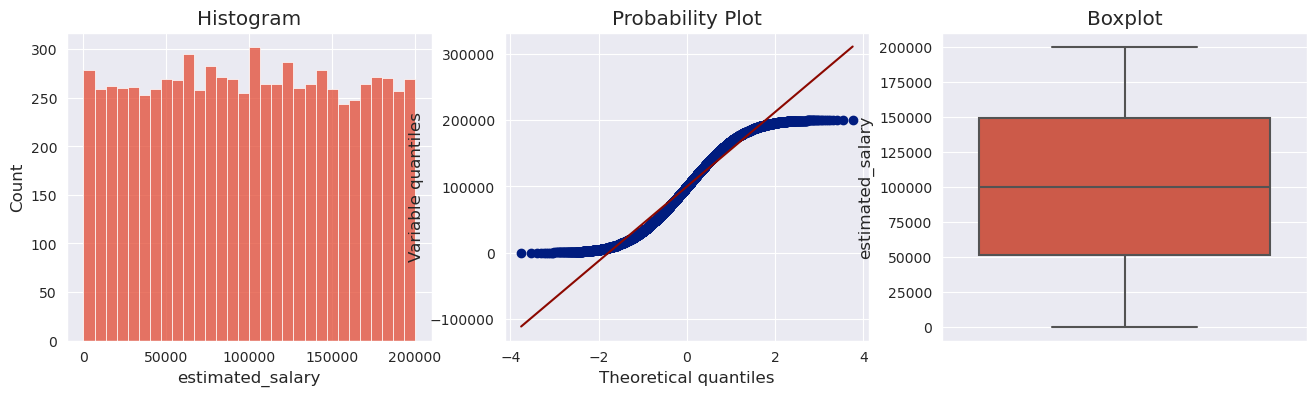


CHURN

Test Shapiro
stat=0.495, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=1629.059, p=0.000
Probablement pas  Gaussien 


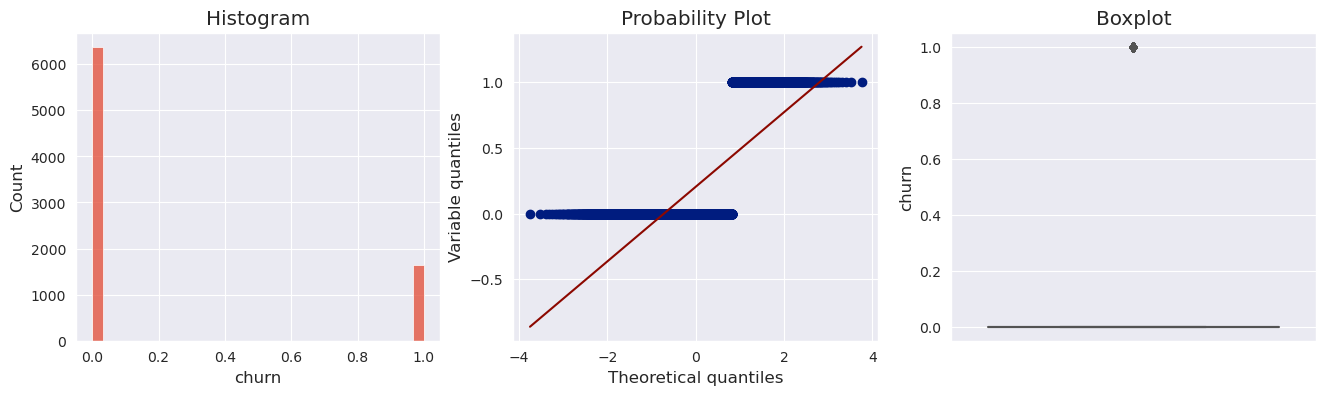

In [21]:
#instancie un objet de la DistributionDataExplorer et l'assigne à la variable explorer_outliers_norm.
explorer_outliers_norm = DistributionDataExplorer(trainset)

#itération pour afficher diagnostic des distributions pour chaque indicateur
#voir les outliers et normalités 
for num in li_number:
  print(colored(num.upper(), 'red'))
  print('')
  explorer_outliers_norm.Diagnostic_plot(num)
  print('')

## Analyse bivariée trainset
- [X] Corrélation positive avec la target

   age (0.28)
   balance (0.12)
   
- [X] Corrélation Négative avec la target

   active_member(-0.16)

- [ ] Vérification test Statistiques mean ou non paramètrique
  
  Vérification des Hypothèses des tests(param ou non param)
  Testes si les moyennes sont significativement différentes ou non

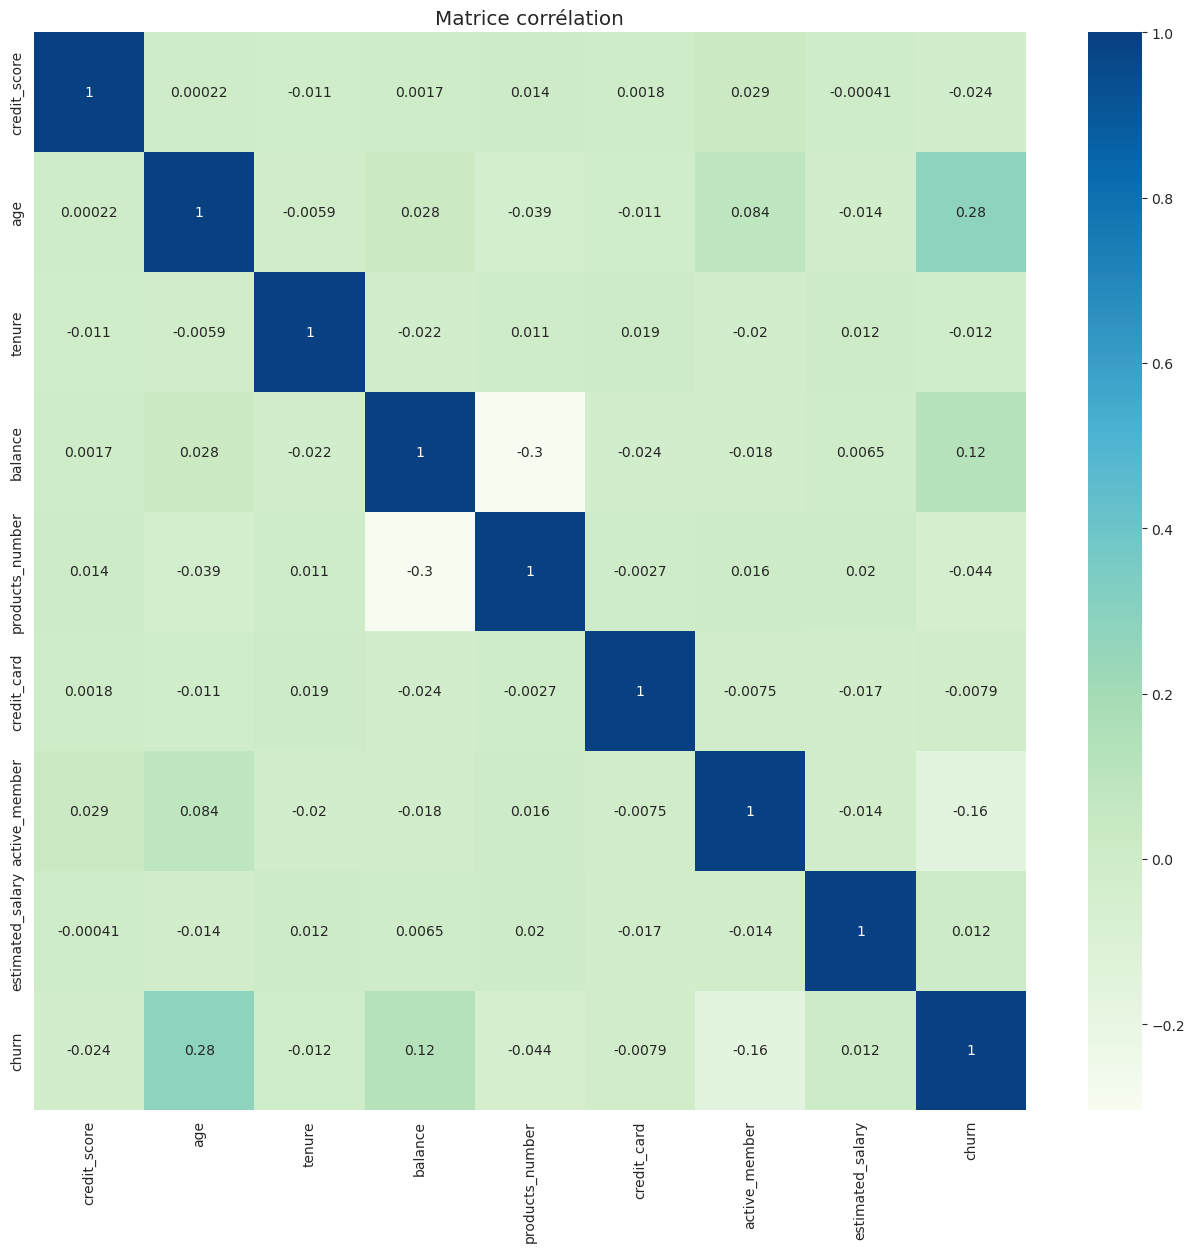

In [22]:
# #instancie un objet de la classe BivariateDataExplorer 
exploration_Bivariate = BivariateDataExplorer(trainset)

# Appeler methode pour afficher heatmap corrélation
exploration_Bivariate.numVSnum_heatmap_corr()


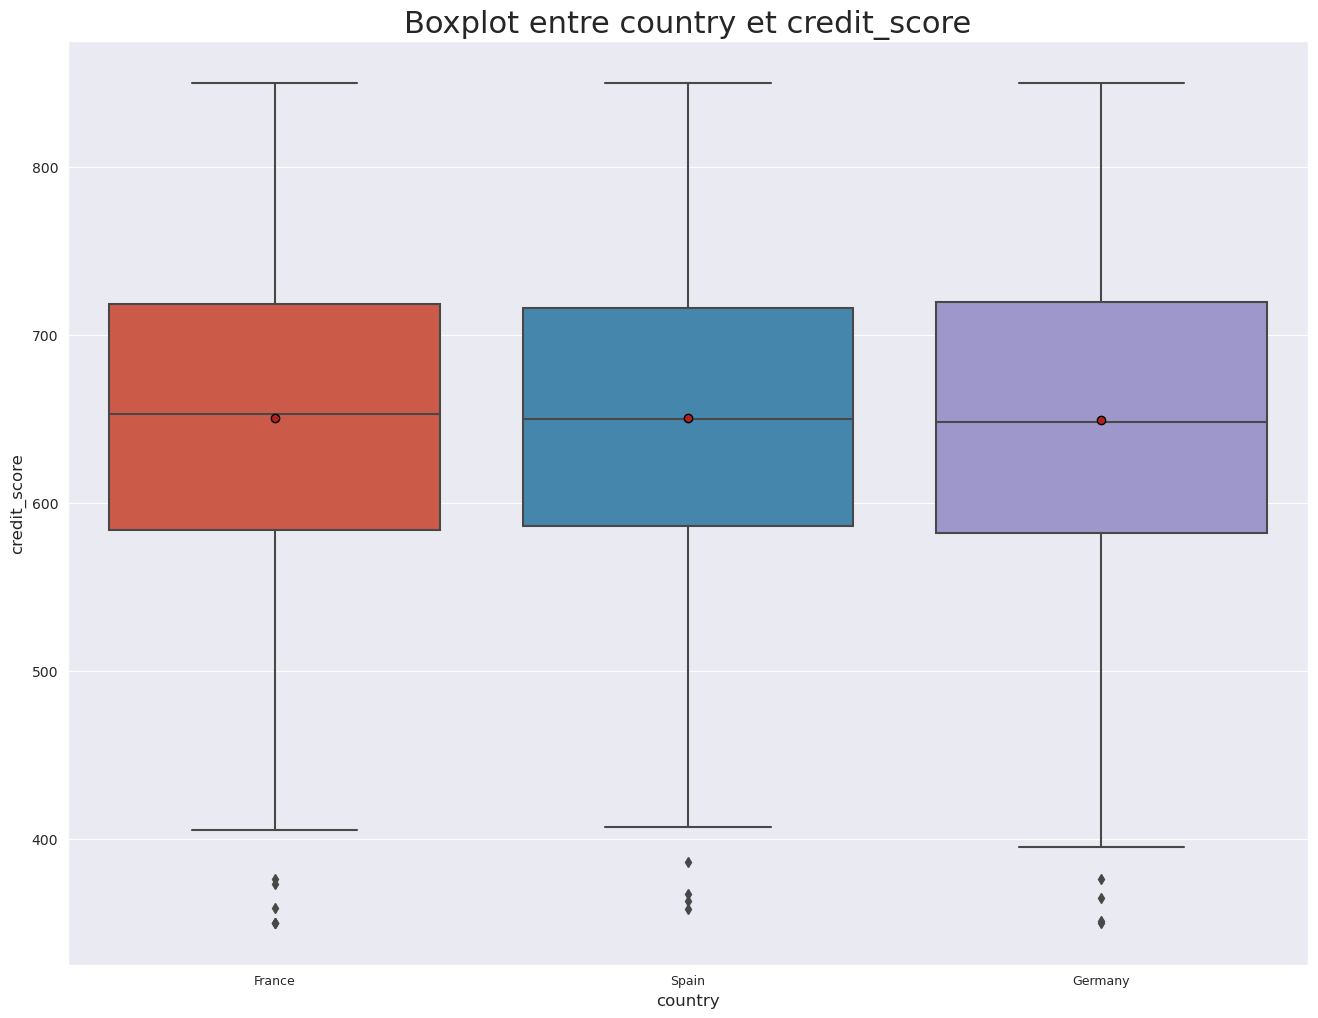

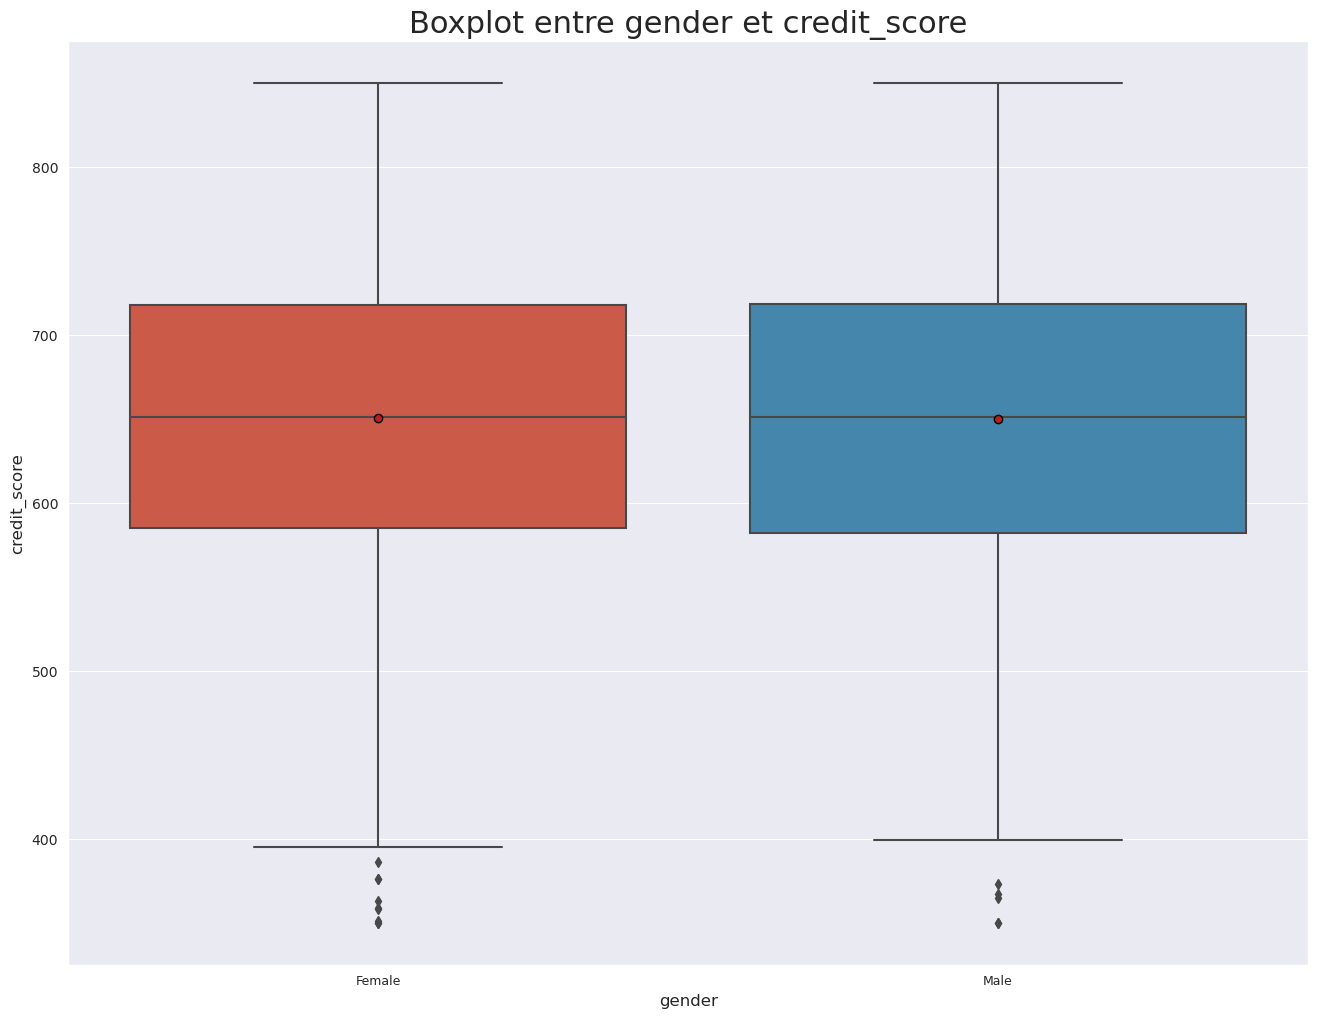

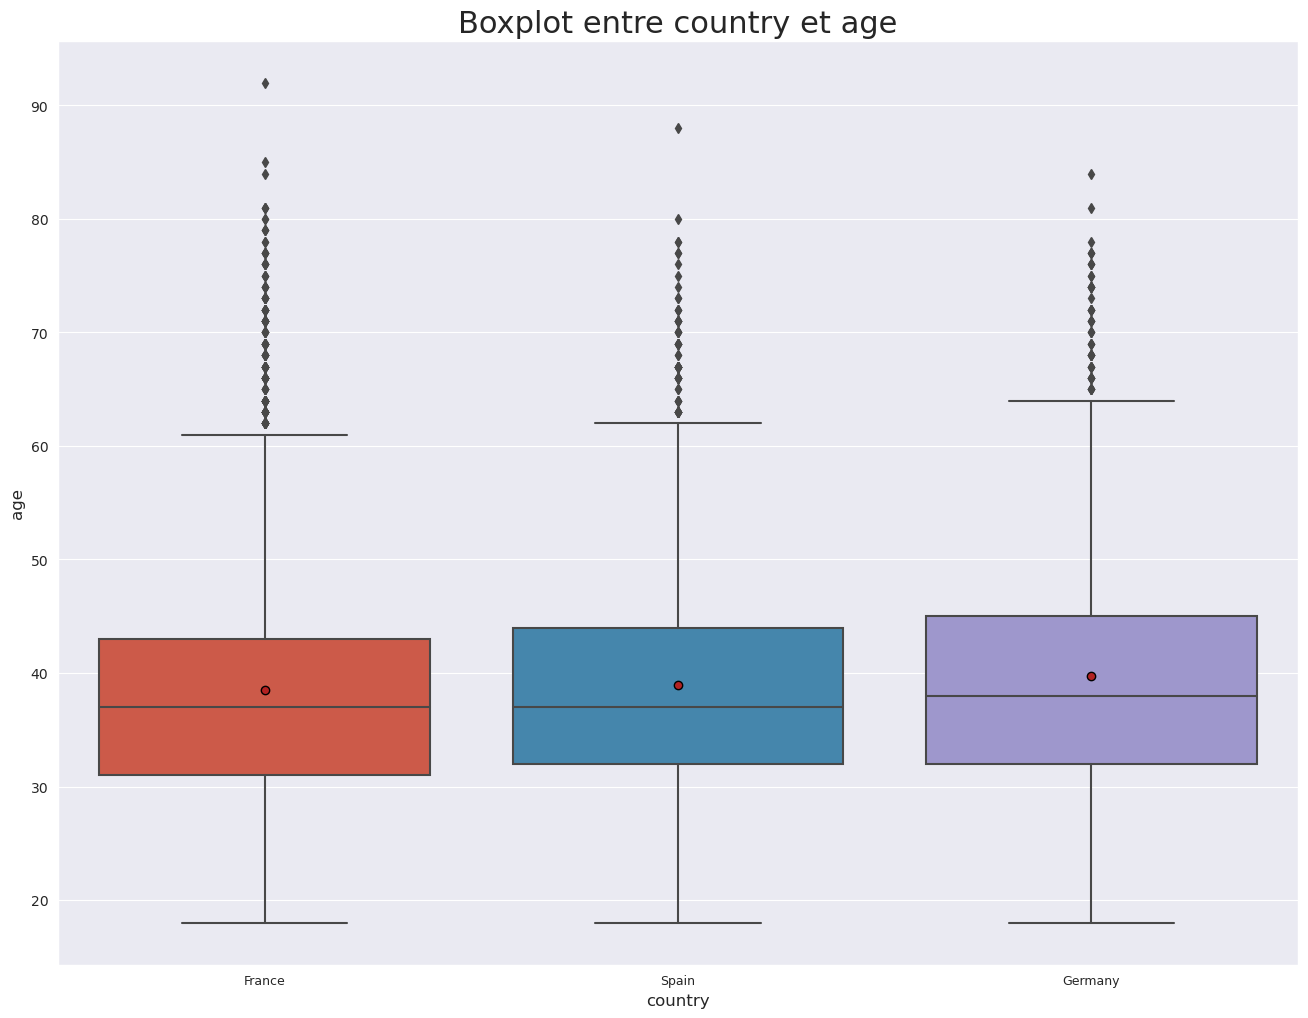

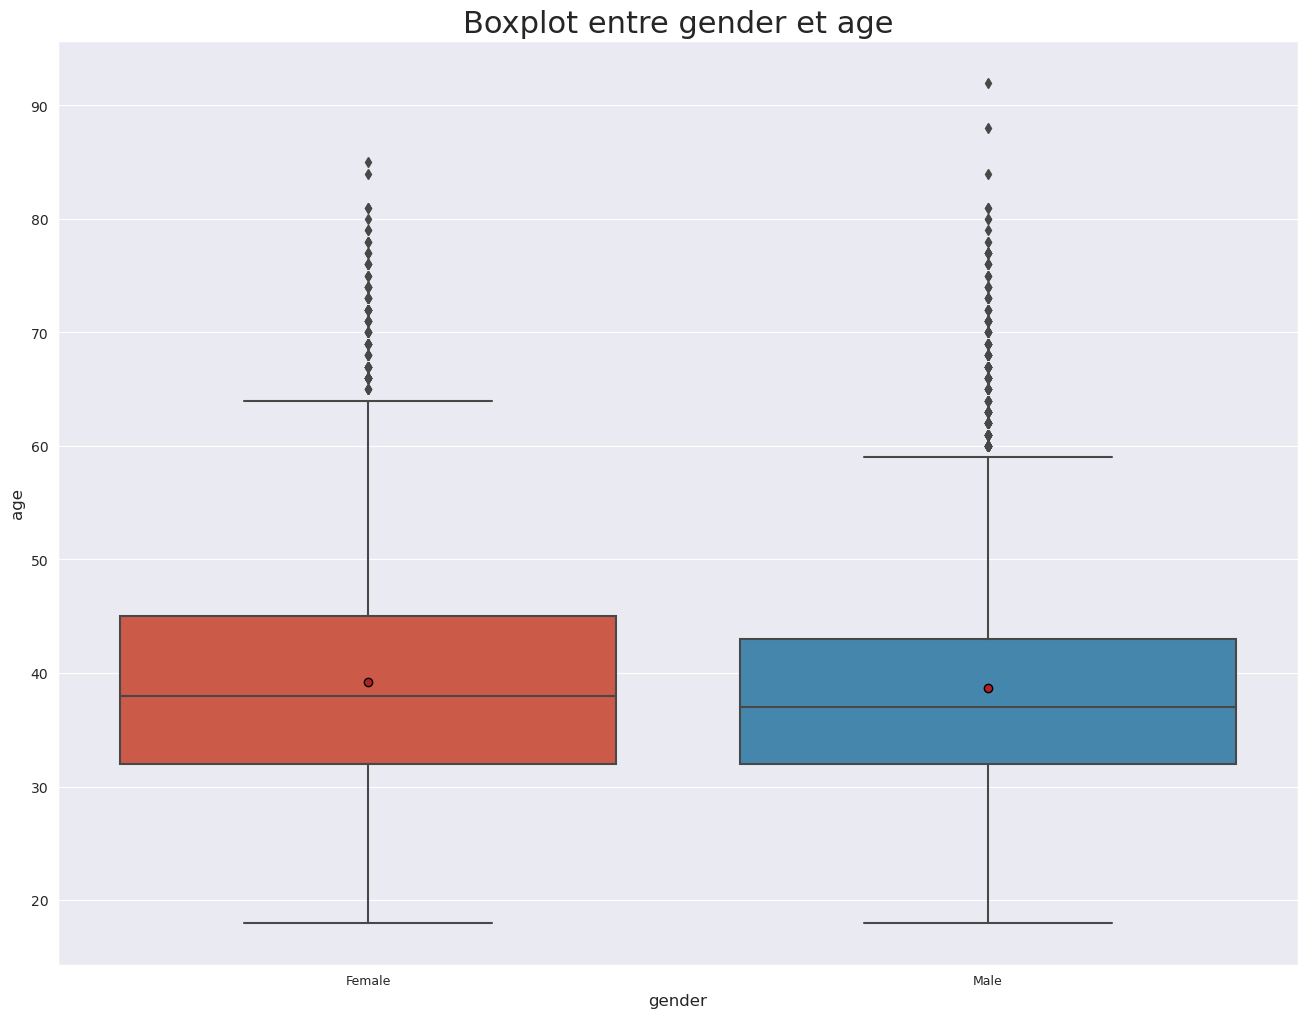

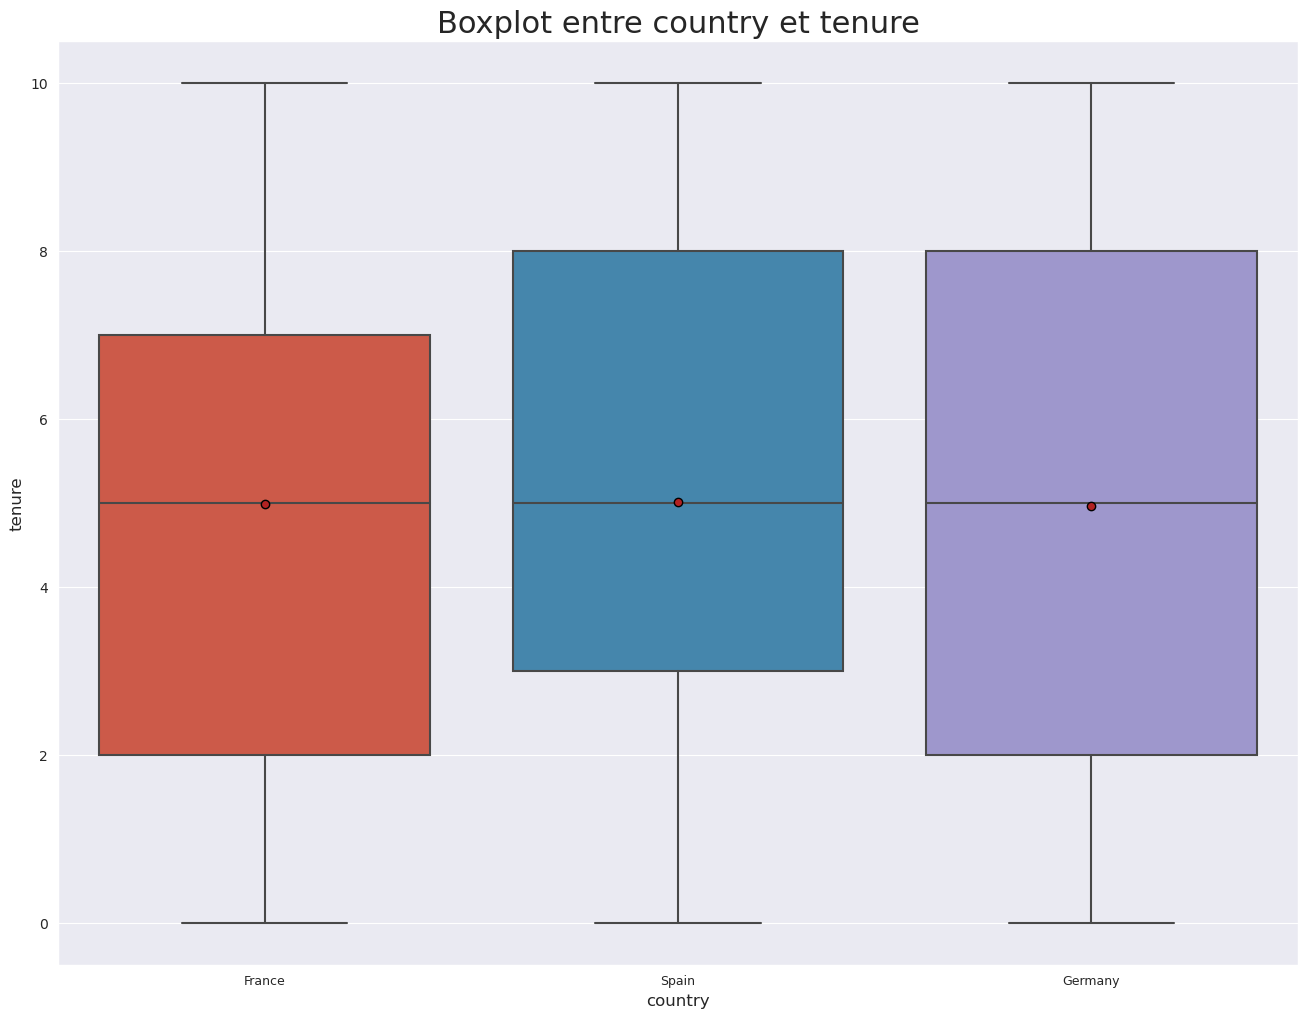

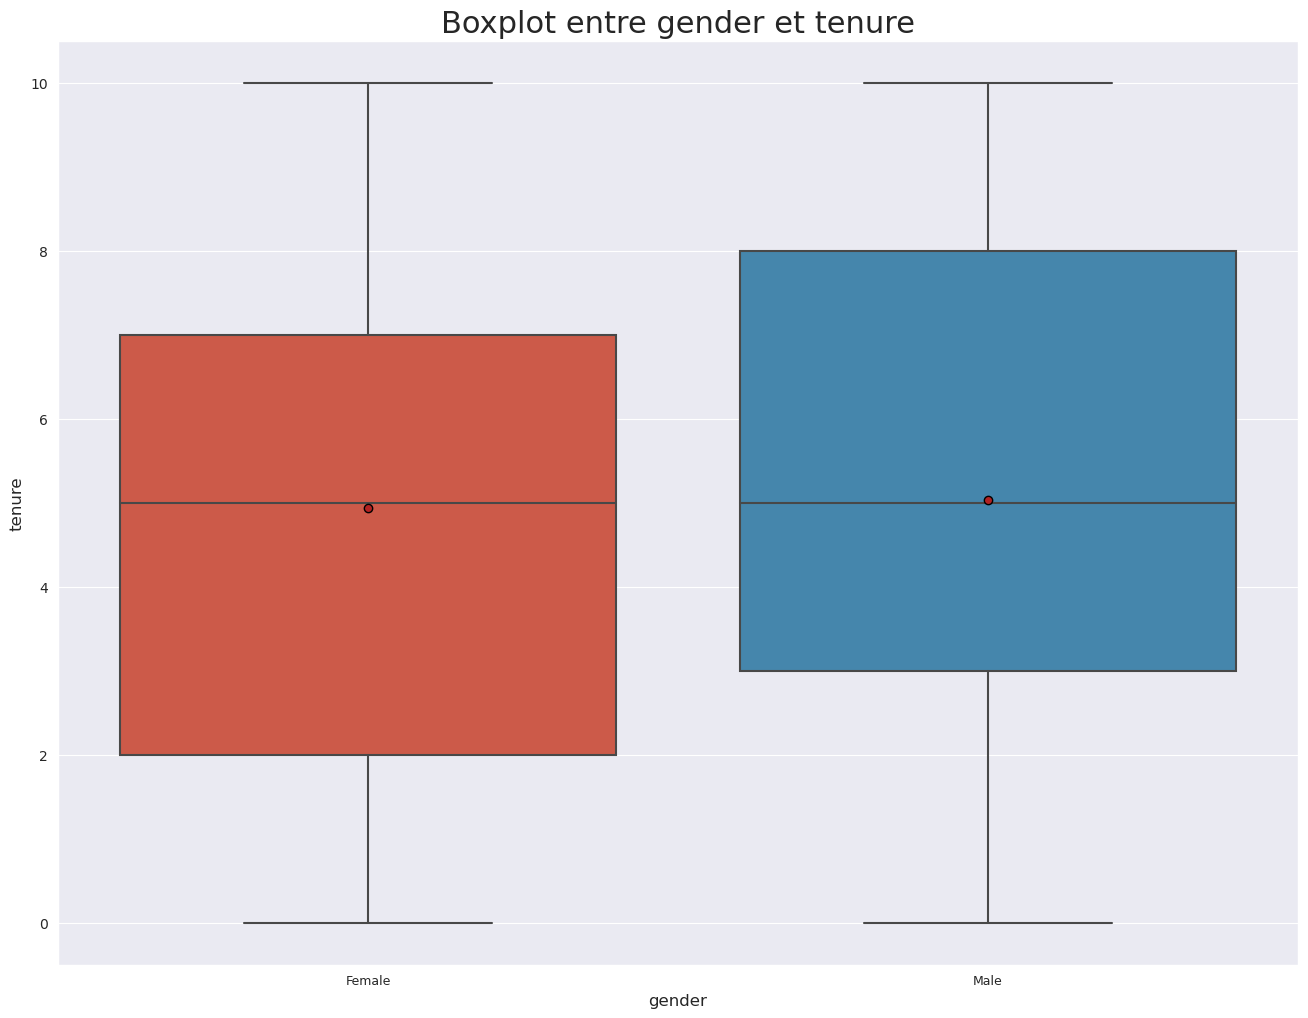

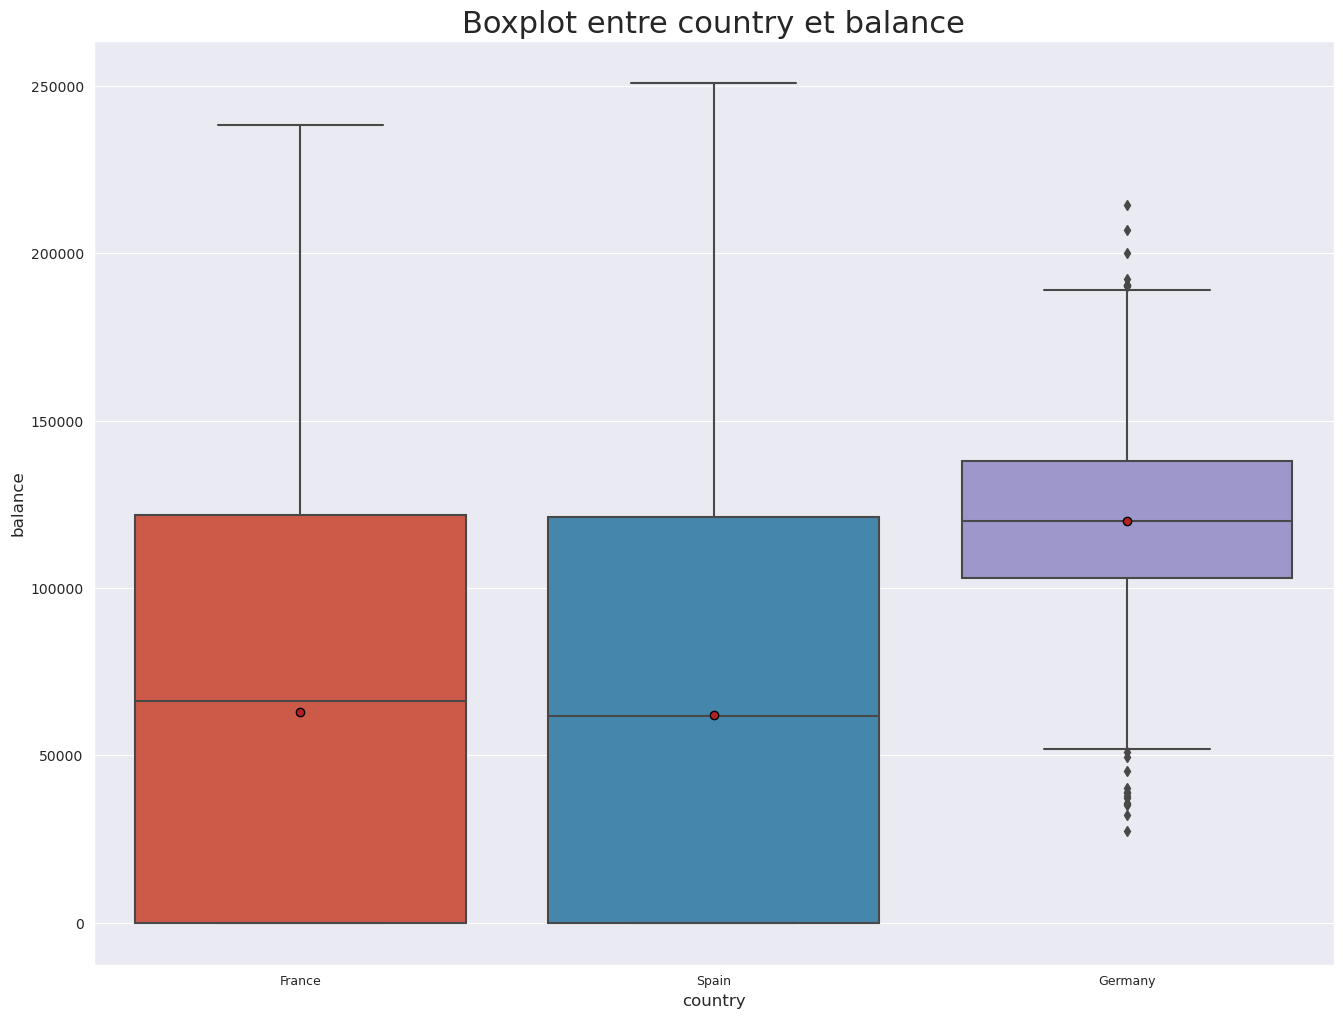

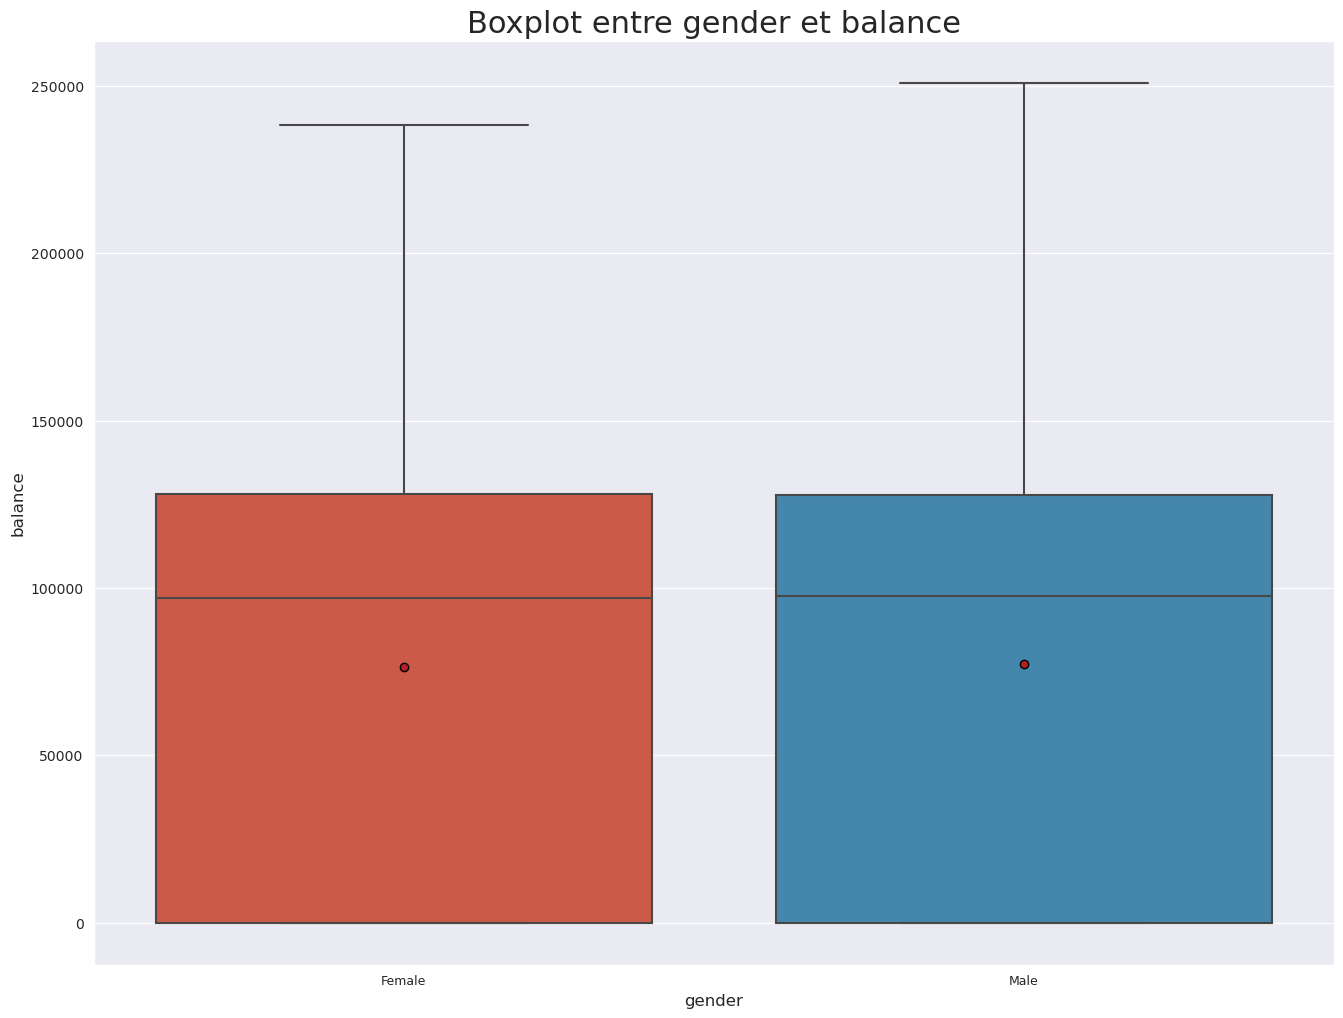

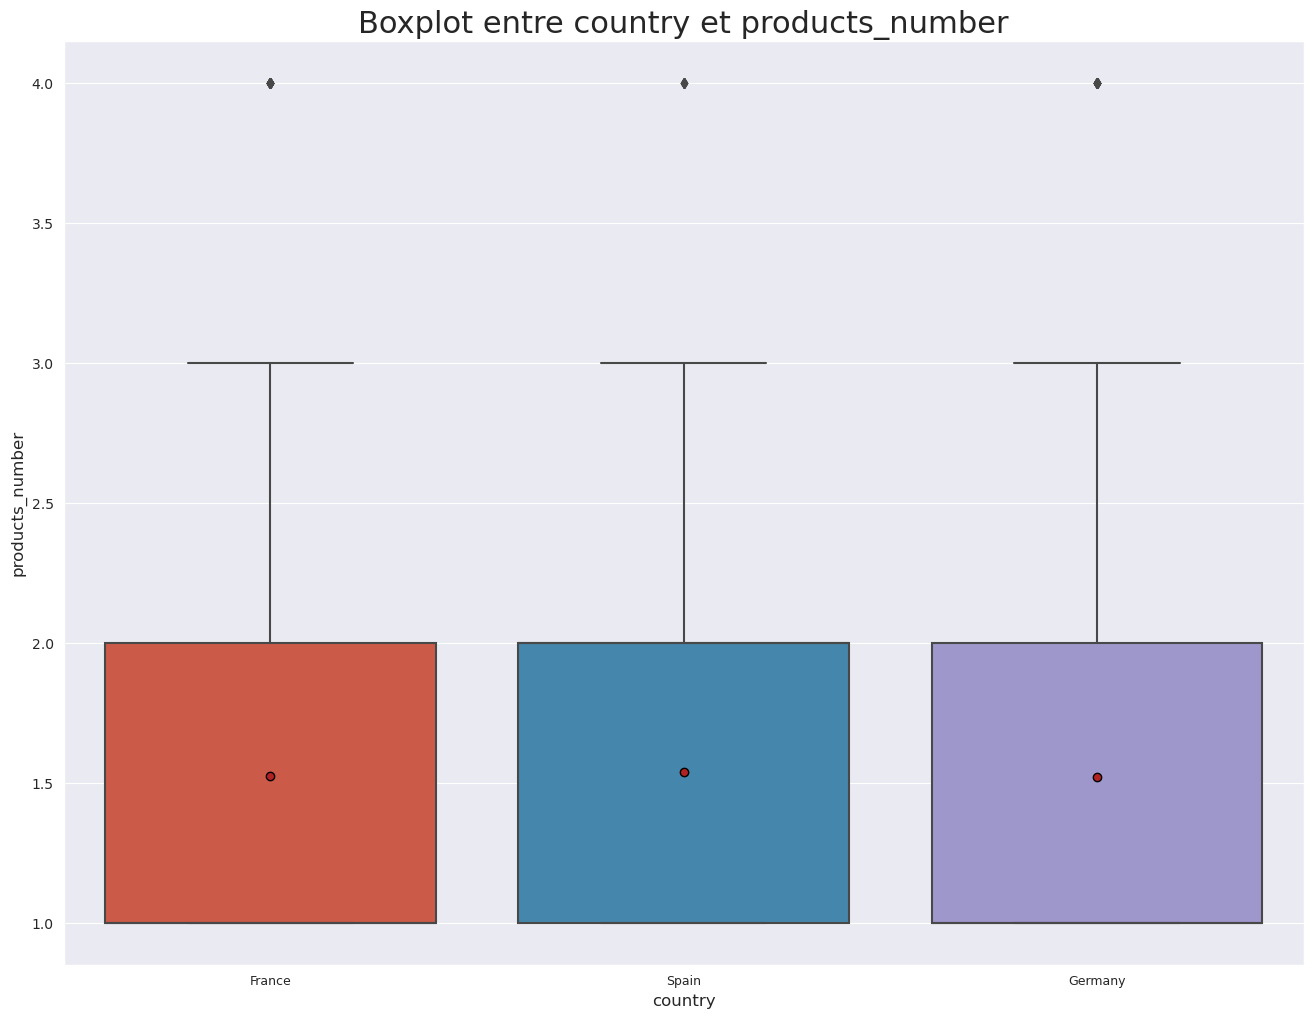

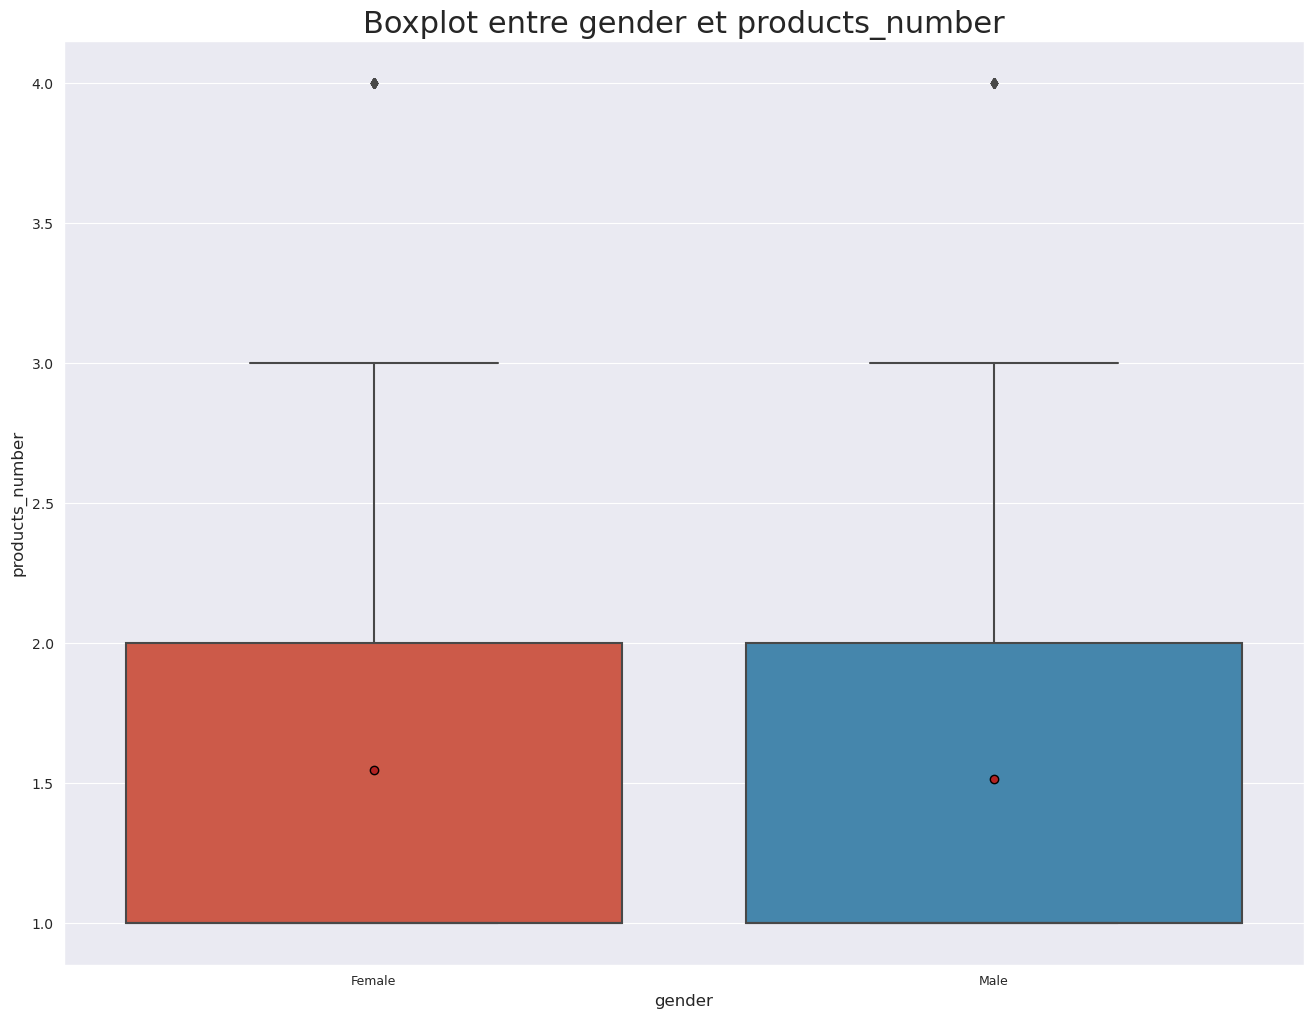

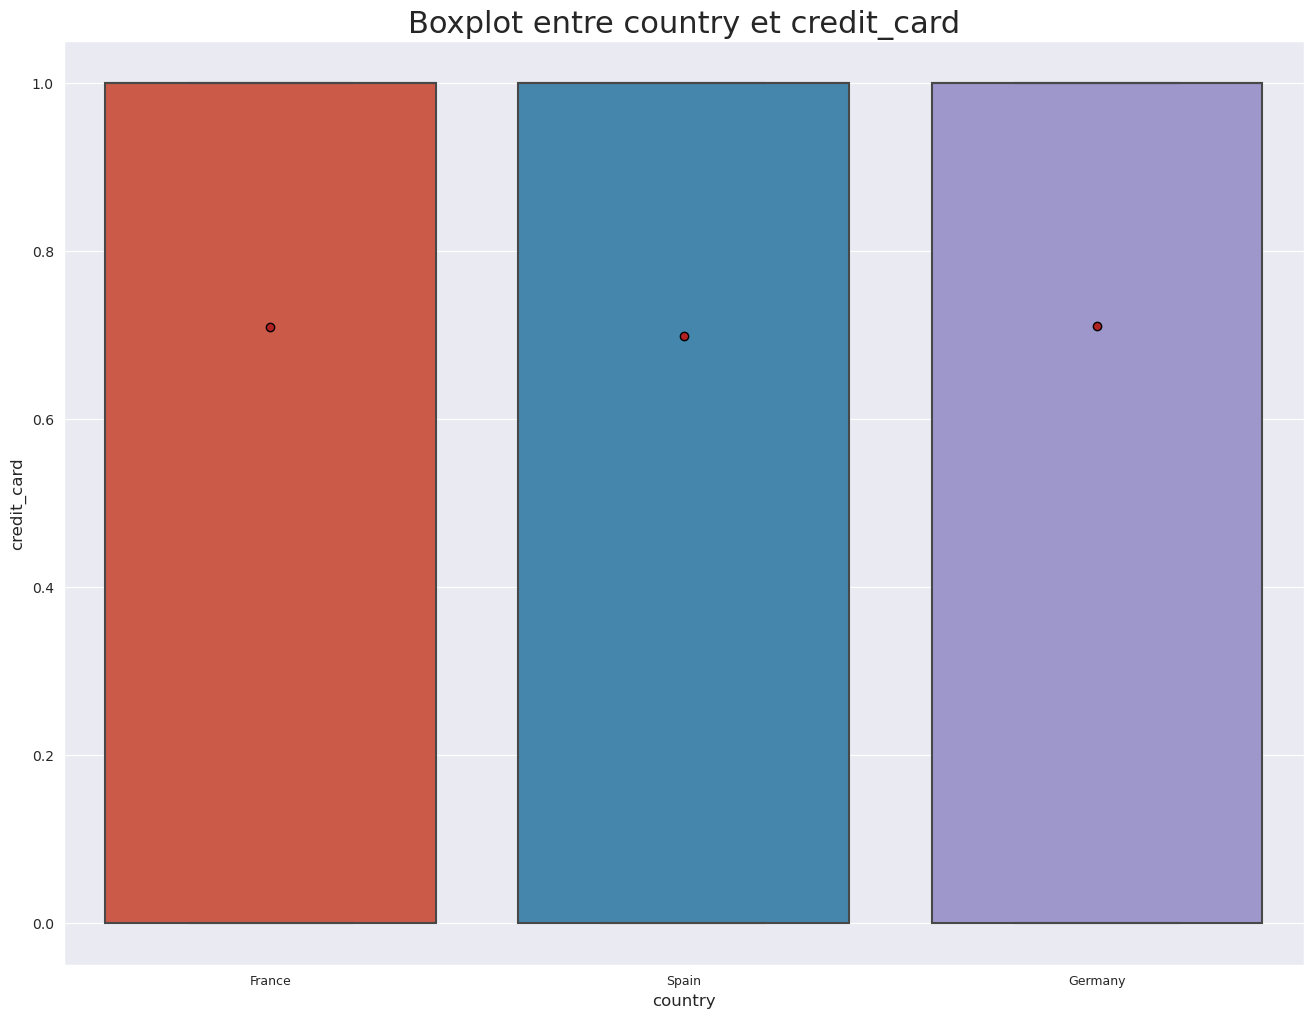

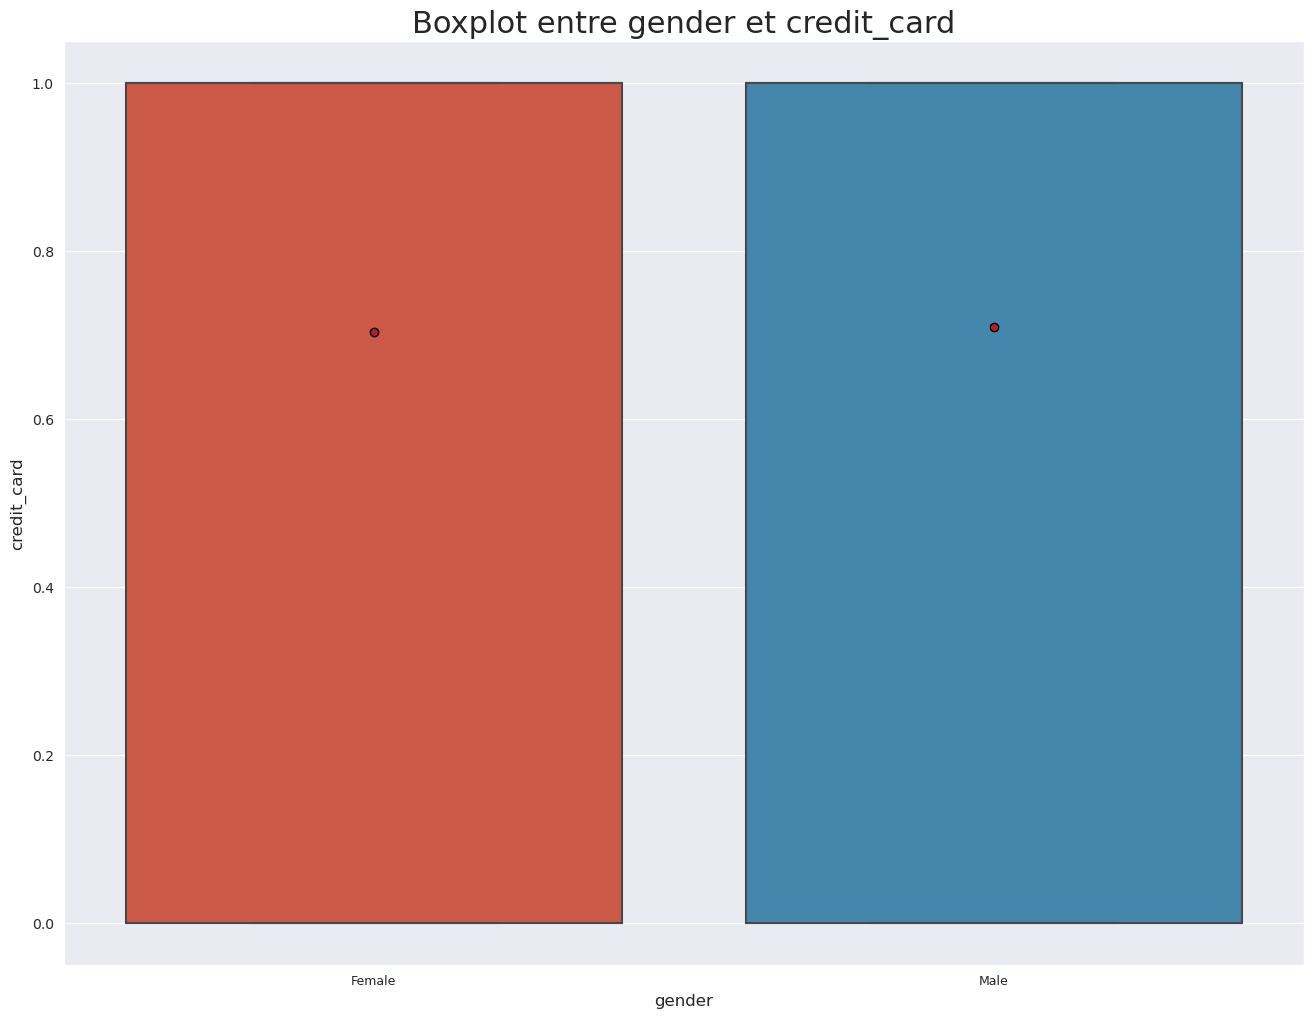

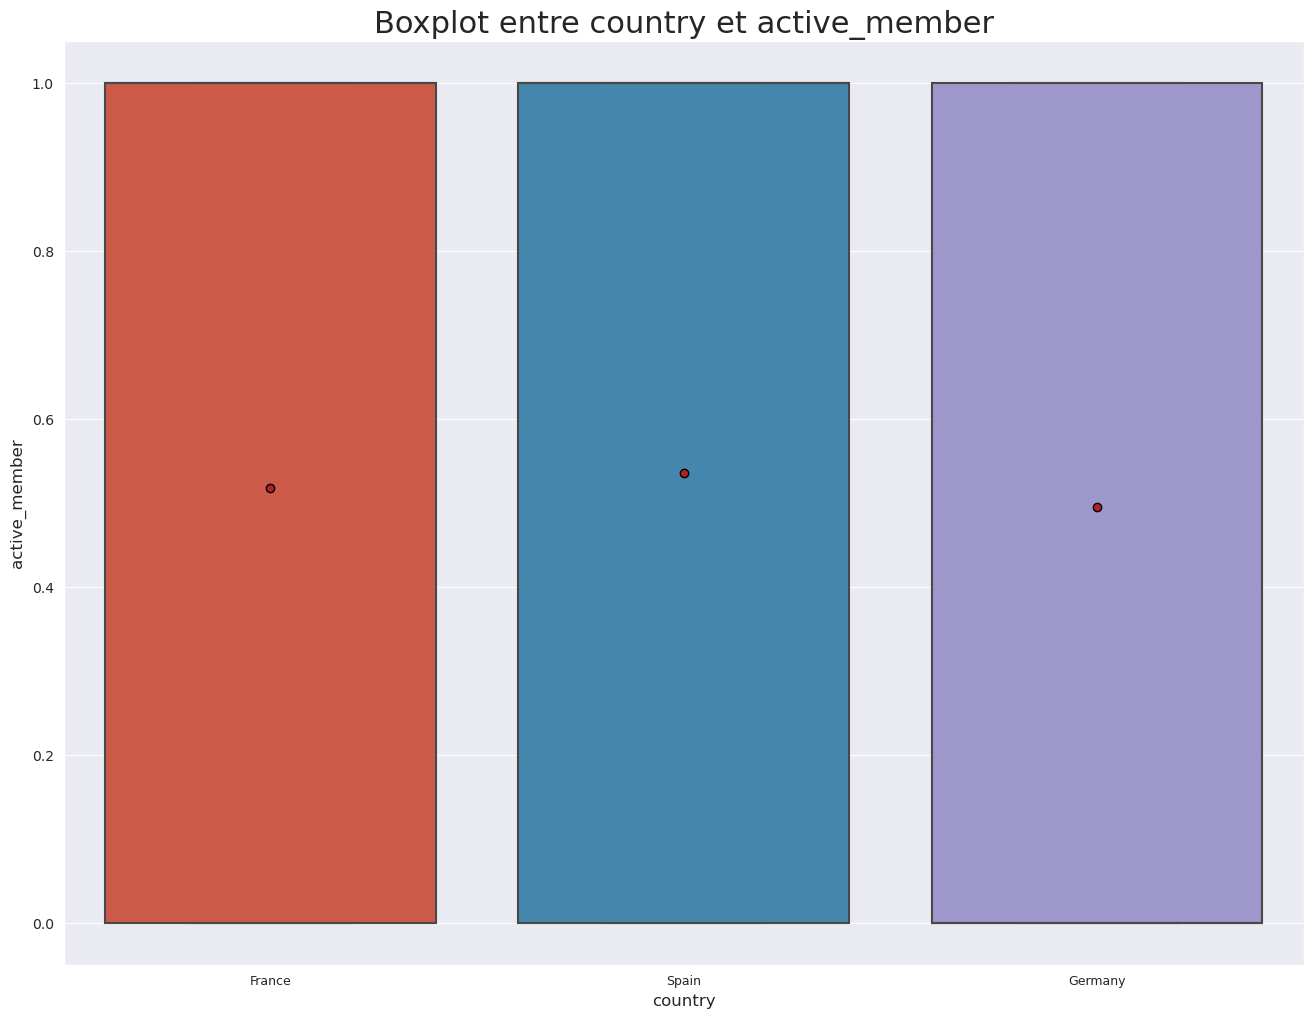

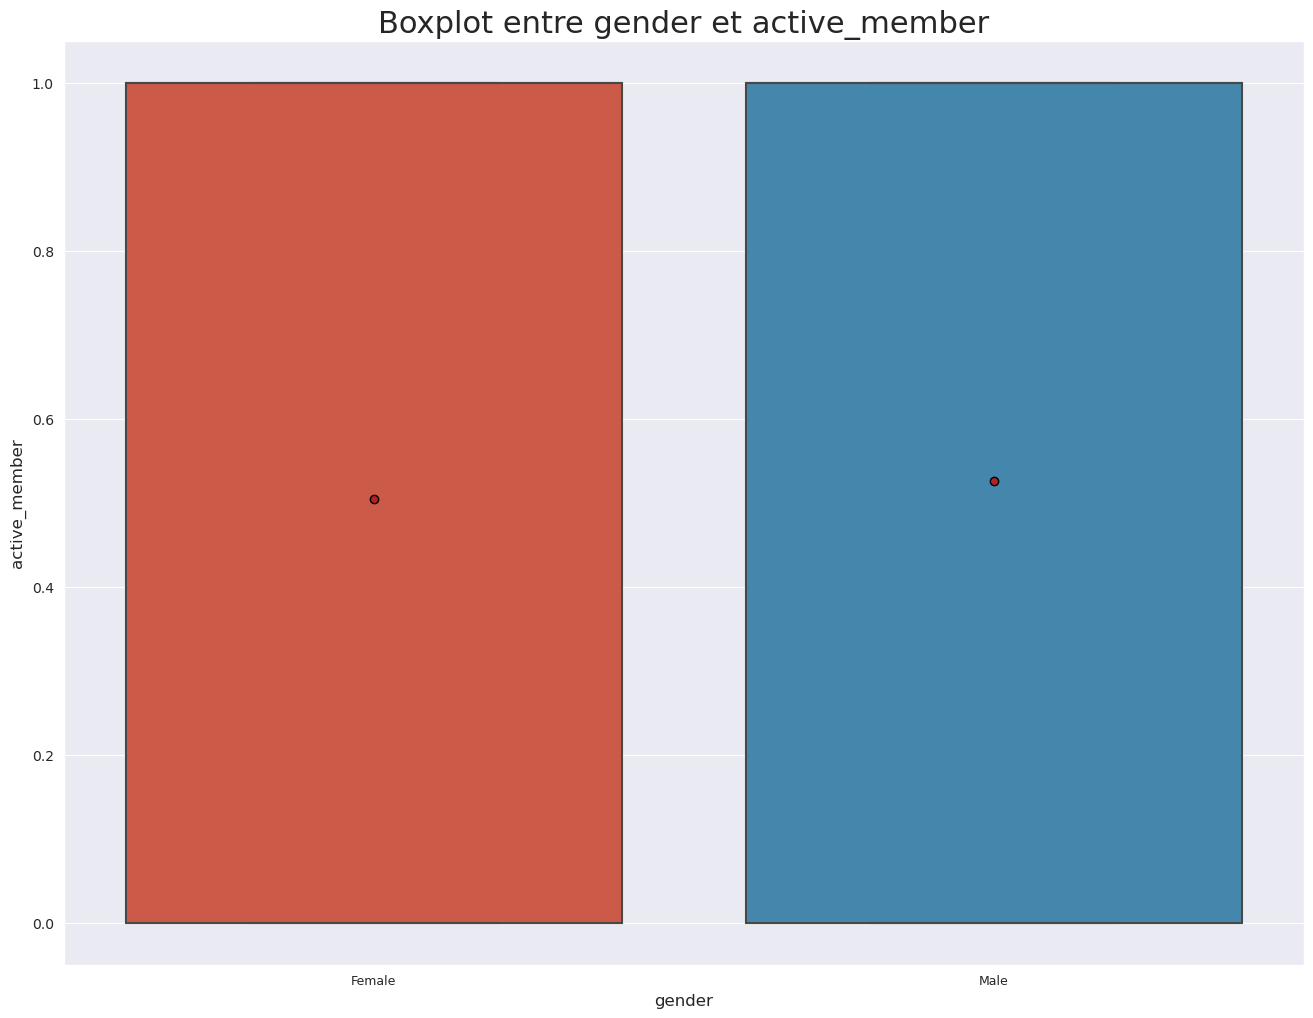

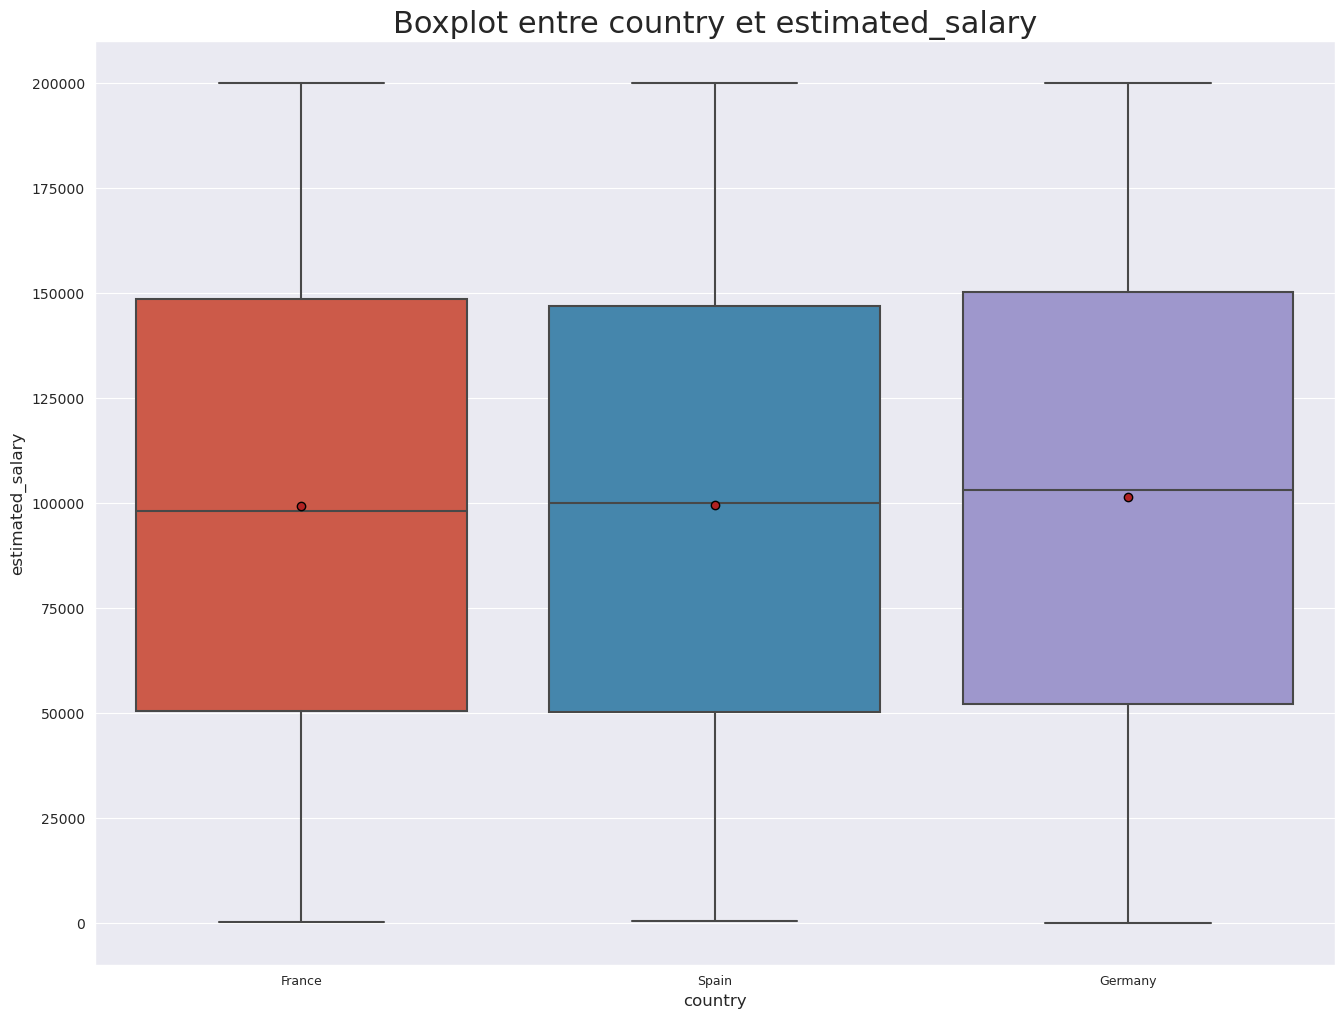

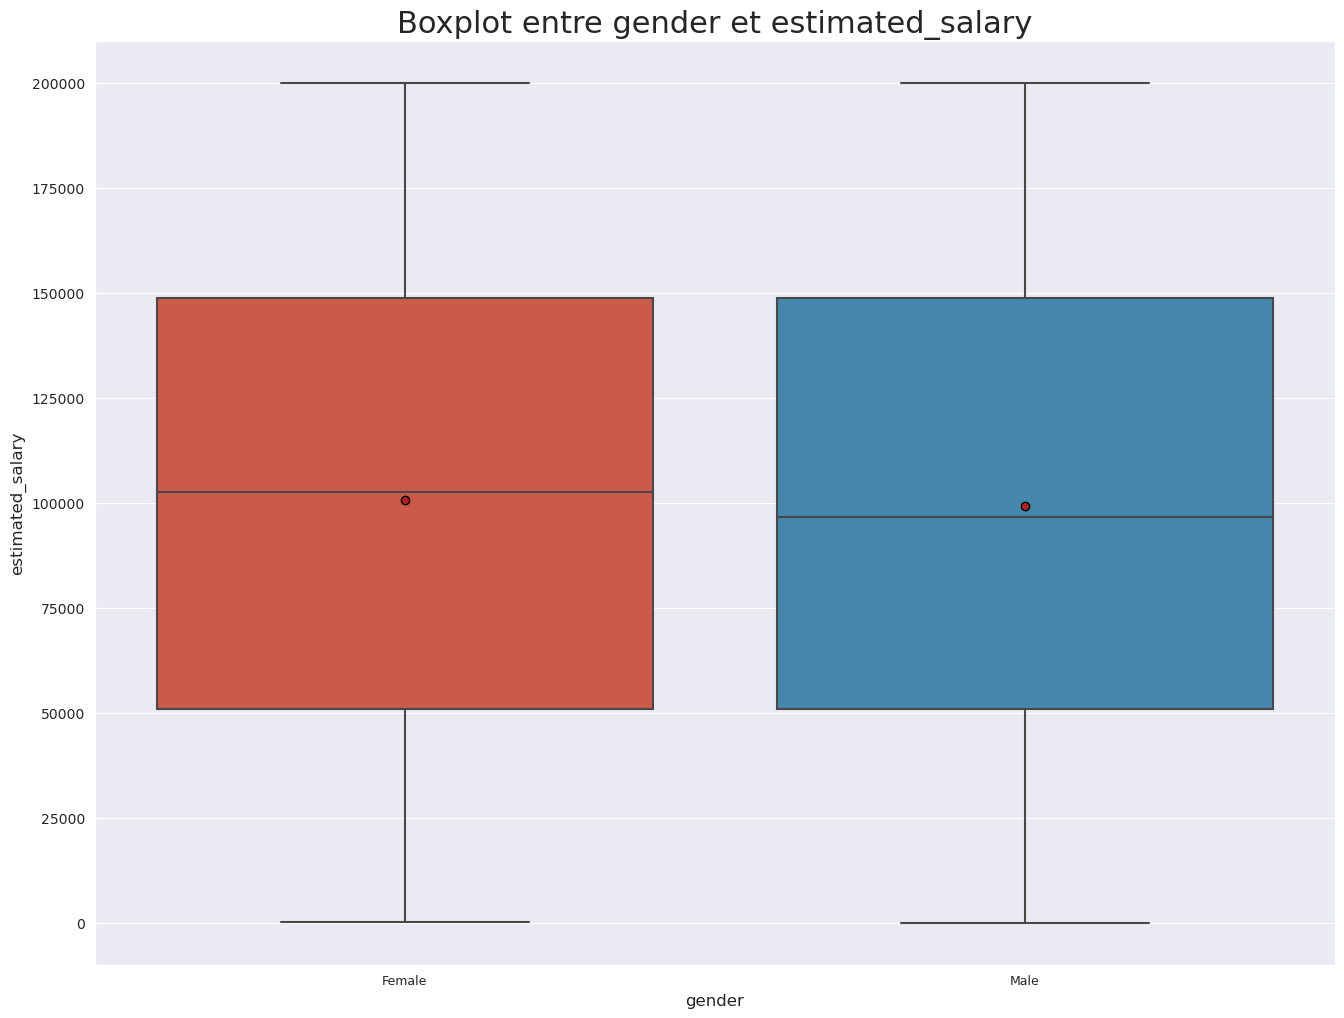

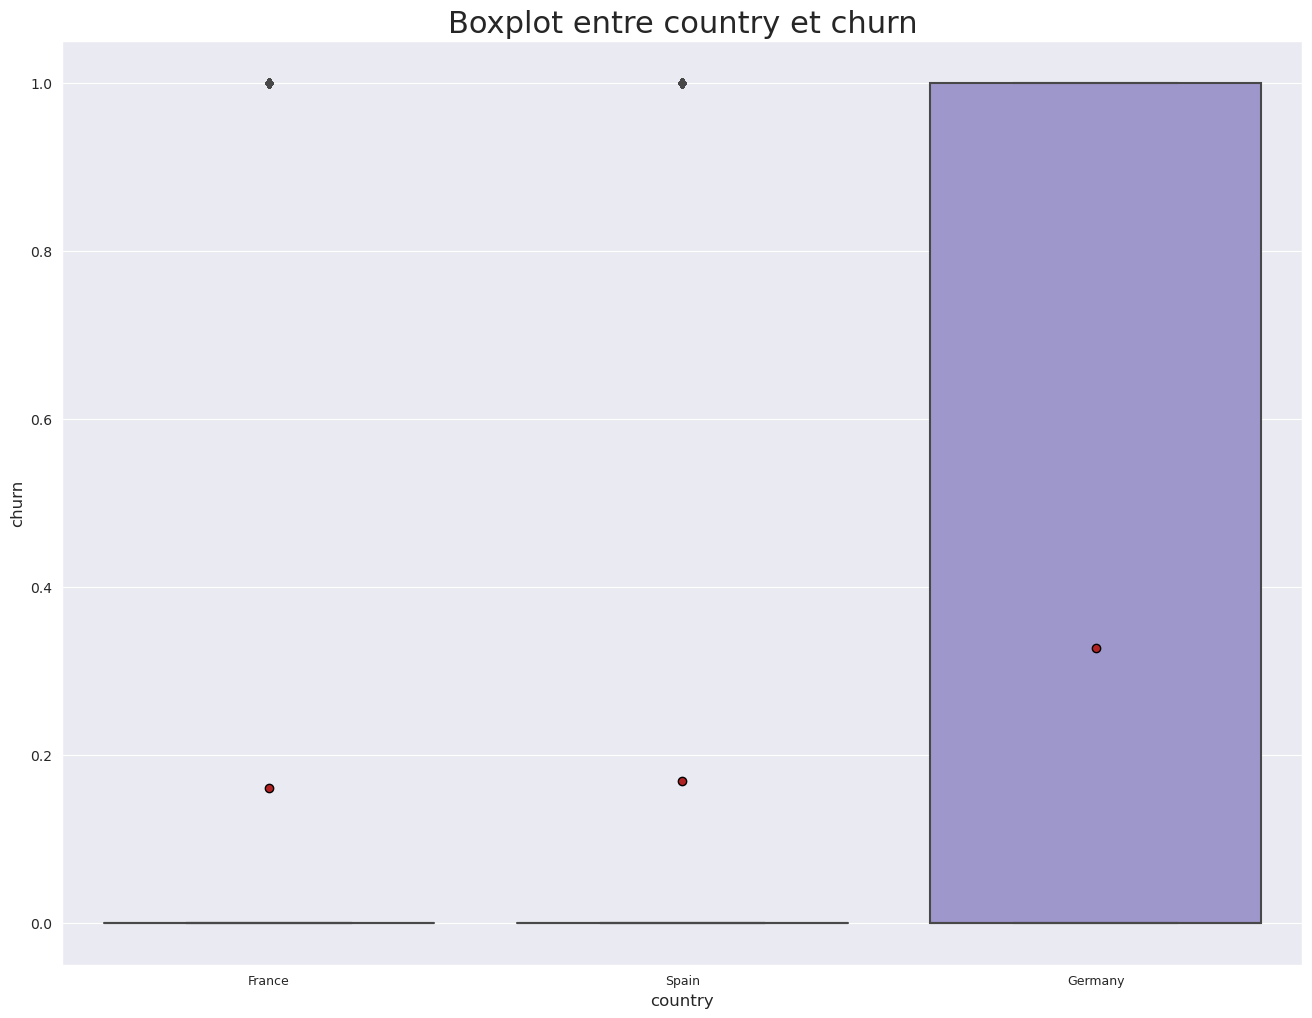

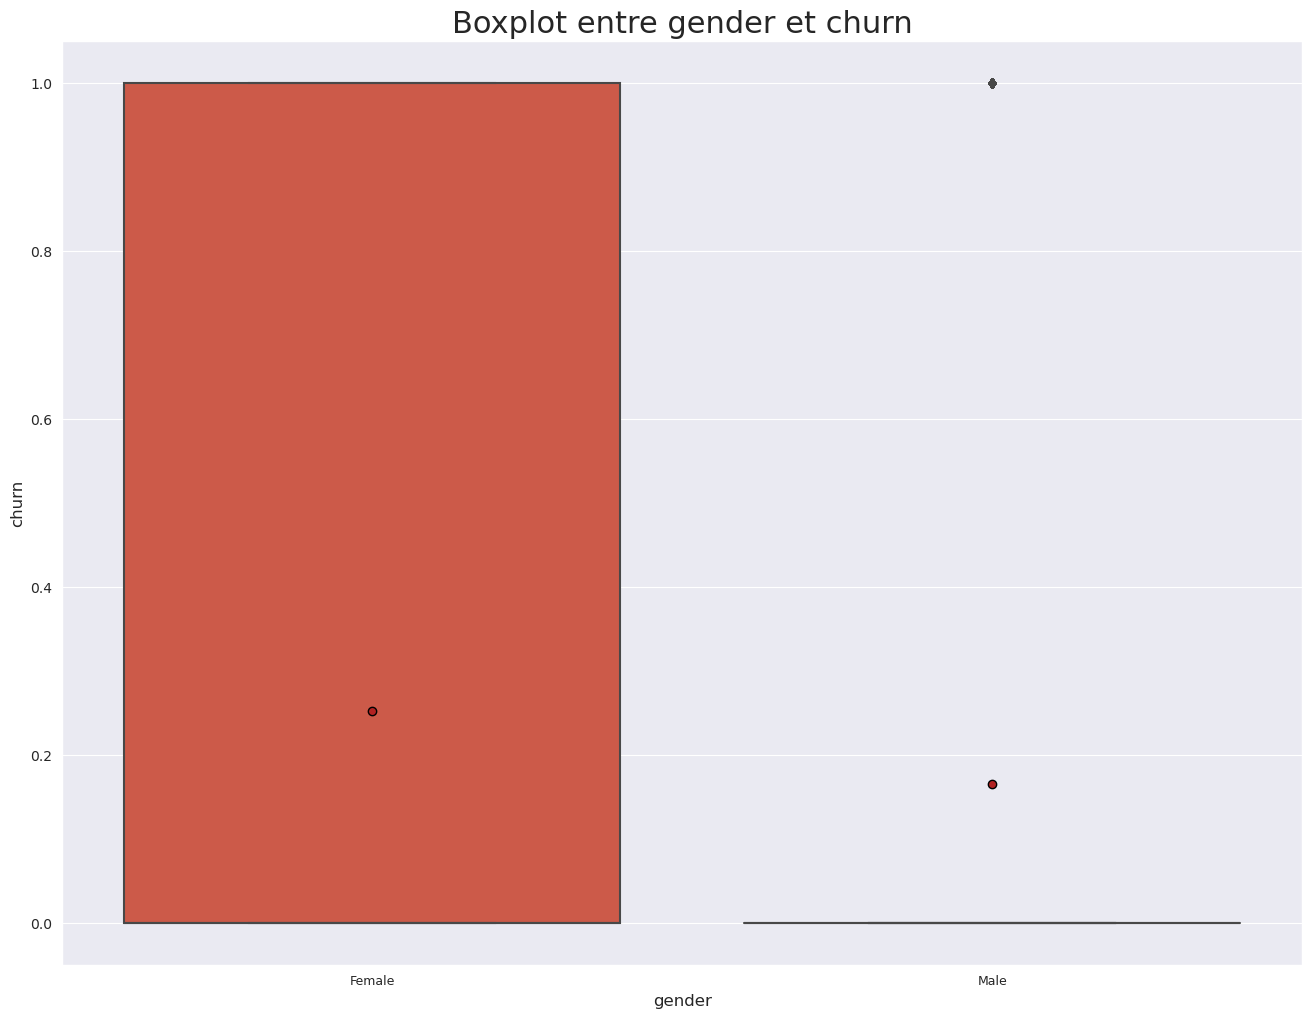

In [23]:
# boucle pour afficher boxplot avec combinaisons variables numériques et object
for i in li_number:
  for j in li_cat:
    if i!=j:
        exploration_Bivariate.categVSnum_boxplot(j,i)

In [24]:
# séléction les variables pour countplot
li_discret = list(df_churn[["tenure","products_number", "credit_card", "active_member", "churn"]])

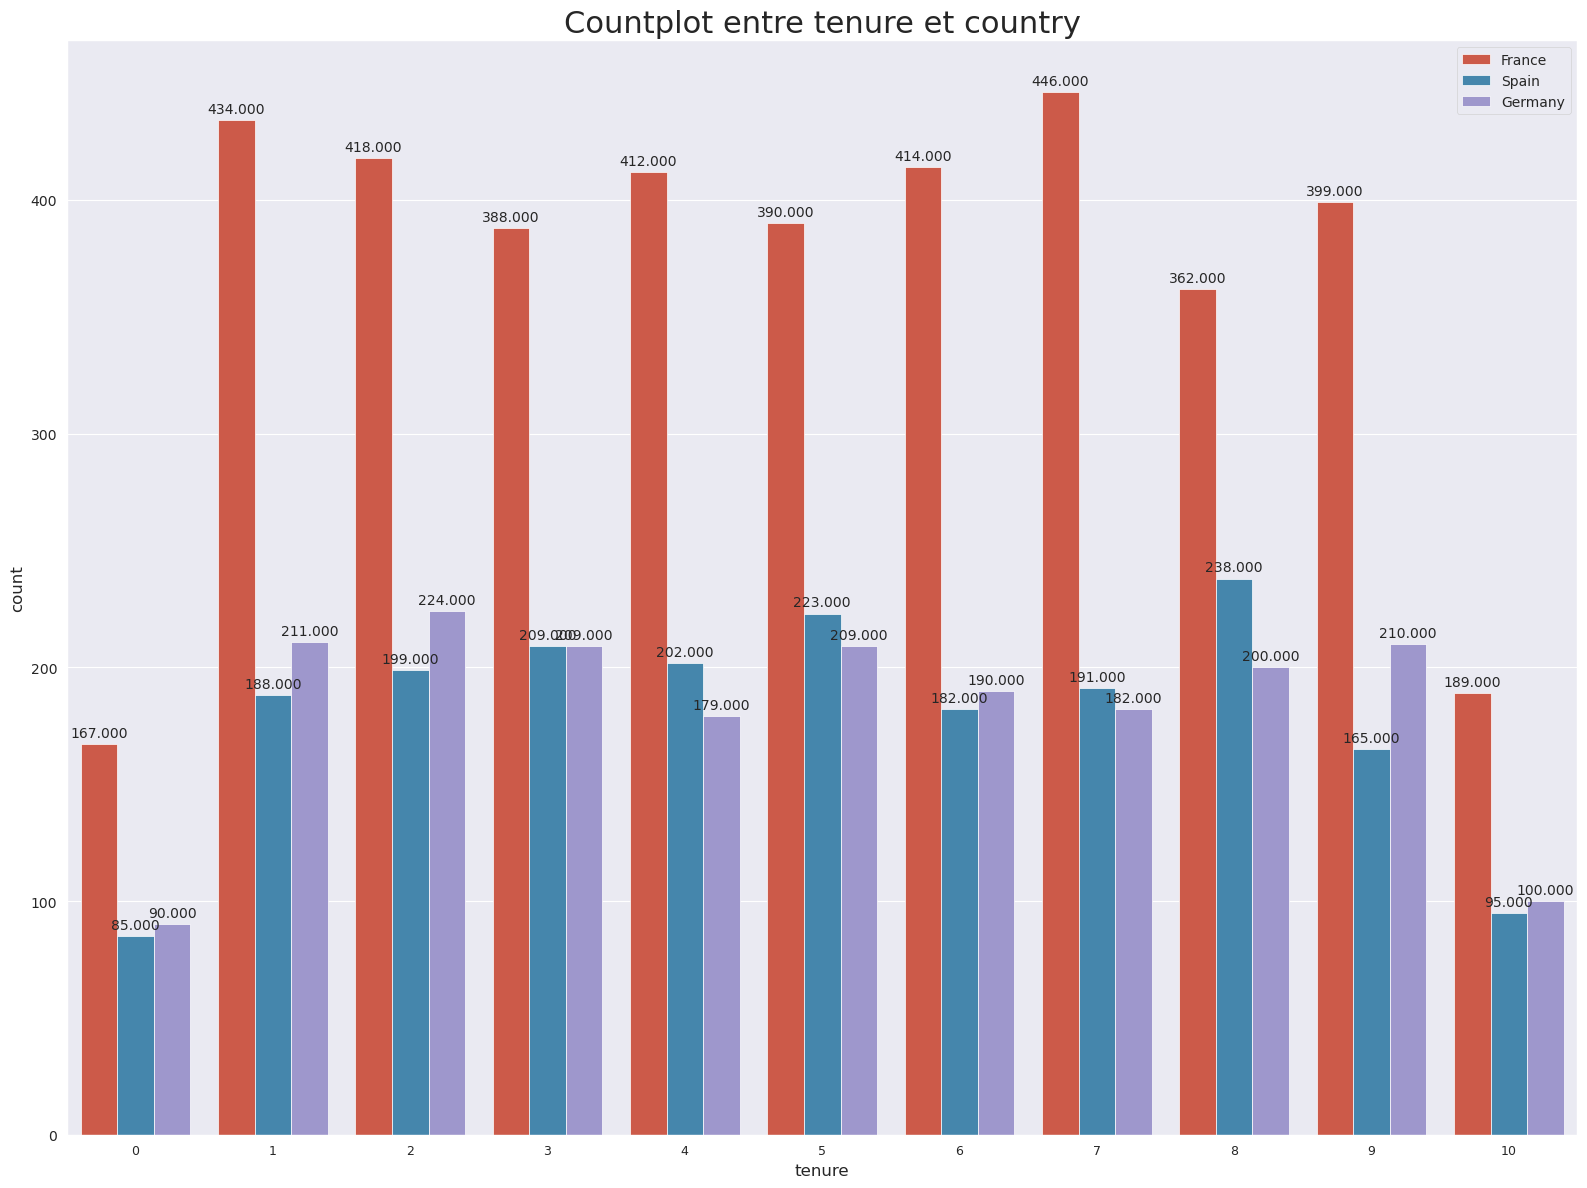

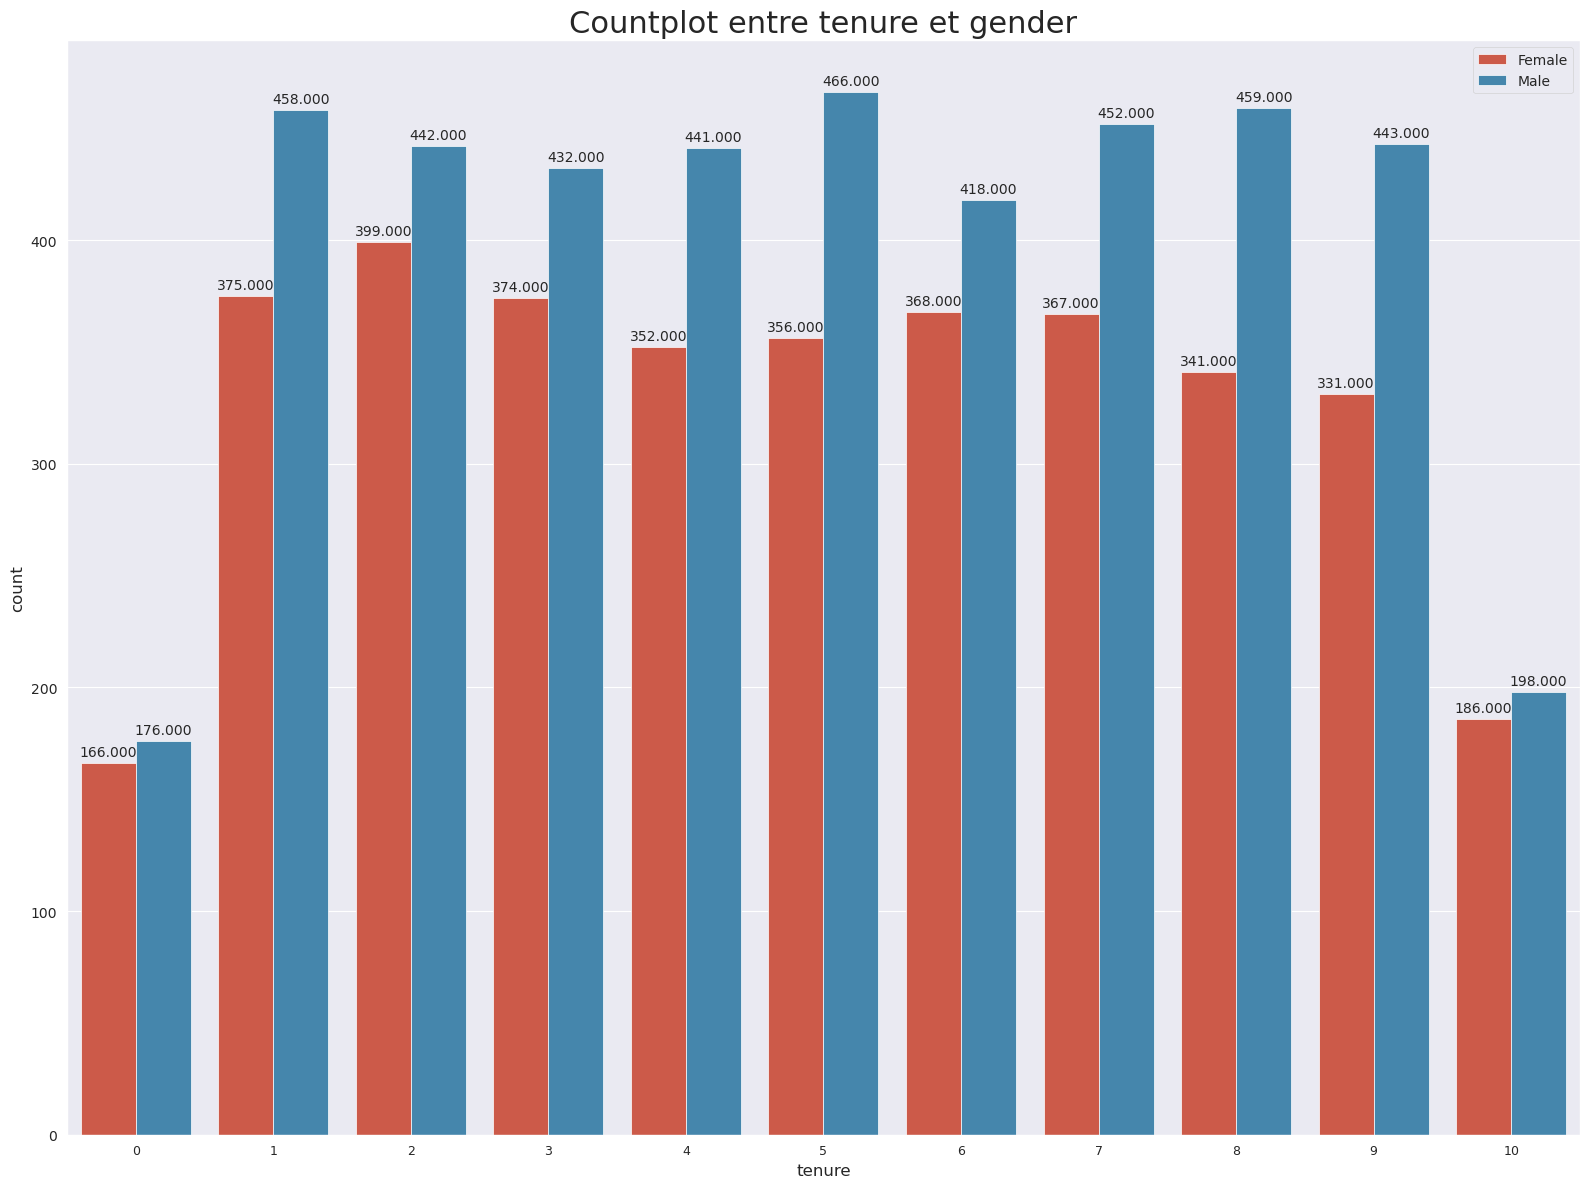

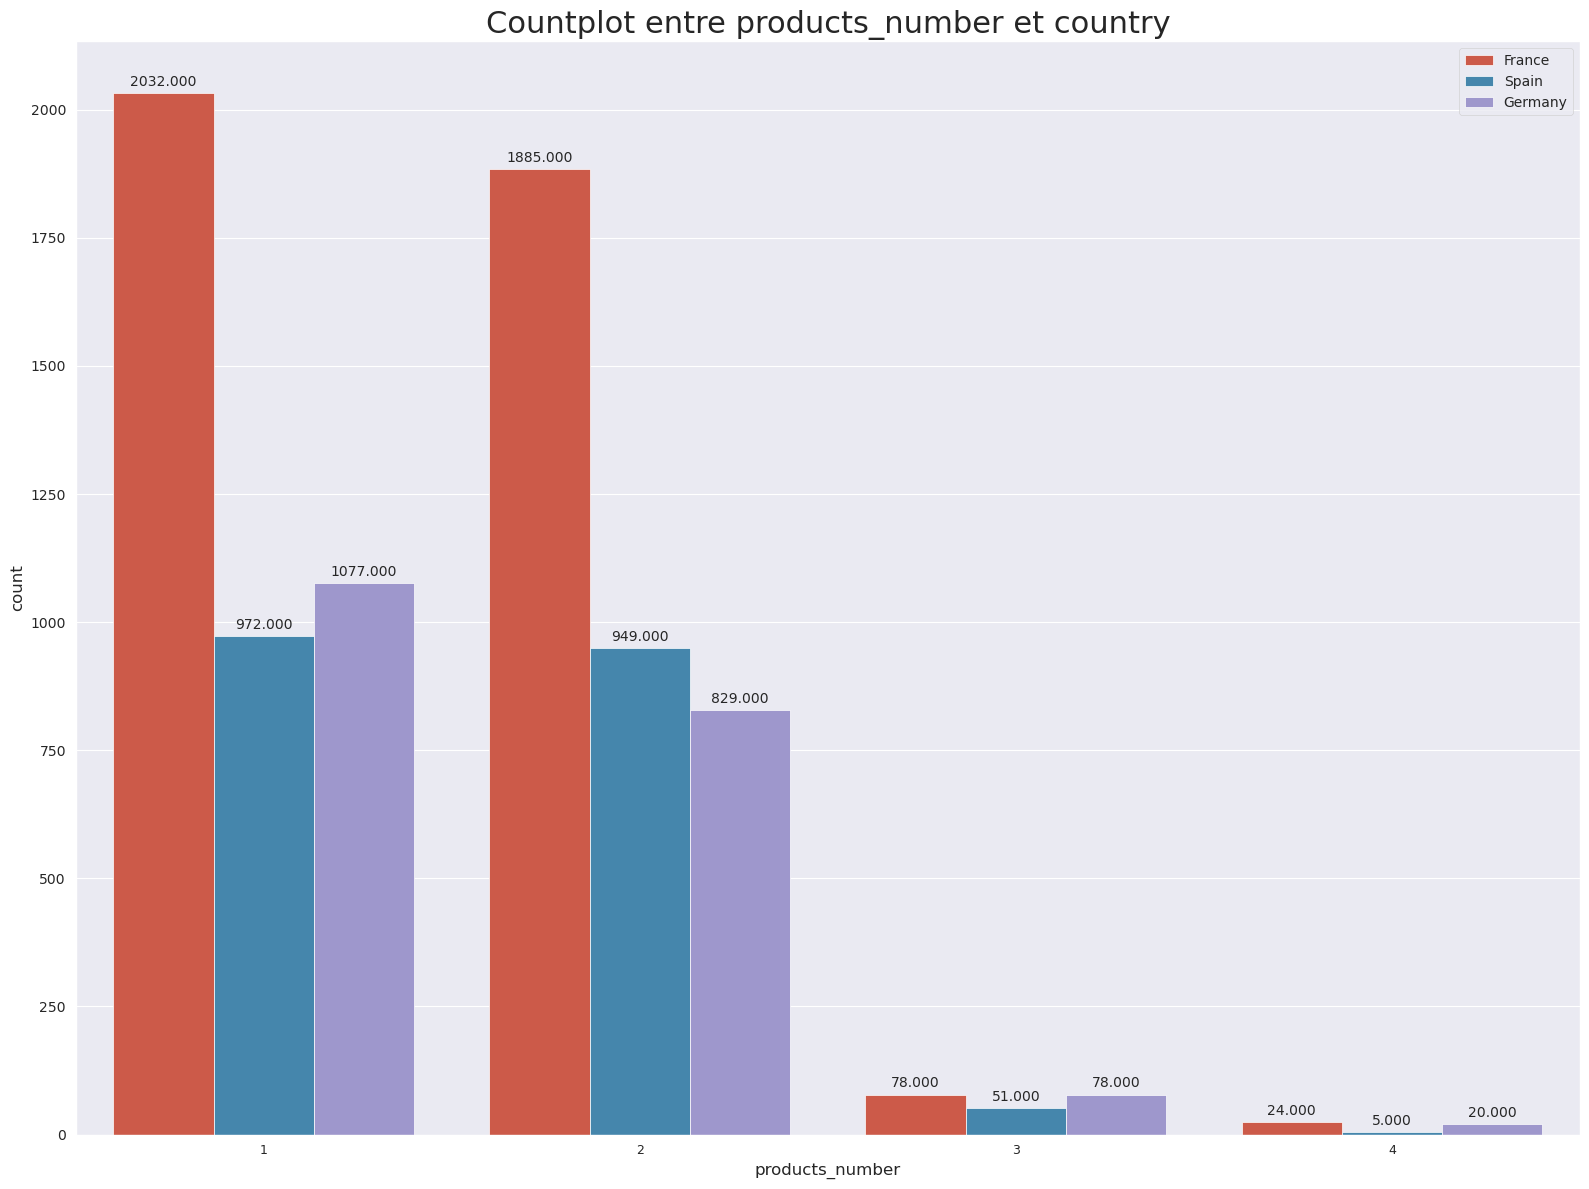

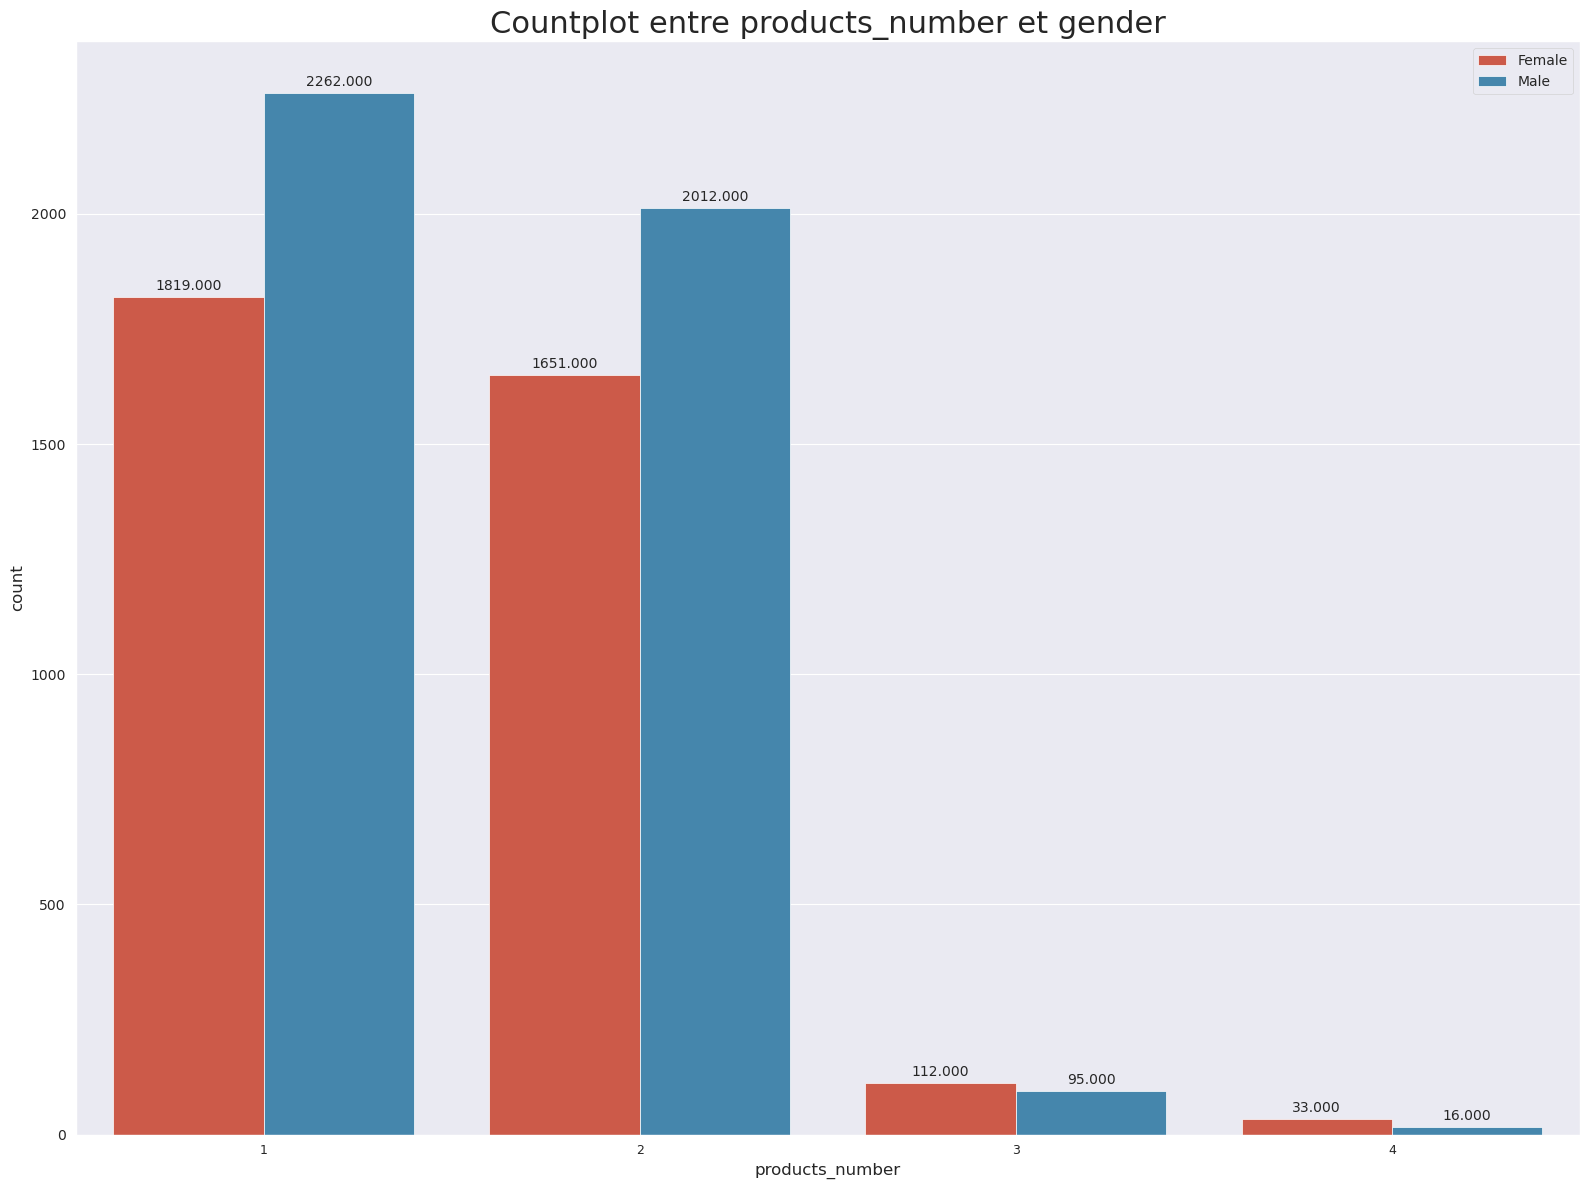

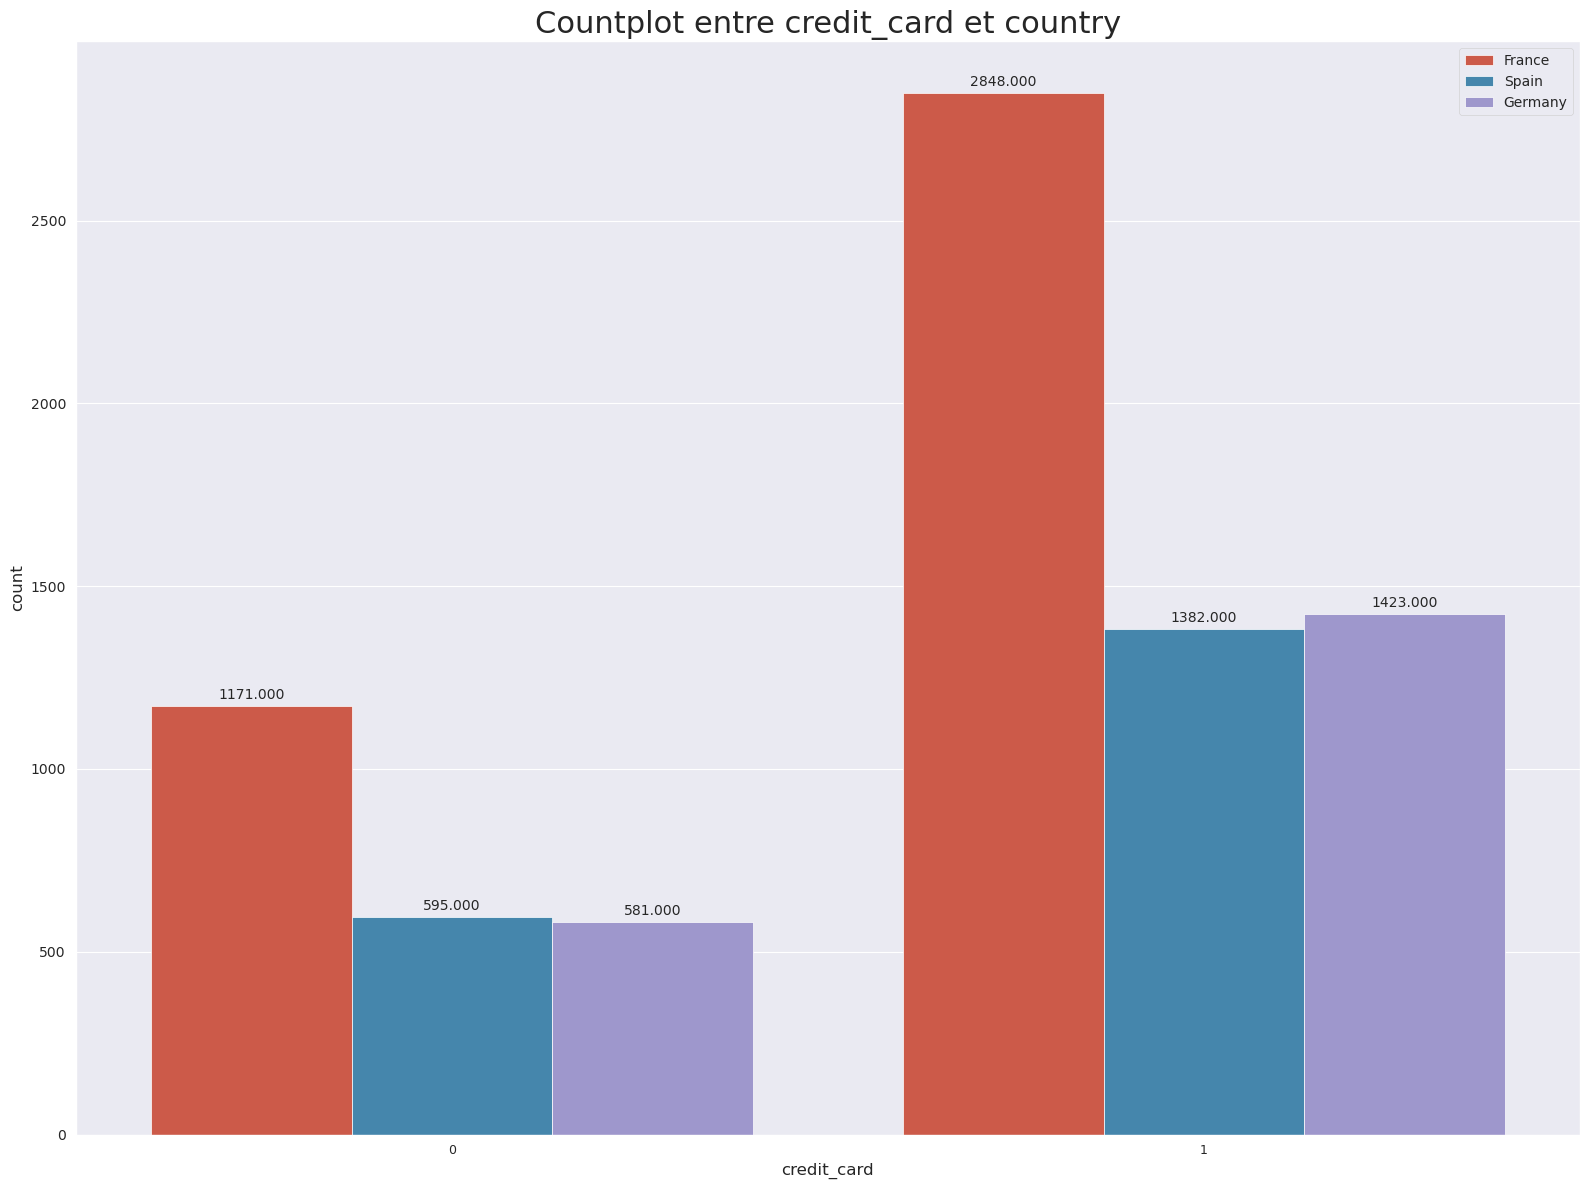

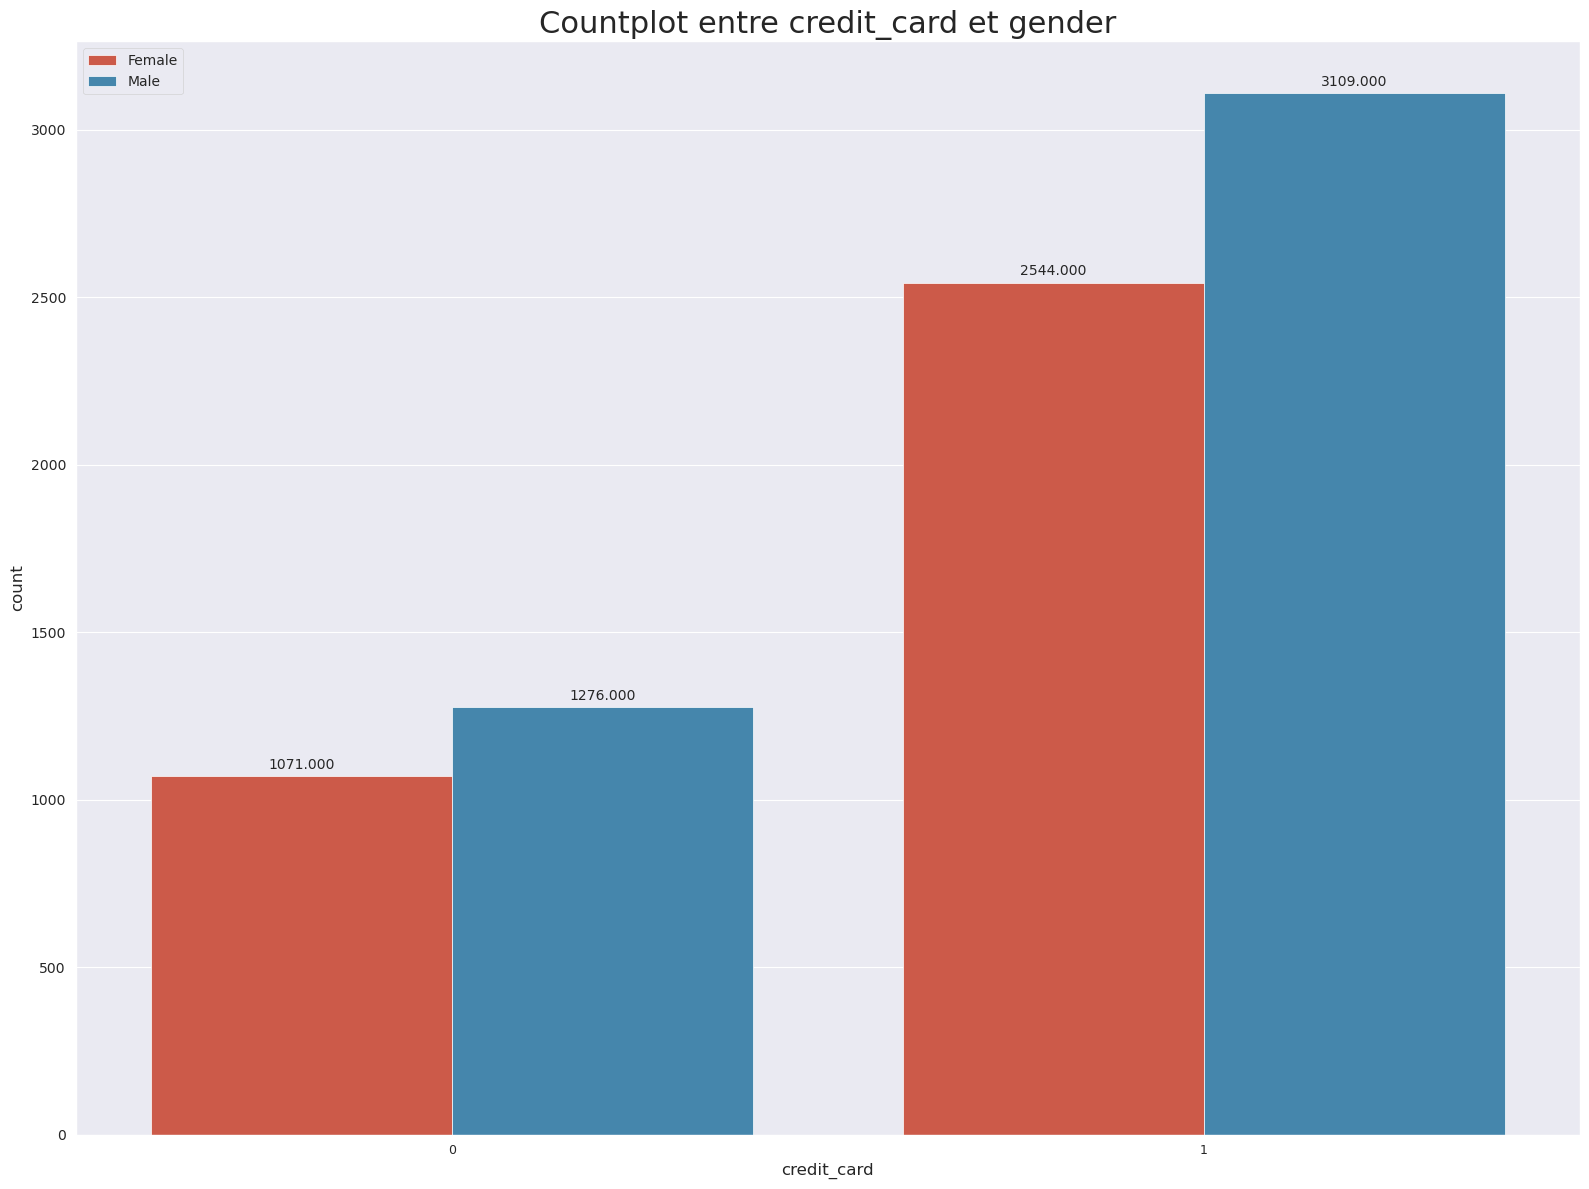

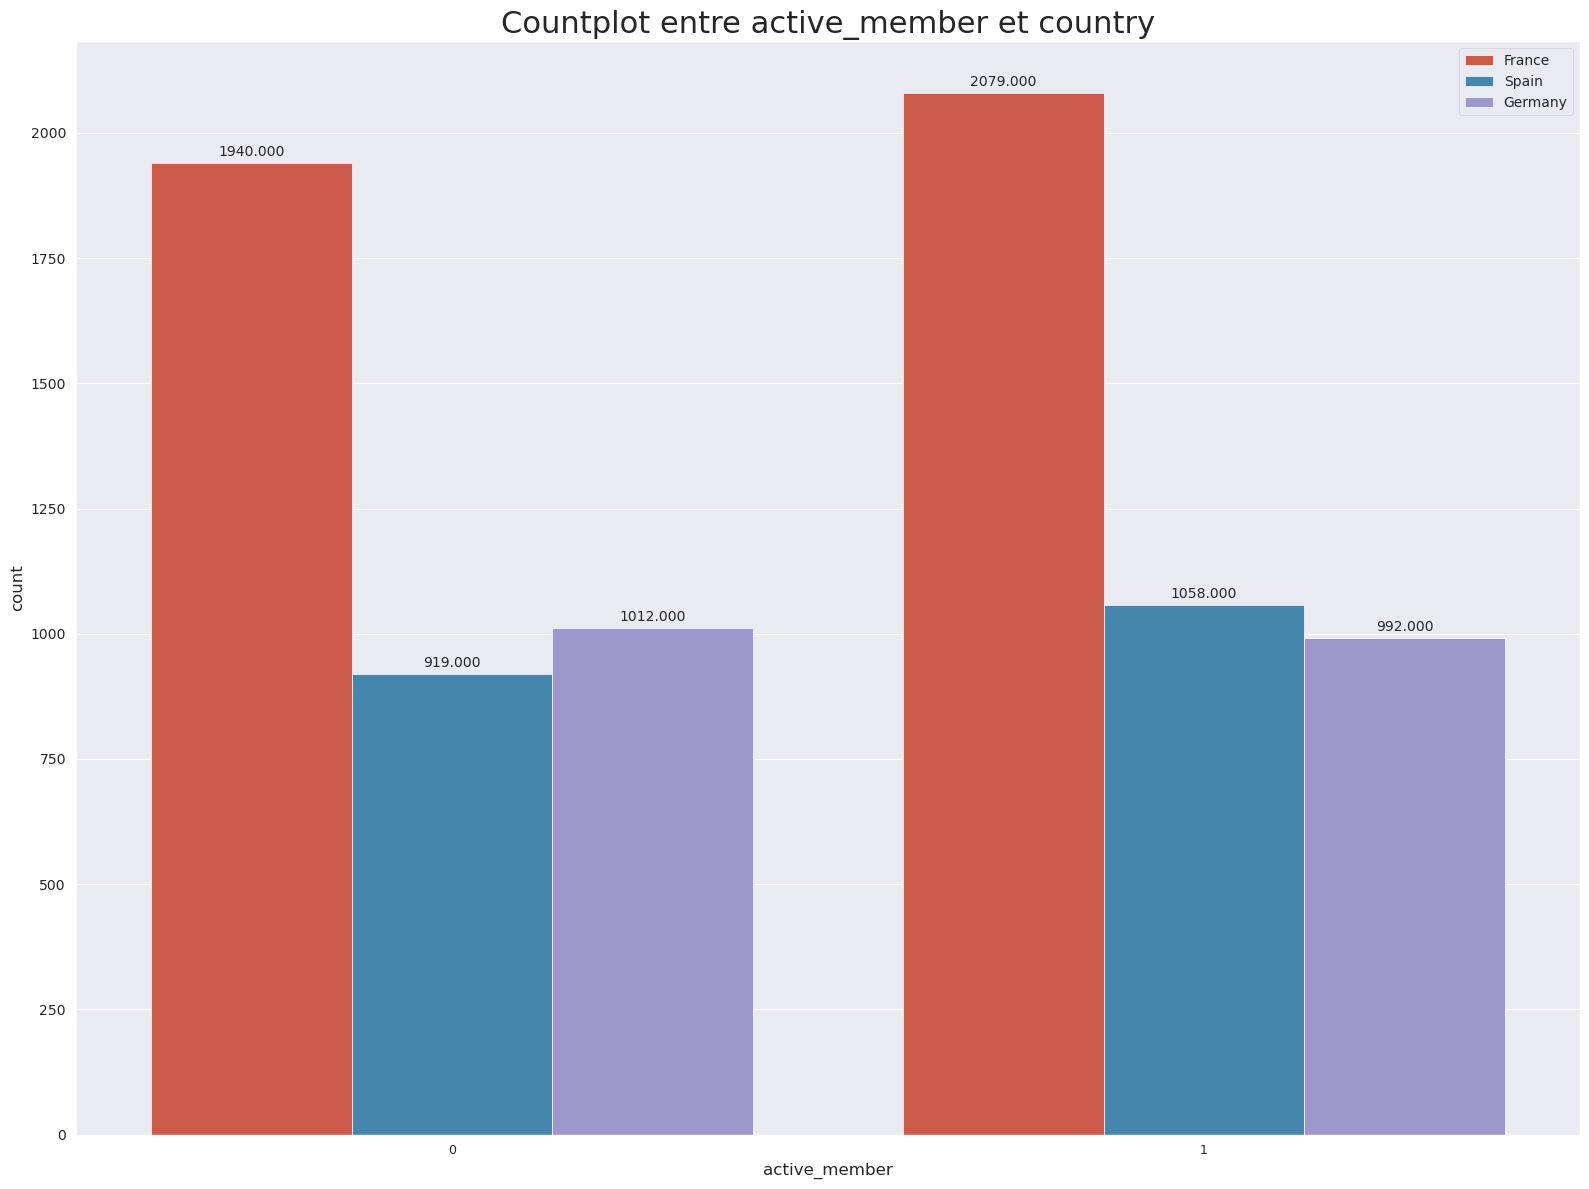

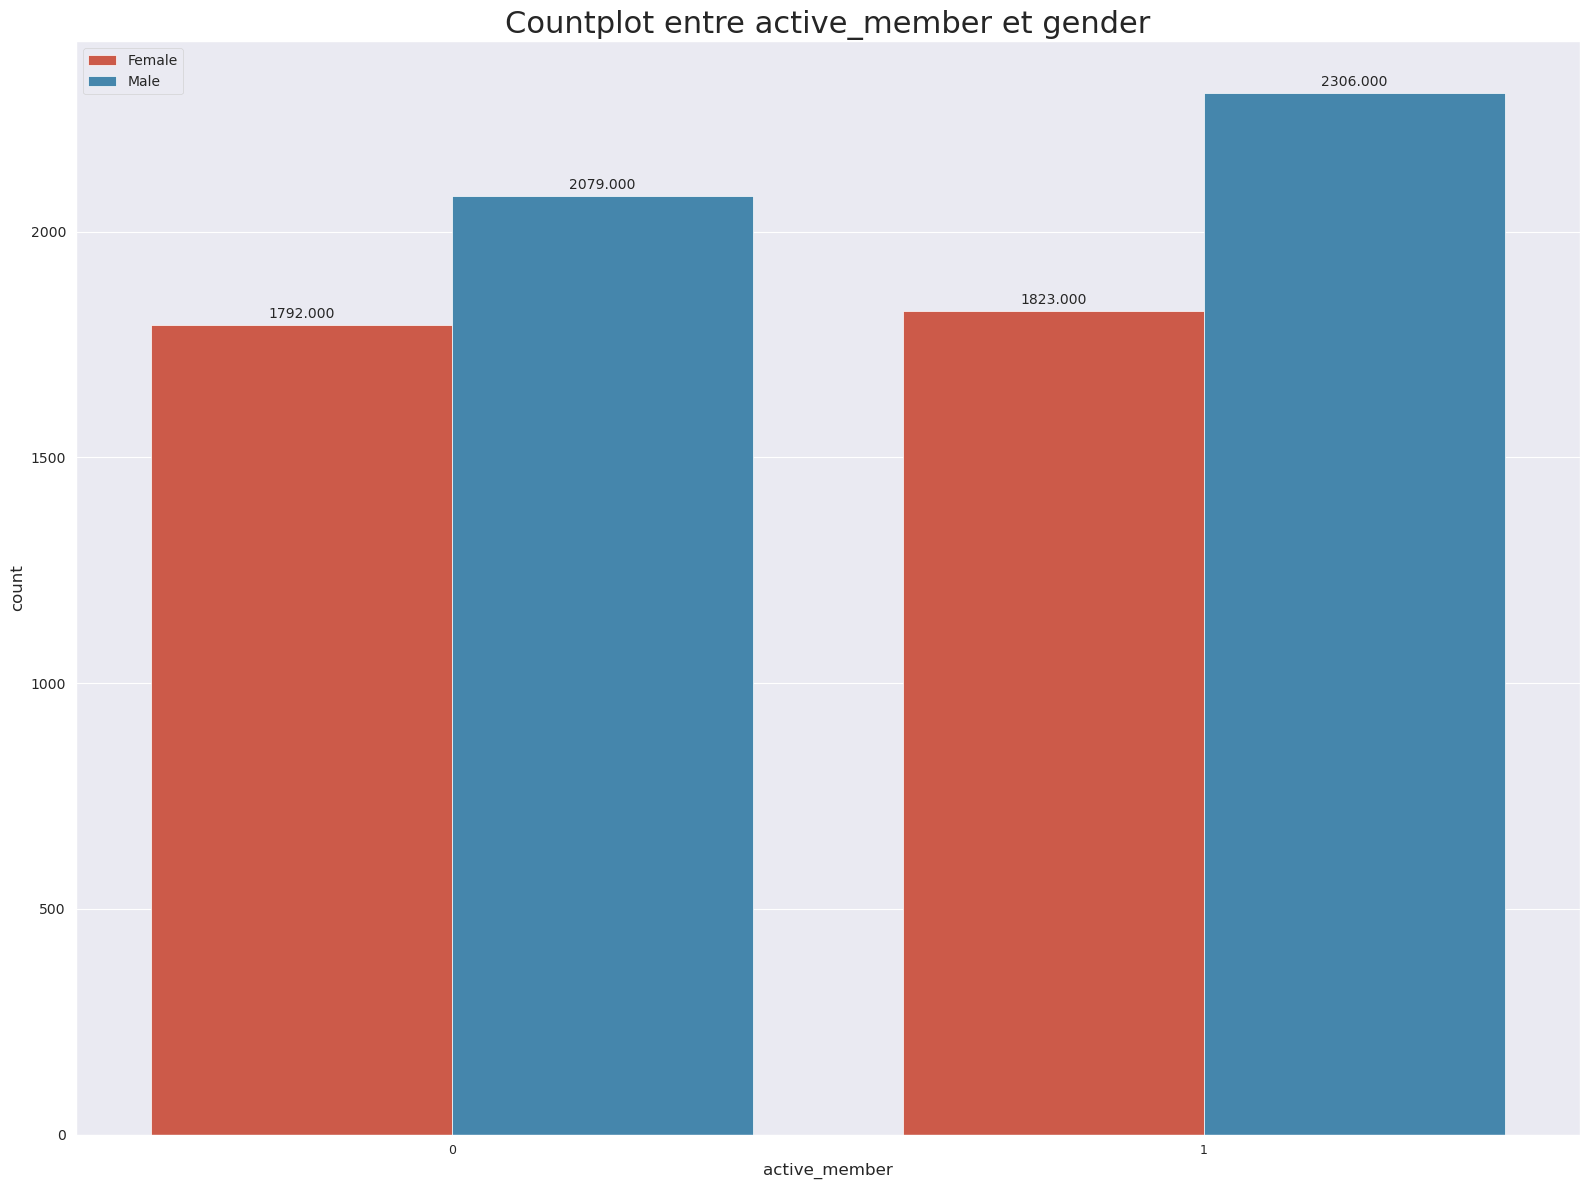

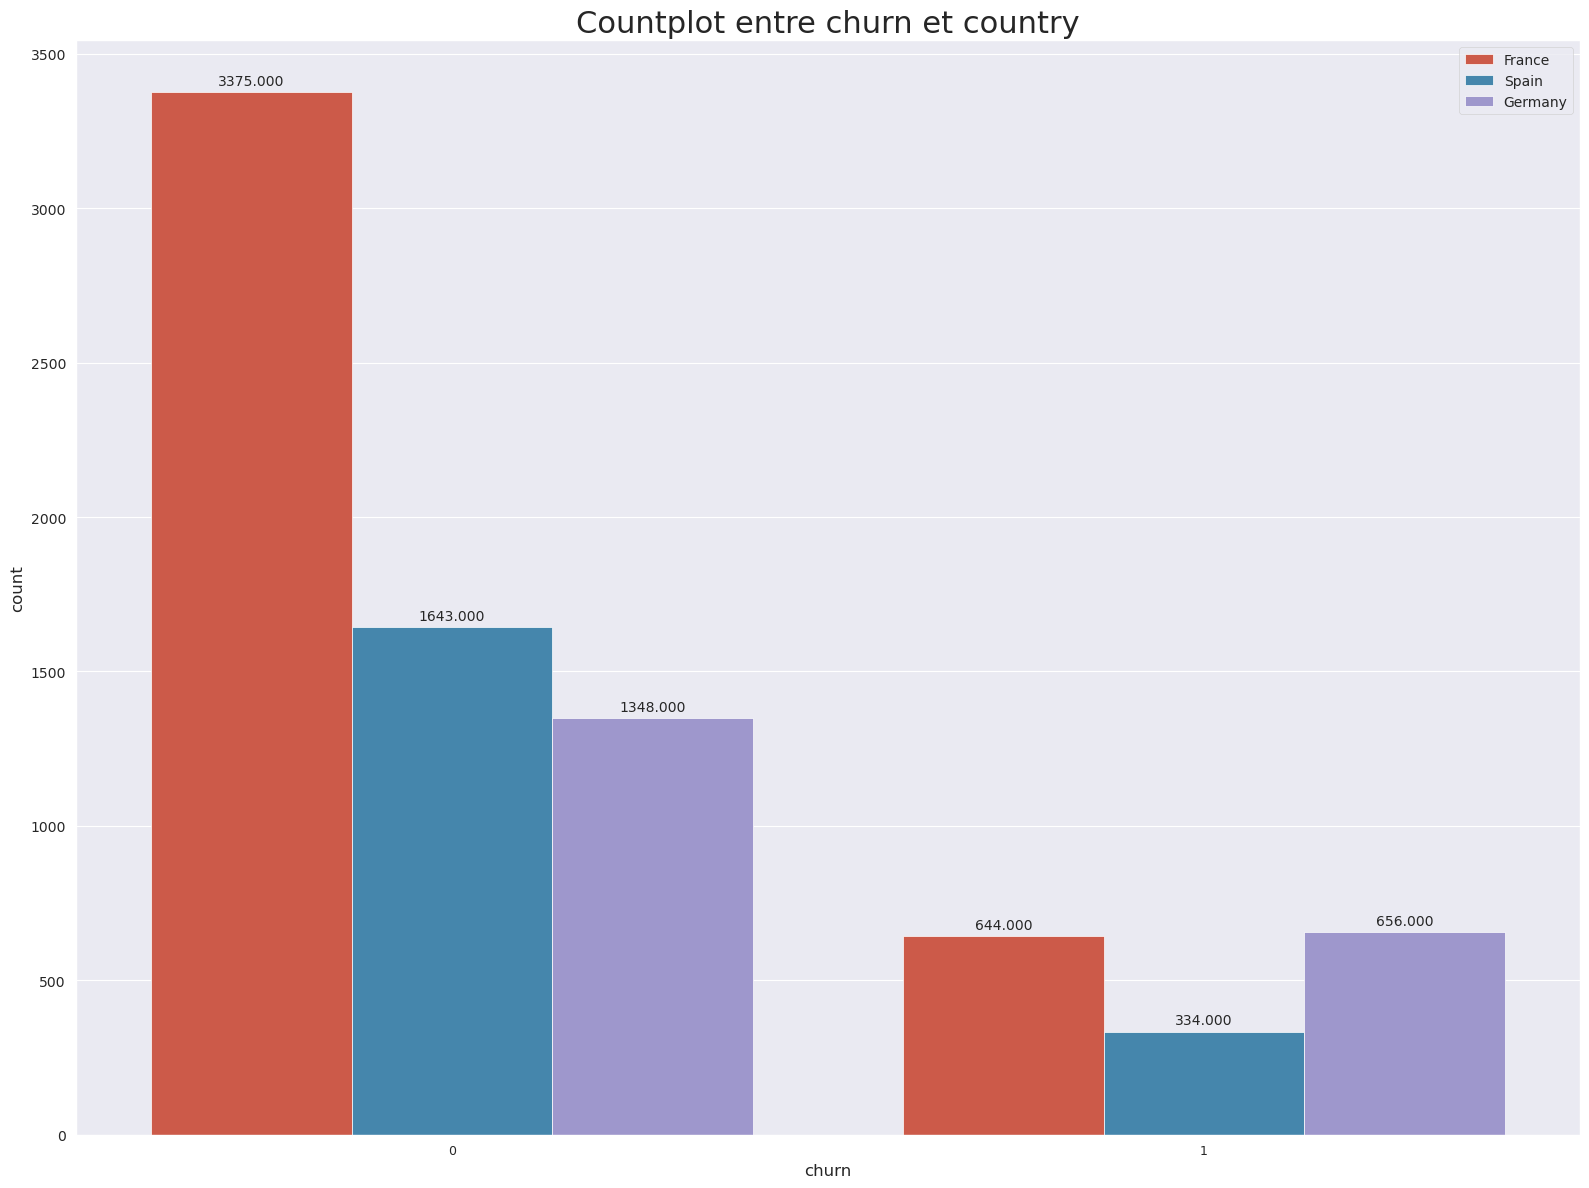

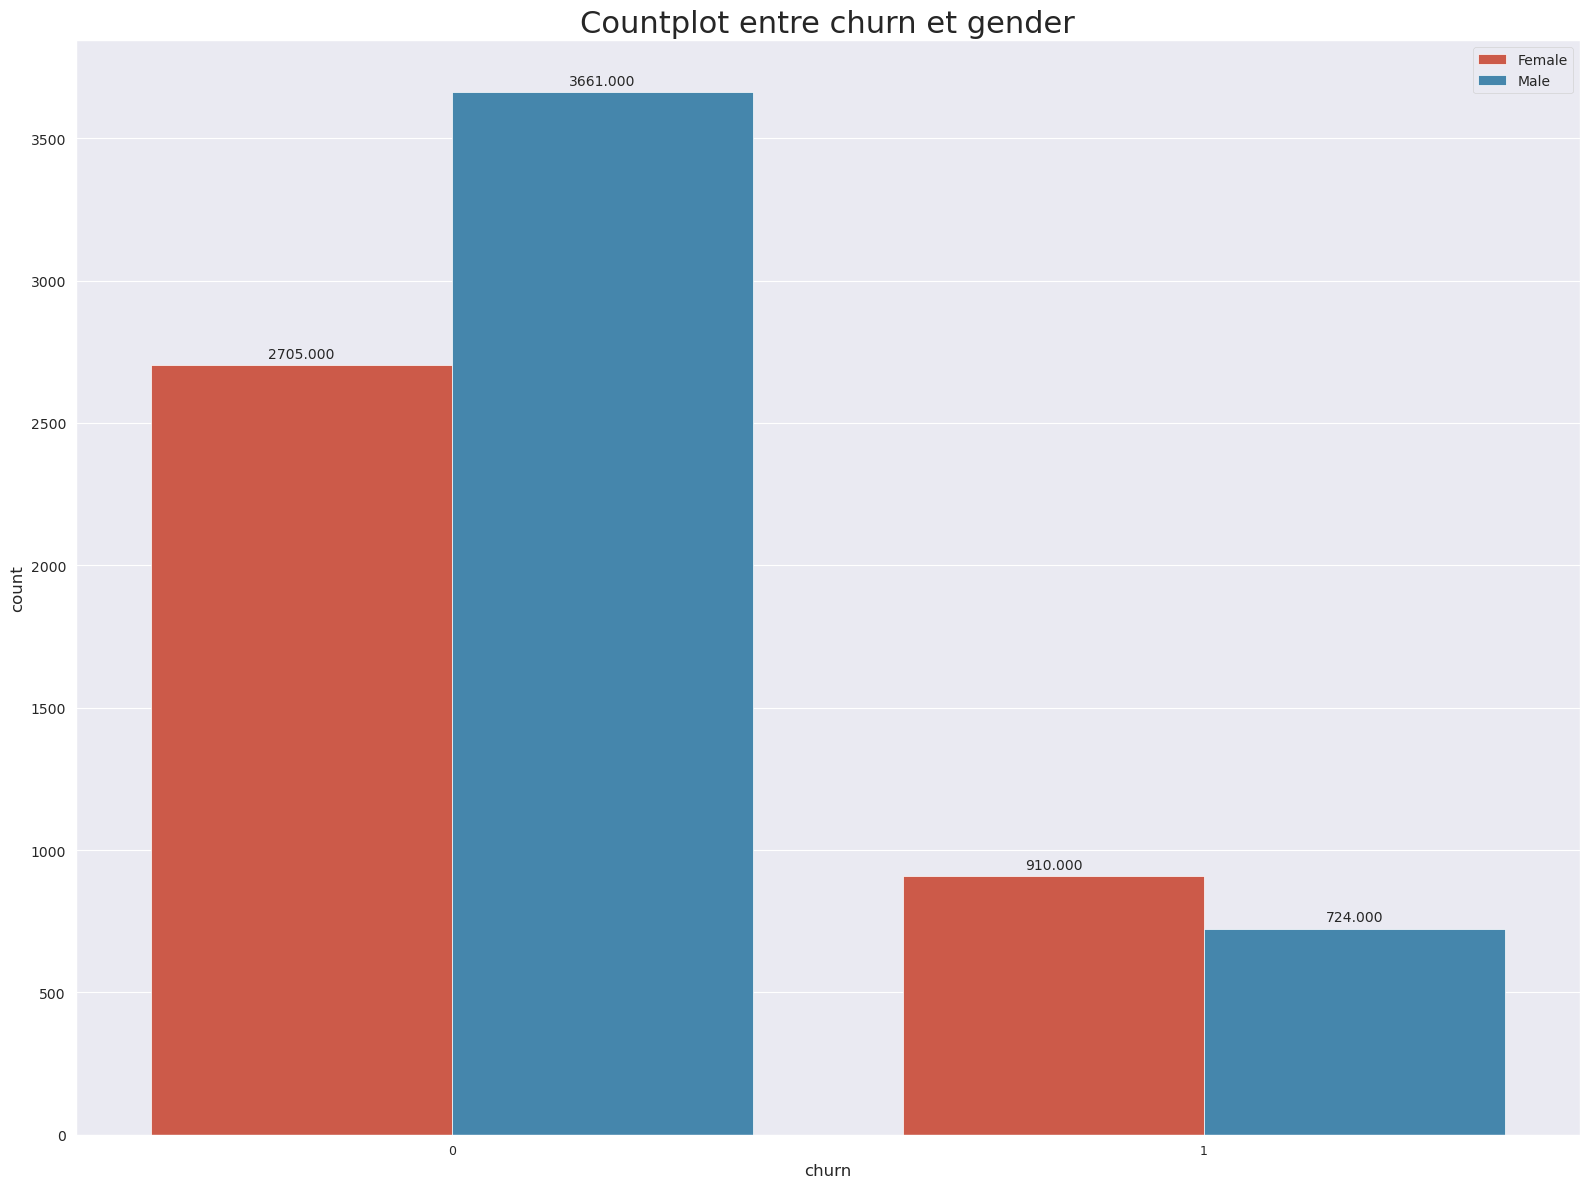

In [25]:
# boucle pour afficher combinaisons variables catégorielles différentes 
# Afficher countplot entre une variable catégorielle et variable catégorielle qui prend le nom de la colonne pour l’encodage des couleurs (hue)
for i in li_discret:
  for j in li_cat:
    if i!=j :
        exploration_Bivariate.categVScateg_countplot(i,j)

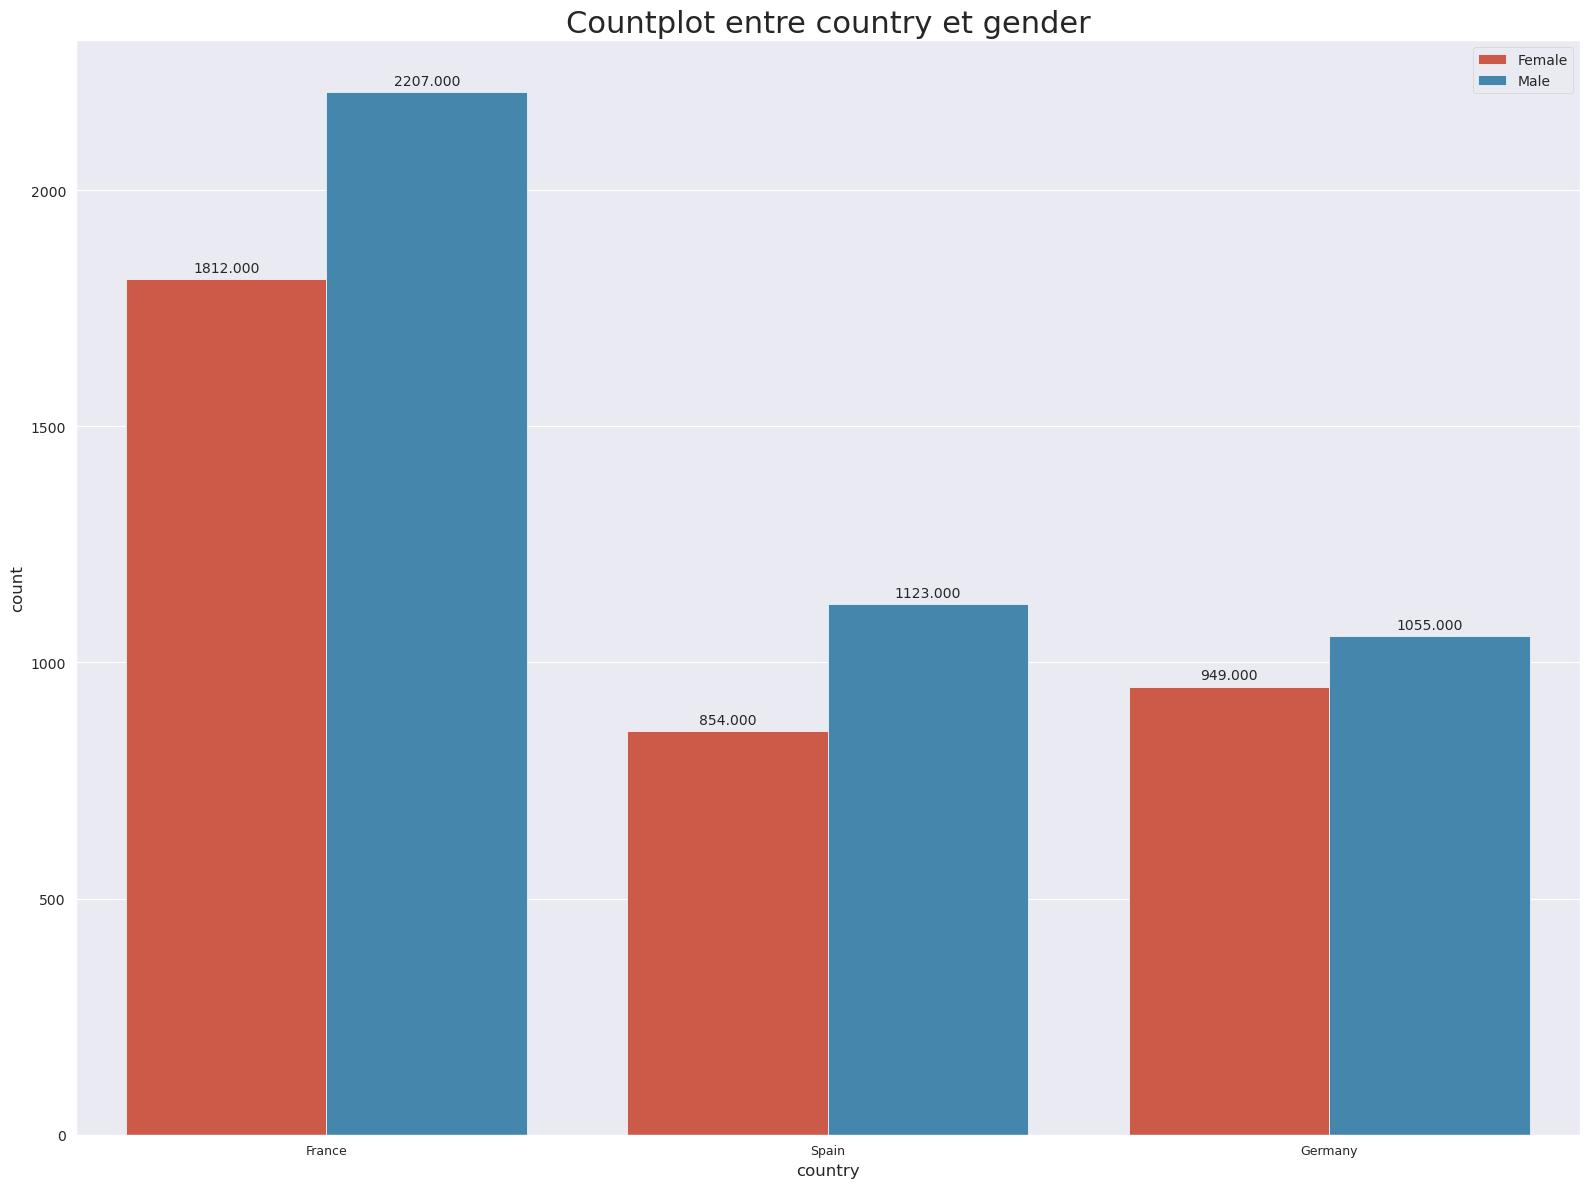

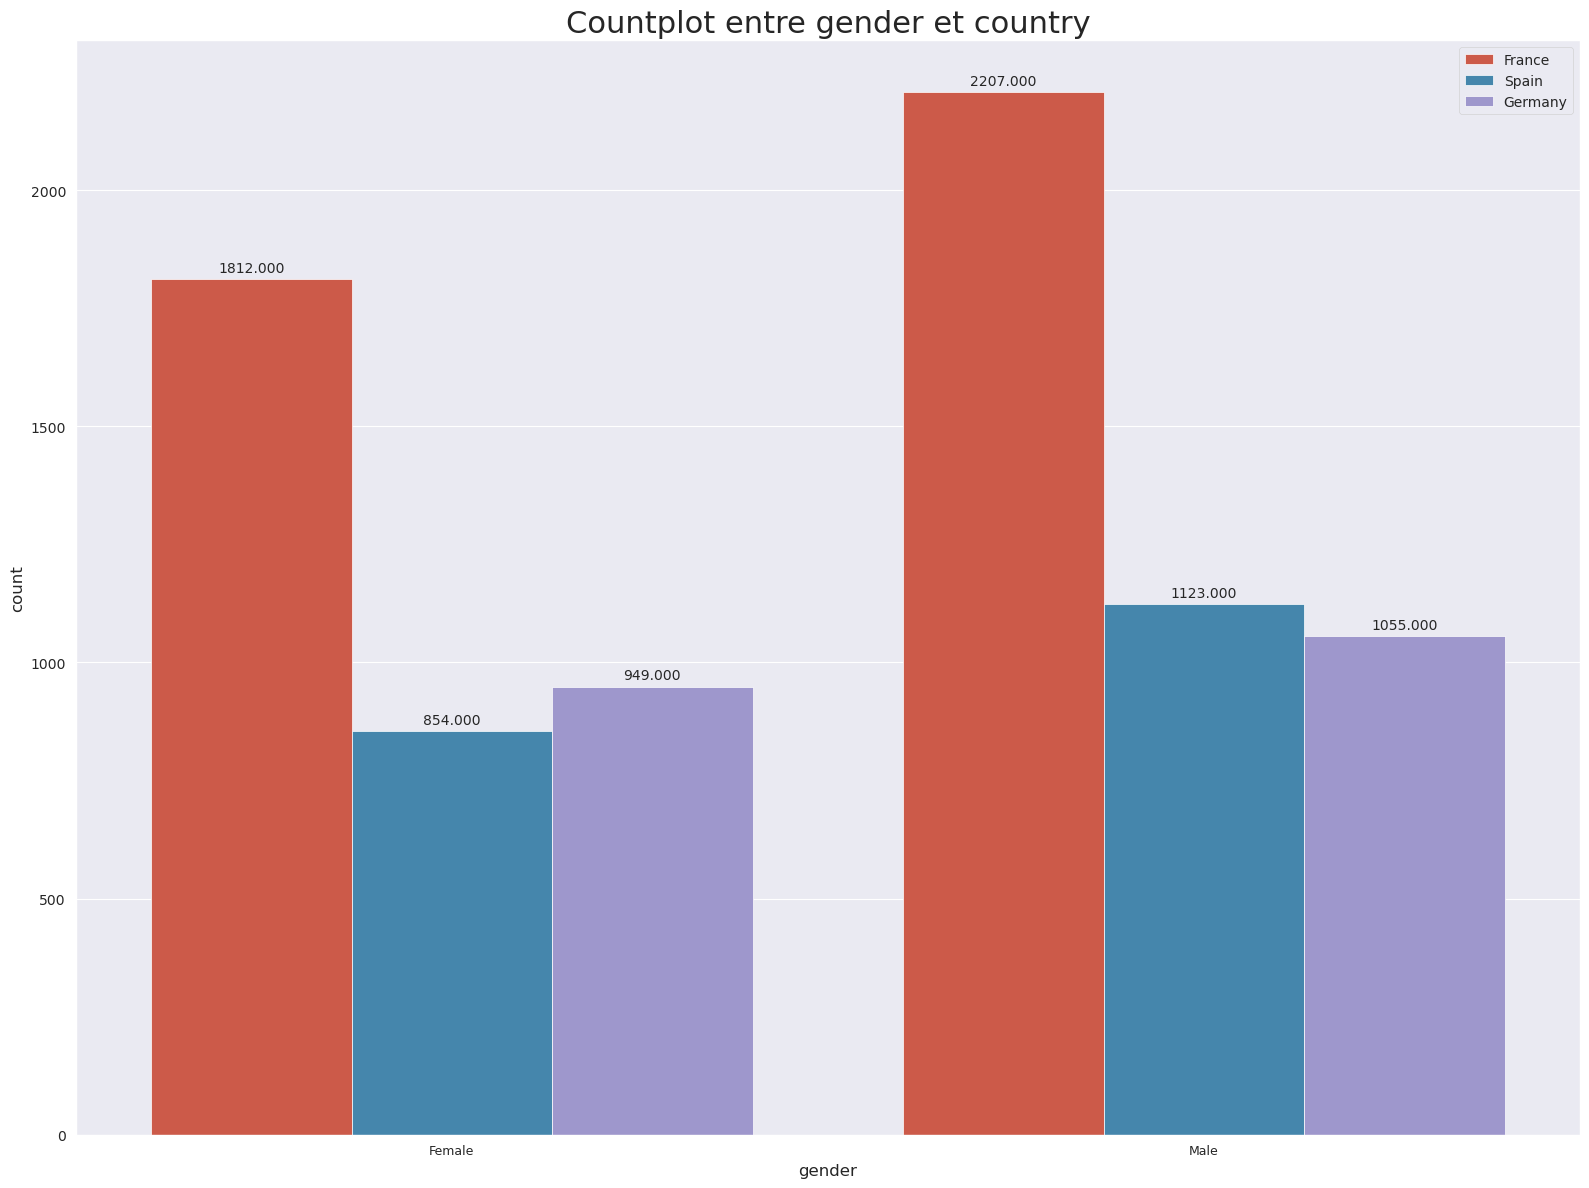

In [26]:
# boucle pour afficher combinaisons variables catégorielles différentes 
# Afficher countplot entre une variable catégorielle et variable catégorielle qui prend le nom de la colonne pour l’encodage des couleurs (hue)
for i in li_cat:
  for j in li_cat:
    if i!=j :
        exploration_Bivariate.categVScateg_countplot(i,j)

## Analyse multivariée 

- [X] PCA 
   
  n_components: int = 2
  
  Interprétation : avec 40.9 % de variance expliquées la visualitsation 2D ne permet pas de séparer les 2 classes 
   

- [X] TSNE 

  n_components: int = 2, perplexity: int = 30, learning_rate: int = 200
  
  <font color=red>Interprétation:

  Ne permet pas d'avoir une compréhension plus profonde sur les clients 
  
  
  
  

In [27]:
#instancie un objet de la classe MyTSNE et l'assigne à la variable tsne_explorer.
tsne_explorer = MyTSNE(trainset[["churn", "credit_score", "age", "tenure","balance", "estimated_salary"]].set_index("churn"))
# features extraction methode
tsne_explorer.fit_transform()


array([[  2.1940703,  68.34066  ],
       [-32.703243 , -48.299664 ],
       [-42.82694  , -24.790226 ],
       ...,
       [ 14.9232435,  62.689022 ],
       [-29.590443 , -11.452244 ],
       [ 12.775923 ,  73.65888  ]], dtype=float32)

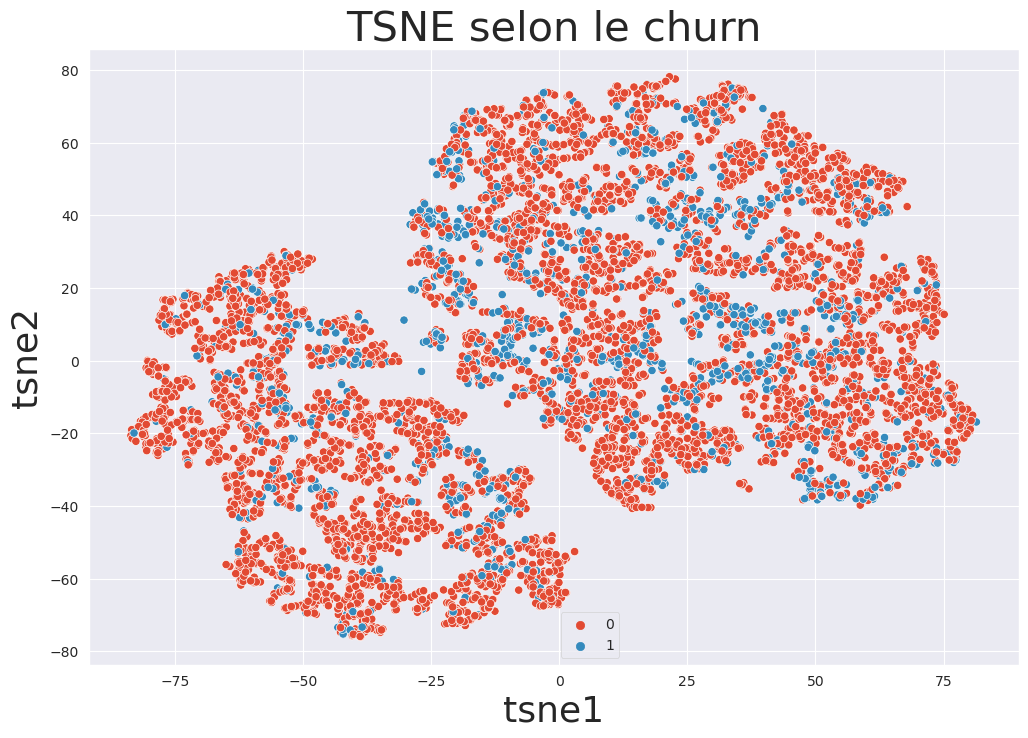

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [34]:
# visualiser tsne plot 2D
tsne_explorer.Plot()

In [35]:
# instancie un objet de la classe MyPCA et l'assigne à la variable PCA_explorer.
PCA_explorer = MyPCA(trainset[["churn", "credit_score", "age", "tenure","balance", "estimated_salary"]].set_index('churn'), 0.95)
#methode fit_transform pour features extraction
pd.DataFrame(PCA_explorer.fit_transform())

0         1         2         3         4
0    -0.712326  0.313541 -1.100692 -0.359722 -1.031922
1    -1.064754 -0.929761  0.608824 -0.513154  0.161279
2    -1.029128  0.297991  1.290101 -0.409981  0.855265
3    -0.691040 -0.159243 -1.171313 -0.557068  1.620215
4    -0.065287 -0.892276 -0.253884 -1.249572  1.491341
...        ...       ...       ...       ...       ...
7995  0.496560 -0.649014 -1.899268  0.750616 -0.373709
7996  0.480421  0.509531  0.642260  0.750751 -1.156137
7997  0.245467  0.977708 -1.382575  0.625275 -0.328618
7998 -0.950785 -1.483674 -0.463180 -1.738559  0.356212
7999 -0.310653  0.325450 -2.324251  1.312420 -0.559542

[8000 rows x 5 columns]

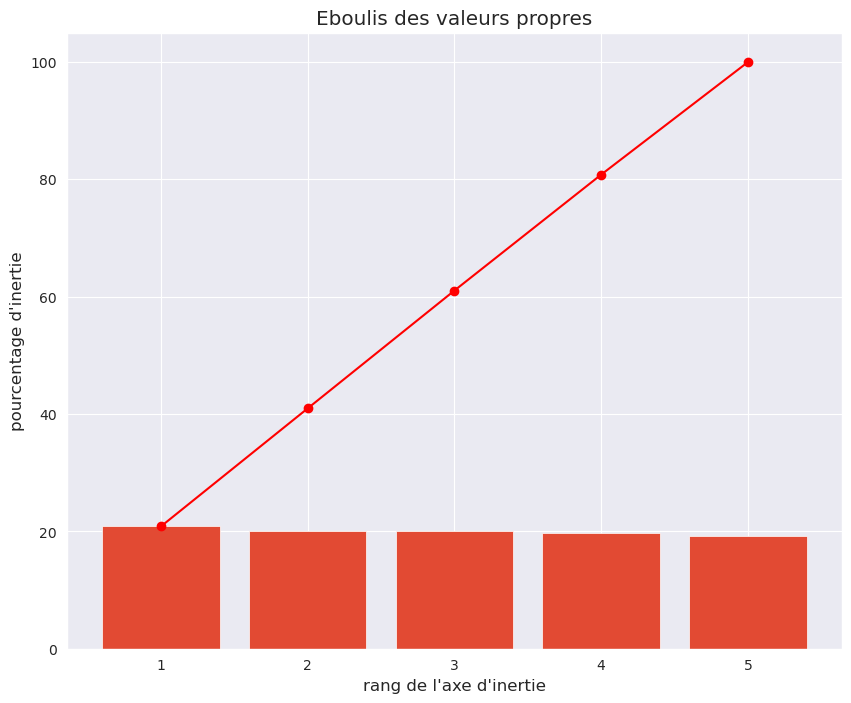

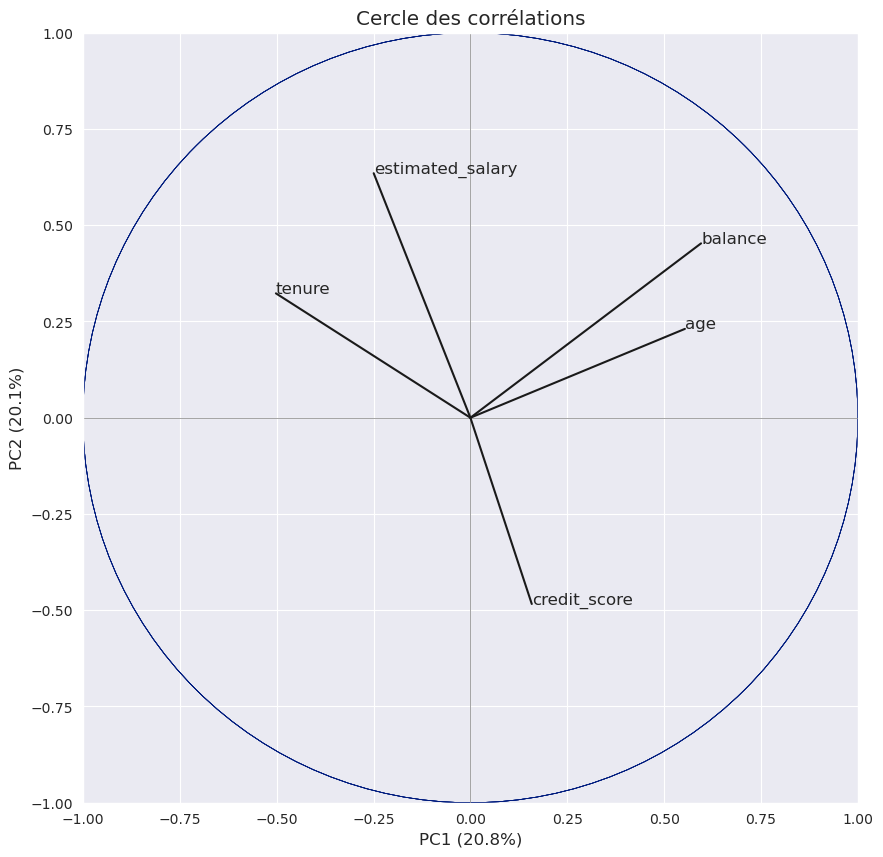

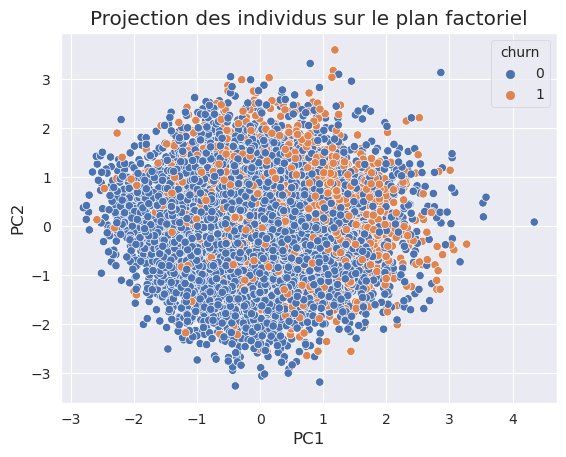

In [36]:
# Appeler methode plot pour
#visualiser eboulis des valeurs propres, cercle des corrélations, projections des clients
PCA_explorer.plot()

# 5) Séparer trainset et testset

- [X] La classe cible churn est déséquilibrée sur y_train
     
     0 (client non désabonnement): <font color=blue>79.575%
     
     1 (client non désabonnement): <font color=blue>20.425%
    
- [X] La classe cible churn est déséquilibrée sur y_test
     
     0 (client non désabonnement): <font color=blue>79.85%
     
     1 (client non désabonnement): <font color=blue>20.15%
   

    - [X] Approche pour classes déséquilibrées

    <font color=red> Oversampling (Smote, class_weight(parametre algo) etc..)
      

      
     

In [37]:
# la target
target = ["churn"]
# Séparer target et variables indépendantes
X_train = trainset.drop(target, axis='columns')
y_train = trainset[target]

In [38]:
# la target
target = ["churn"]
# Séparer target et variables indépendantes
X_test = testset.drop(target, axis='columns')
y_test = testset[target]

In [39]:
# Voir les dimensions de X_train et y_train
print(colored("Les dimensions de X_train: ", 'blue'),  X_train.shape)
print(colored("Les dimensions de y_train :",'blue'), y_train.shape)
print(" ")
# Voir les dimensions de X_test et y_test
print(colored("Les dimensions de X_test: ", 'magenta'),  X_test.shape)
print(colored("Les dimensions de y_test :",'magenta'), y_test.shape)

Les dimensions de X_train:  (8000, 10)
Les dimensions de y_train : (8000, 1)
 
Les dimensions de X_test:  (2000, 10)
Les dimensions de y_test : (2000, 1)


In [63]:
# Vérifier les classes pour y_train
print(colored("La classe cible est déséquilibrée pour y_train :", 'blue'), y_train.value_counts())
print(colored("La classe cible est déséquilibrée y_train en pourcentage:", 'blue'),y_train.value_counts(normalize=True))


# Vérifier les classes pour y_train
print(colored("La classe cible est déséquilibrée pour y_test :", 'red'), y_test.value_counts())
print(colored("La classe cible est déséquilibrée y_test en pourcentage:", 'red'),y_test.value_counts(normalize=True))


La classe cible est déséquilibrée pour y_train : churn
0        6366
1        1634
dtype: int64
La classe cible est déséquilibrée y_train en pourcentage: churn
0        0.79575
1        0.20425
dtype: float64
La classe cible est déséquilibrée pour y_test : churn
0        1597
1         403
dtype: int64
La classe cible est déséquilibrée y_test en pourcentage: churn
0        0.7985
1        0.2015
dtype: float64


# 5) La fonction cout métier 

- [ ] Quelle métrique pour la problématique métier ? 

    Pour un problème de churn dans une banque, il est important de minimiser à la fois 
    <font color=red>les faux négatifs <font color=red>(FN) et <font color=blue>les faux positifs (FP).<font color=blue>

    <font color=red>Les FN correspondent aux clients qui vont effectivement se désabonner de la banque mais qui ont été mal prédits par le     modèle, et qui n'ont donc pas reçu l'attention nécessaire de la part de la banque pour essayer de les retenir. Si le       taux de FN est élevé, cela peut entraîner une perte importante de clients et une diminution des revenus pour la banque.

    <font color=blue>Les faux positifs, quant à eux, correspondent aux clients qui sont prédits par le modèle comme étant susceptibles de se     désabonner, mais qui ne vont finalement pas le faire. Si le taux de FP est élevé, cela peut entraîner des coûts             supplémentaires pour la banque, en raison des efforts déployés pour tenter de retenir ces clients, ainsi qu'une             détérioration de la relation de confiance entre la banque et les clients.

    Par conséquent, il est important d'adopter une approche équilibrée pour minimiser à la fois les FN et les FP. Cela peut     être réalisé en utilisant des métriques telles que la précision, le rappel, f1 ou <font color=green>metrique personnalisée (10x plus important FN et 5x plus important FP) 
    
    et la courbe ROC pour évaluer la performance     du modèle, ainsi qu'en utilisant des techniques d'optimisation telles que la régularisation, la sélection de variables     et la sélection de modèles pour améliorer la performance du modèle.


In [41]:
# fct cost adaptée à la problématique métier 
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score, confusion_matrix
def costs(X_train, y_train):

    tn, fp, fn, tp = confusion_matrix(X_train, y_train).ravel()

    tp_value = 1    
    tn_value = 1    
    fp_value = -5  
    fn_value = -10  

    gain = tp*tp_value + tn*tn_value + fp*fp_value + fn*fn_value

    gain_max = (fp + tn)*tn_value + (fn + tp)*tp_value

    gain_min = (fp + tn)*fp_value + (fn + tp)*fn_value

    gain_norm = (gain - gain_min)/(gain_max - gain_min)

    return gain_norm 

myscorer = make_scorer(costs)

# 6) Pipeline procédure évaluation (cross validation)


## 6.1) Préparation des variables qui vont subir un preprocessing

- [X] Définir les variables par types


In [42]:
# Afficher les types de données de chaque colonne
print(X_train)

# Détecter les variables continues
continuous_vars = [col for col in X_train.columns if X_train[col].dtype != 'object' and len(X_train[col].unique()) > 20]
print("Variables continues : ", continuous_vars)

# Détecter les variables discrètes
discrete_vars = [col for col in X_train.columns if X_train[col].dtype != 'object' and len(X_train[col].unique()) <= 20]
print("Variables discrètes : ", discrete_vars)

# Détecter les variables nominales
nominal_vars = [col for col in X_train.columns if X_train[col].dtype == 'object' and len(X_train[col].unique()) <= 10]
print("Variables nominales : ", nominal_vars)

# Détecter les variables ordinales
ordinal_vars = [col for col in X_train.columns if X_train[col].dtype == 'object' and len(X_train[col].unique()) > 10]
print("Variables ordinales : ", ordinal_vars)



      credit_score country  gender  age  tenure    balance  products_number  \
6480           679  France  Female   24       6  114948.76                2   
7648           610   Spain  Female   31       5       0.00                2   
8021           512  France  Female   41       6       0.00                1   
6235           674   Spain    Male   36       2       0.00                2   
3779           624  France    Male   37       0       0.00                2   
...            ...     ...     ...  ...     ...        ...              ...   
7976           849  France    Male   35       4  110837.73                1   
8536           646  France  Female   43       8  143061.88                1   
8060           730   Spain  Female   39       6  140094.59                1   
6160           632  France  Female   21       1       0.00                2   
3270           850  France  Female   33       7  118004.26                1   

      credit_card  active_member  estimated_salary 

In [43]:
discrete_vars = ['credit_card', 'active_member']
ordinal_vars = ['tenure', 'products_number']
mix_continuous_vars= ['credit_score', 'age']

In [44]:
cat_vars = list(X_train.select_dtypes(include=["object"]))

In [45]:
continuous_vars = ['balance', 'estimated_salary', 'credit_score', 'age']

## 6.2) build les pipelines composites

- [X] Constuire pipelines composite
   
   Définir transfirmations pour chaques types de variables 

   Estimateurs paramétrer par default
   
   Création d'un dictionnaire des pipelines pour itérations 

In [46]:
# définir les différentes transformations pour chaques variables 
preprocessor = ColumnTransformer(transformers=[
        ('discrete_vars', 'passthrough', discrete_vars),
        ('cat_vars', OneHotEncoder(), cat_vars),
        ('continuous_vars', PowerTransformer(), continuous_vars),
        ('ordinal_vars', OrdinalEncoder(), ordinal_vars)])


In [47]:
# Création objet pipeline avec étape 1 transformation preprocessing et 
# étape 2 estimateur par défault 
Dummy = make_pipeline(preprocessor, DummyClassifier(random_state=77))                                      
LogisticRegression = make_pipeline(preprocessor, LogisticRegression(random_state=77))
SVC = make_pipeline(preprocessor, SVC(random_state=77))
KNN = make_pipeline(preprocessor, KNeighborsClassifier())
GaussianNB = make_pipeline(preprocessor, GaussianNB())
SGD = make_pipeline(preprocessor, SGDClassifier(random_state=77))
DecisionTree = make_pipeline(preprocessor, StandardScaler(), DecisionTreeClassifier(random_state=77))                                      
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=77))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=77))
XGB = make_pipeline(preprocessor, XGBClassifier(random_state=77))
LGBM = make_pipeline(preprocessor, LGBMClassifier(random_state=77))
MLP = make_pipeline(preprocessor,  MLPClassifier(random_state=77))


In [48]:
# création dictionnaire des pipelines

dict_pipeline_baseline = {
    'Dummy_pipe' : Dummy,
    'LogisticRegression_pipe' : LogisticRegression,
    'SVC_pipe' : SVC,
    'KNN_pipe' : KNN,
    'GaussianNB_pipe' : GaussianNB,
    'SGD_pipe' : SGD,
    'DecisionTree_pipe' : DecisionTree,
    'RandomForest_pipe' : RandomForest,
    'AdaBoost_pipe' : AdaBoost,
    'XGB_pipe' : XGB,
    'LGBM_pipe' : LGBM,
    'MLP_pipe' : MLP}

### Run cross_validate multi-metrics

- [X] Cross validate 
     
   
   Utilisation multi-metrics (fonction_cout_métier, accuracy, f1,
                        roc_auc, recall, precision)
                        
    cv=5
    
    StratifiedKFold(n_splits=5, shuffle=True, random_state=77)
   

- [X] Choix de la metric d'évaluation 

    <font color=red> Acuracy (pas bonne métric)
   
   
    <font color=blue> fonction_cout_métier (métric à utiliser)
   
       
   <font color=blue> recall (métric à surveiller) 
    
    Le recall mesure la  capacité du modèle à minimiser le nombre de faux négatifs
   
       
   <font color=blue> precision (métric à surveiller)
    
    La precision mesure la capacité du modèle à minimiser le nombre de faux positifs
       

       

- [X] Les meilleurs pipelines:
       
  Linéaire (SVC_pipe) (à surveiller car precision bien)
  
  Ensembliste (RandomForest_pipe)
  
  Boosting (AdaBoost_pip, LGBM_pipe, XGB_pipe)
       
  neural_network (MLP_pipe)
       

   

In [49]:
#instancie un objet de la classe PipelineBaselineMultiMetrics 
Pipeline_Baseline_Multi_Metrics = PipelineBaselineMultiMetrics(X_train, y_train, myscorer, dict_pipeline_baseline)

In [ ]:
#dir(PipelineBaselineMultiMetrics)

#print(f"La représentation textuelle de la class : {repr(Pipeline_Baseline_Multi_Metrics)}")


In [50]:
# Appeler methode diplay pour voir les pipelines baselines
Pipeline_Baseline_Multi_Metrics.display()

Classifier Dummy_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('dummyclassifier', DummyClassifier(random_state=77))])

Classifier LogisticRegression_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('logisticregression', LogisticRegression(random_state=77))])

Classifier SVC_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('svc', SVC(random_state=77))])

Classifier KNN_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Classifier GaussianNB_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('gaussiannb', GaussianNB())])

Classifier SGD_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('sgdclassifier', SGDClassifier(random_state=77))])

Classifier DecisionTree_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=77))])

Classifier RandomForest_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=77))])

Classifier AdaBoost_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=77))])

Classifier XGB_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('xgbclass...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=77, ...))])

Classifier LGBM_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=77))])

Classifier MLP_pipe:


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('mlpclassifier', MLPClassifier(random_state=77))])

In [51]:
#Appeler la méthode Run_cross_validate  pour effectuer une cross_validate sur 
#plusieurs pipelines et multi-metrics    
results_CV_mean, results_CV = Pipeline_Baseline_Multi_Metrics.Run_cross_validate()
results_CV_mean

Dummy_pipe
LogisticRegression_pipe
SVC_pipe
KNN_pipe
GaussianNB_pipe
SGD_pipe
DecisionTree_pipe
RandomForest_pipe
AdaBoost_pipe
XGB_pipe
LGBM_pipe
MLP_pipe


Models                    Metrics  mean_val_score
0   AdaBoost_pipe                   fit_time        0.316725
1   AdaBoost_pipe                 score_time        0.060676
2   AdaBoost_pipe              test_accuracy        0.854250
3   AdaBoost_pipe                    test_f1        0.566839
4   AdaBoost_pipe  test_fonction_cout_métier        0.798097
..            ...                        ...             ...
91       XGB_pipe                    test_f1        0.581001
92       XGB_pipe  test_fonction_cout_métier        0.802316
93       XGB_pipe             test_precision        0.711064
94       XGB_pipe                test_recall        0.492079
95       XGB_pipe               test_roc_auc        0.841320

[96 rows x 3 columns]

In [52]:
# filtrer la metrics fonction_cout_métier et les modeles supérieurs à 0.79
results_CV_mean[(results_CV_mean["Metrics"]=="test_fonction_cout_métier")
                & (results_CV_mean["mean_val_score"] > 0.79)]

Models                    Metrics  mean_val_score
4       AdaBoost_pipe  test_fonction_cout_métier        0.798097
44          LGBM_pipe  test_fonction_cout_métier        0.804898
60           MLP_pipe  test_fonction_cout_métier        0.803884
68  RandomForest_pipe  test_fonction_cout_métier        0.800768
92           XGB_pipe  test_fonction_cout_métier        0.802316

In [53]:
# filtrer les models 
filter_pipes = results_CV_mean[results_CV_mean['Models'].isin(["SVC_pipe", "AdaBoost_pipe", "LGBM_pipe","MLP_pipe", "RandomForest_pipe","XGB_pipe"])]
filter_pipes

Models                    Metrics  mean_val_score
0       AdaBoost_pipe                   fit_time        0.316725
1       AdaBoost_pipe                 score_time        0.060676
2       AdaBoost_pipe              test_accuracy        0.854250
3       AdaBoost_pipe                    test_f1        0.566839
4       AdaBoost_pipe  test_fonction_cout_métier        0.798097
5       AdaBoost_pipe             test_precision        0.721232
6       AdaBoost_pipe                test_recall        0.468226
7       AdaBoost_pipe               test_roc_auc        0.847044
40          LGBM_pipe                   fit_time        0.120624
41          LGBM_pipe                 score_time        0.037360
42          LGBM_pipe              test_accuracy        0.859500
43          LGBM_pipe                    test_f1        0.584011
44          LGBM_pipe  test_fonction_cout_métier        0.804898
45          LGBM_pipe             test_precision        0.738047
46          LGBM_pipe                test_recall        0.484132
47          LGBM_pipe               test_roc_auc        0.857406
56           MLP_pipe                   fit_time        4.128003
57           MLP_pipe                 score_time        0.035463
58           MLP_pipe              test_accuracy        0.857375
59           MLP_pipe                    test_f1        0.582447
60           MLP_pipe  test_fonction_cout_métier        0.803884
61           MLP_pipe             test_precision        0.724645
62           MLP_pipe                test_recall        0.489649
63           MLP_pipe               test_roc_auc        0.854451
64  RandomForest_pipe                   fit_time        0.806334
65  RandomForest_pipe                 score_time        0.101923
66  RandomForest_pipe              test_accuracy        0.858625
67  RandomForest_pipe                    test_f1        0.570393
68  RandomForest_pipe  test_fonction_cout_métier        0.800768
69  RandomForest_pipe             test_precision        0.751829
70  RandomForest_pipe                test_recall        0.460881
71  RandomForest_pipe               test_roc_auc        0.845712
80           SVC_pipe                   fit_time        0.924719
81           SVC_pipe                 score_time        0.441675
82           SVC_pipe              test_accuracy        0.807125
83           SVC_pipe                    test_f1        0.115490
84           SVC_pipe  test_fonction_cout_métier        0.698719
85           SVC_pipe             test_precision        0.916923
86           SVC_pipe                test_recall        0.061817
87           SVC_pipe               test_roc_auc        0.818202
88           XGB_pipe                   fit_time        0.314368
89           XGB_pipe                 score_time        0.036044
90           XGB_pipe              test_accuracy        0.855125
91           XGB_pipe                    test_f1        0.581001
92           XGB_pipe  test_fonction_cout_métier        0.802316
93           XGB_pipe             test_precision        0.711064
94           XGB_pipe                test_recall        0.492079
95           XGB_pipe               test_roc_auc        0.841320

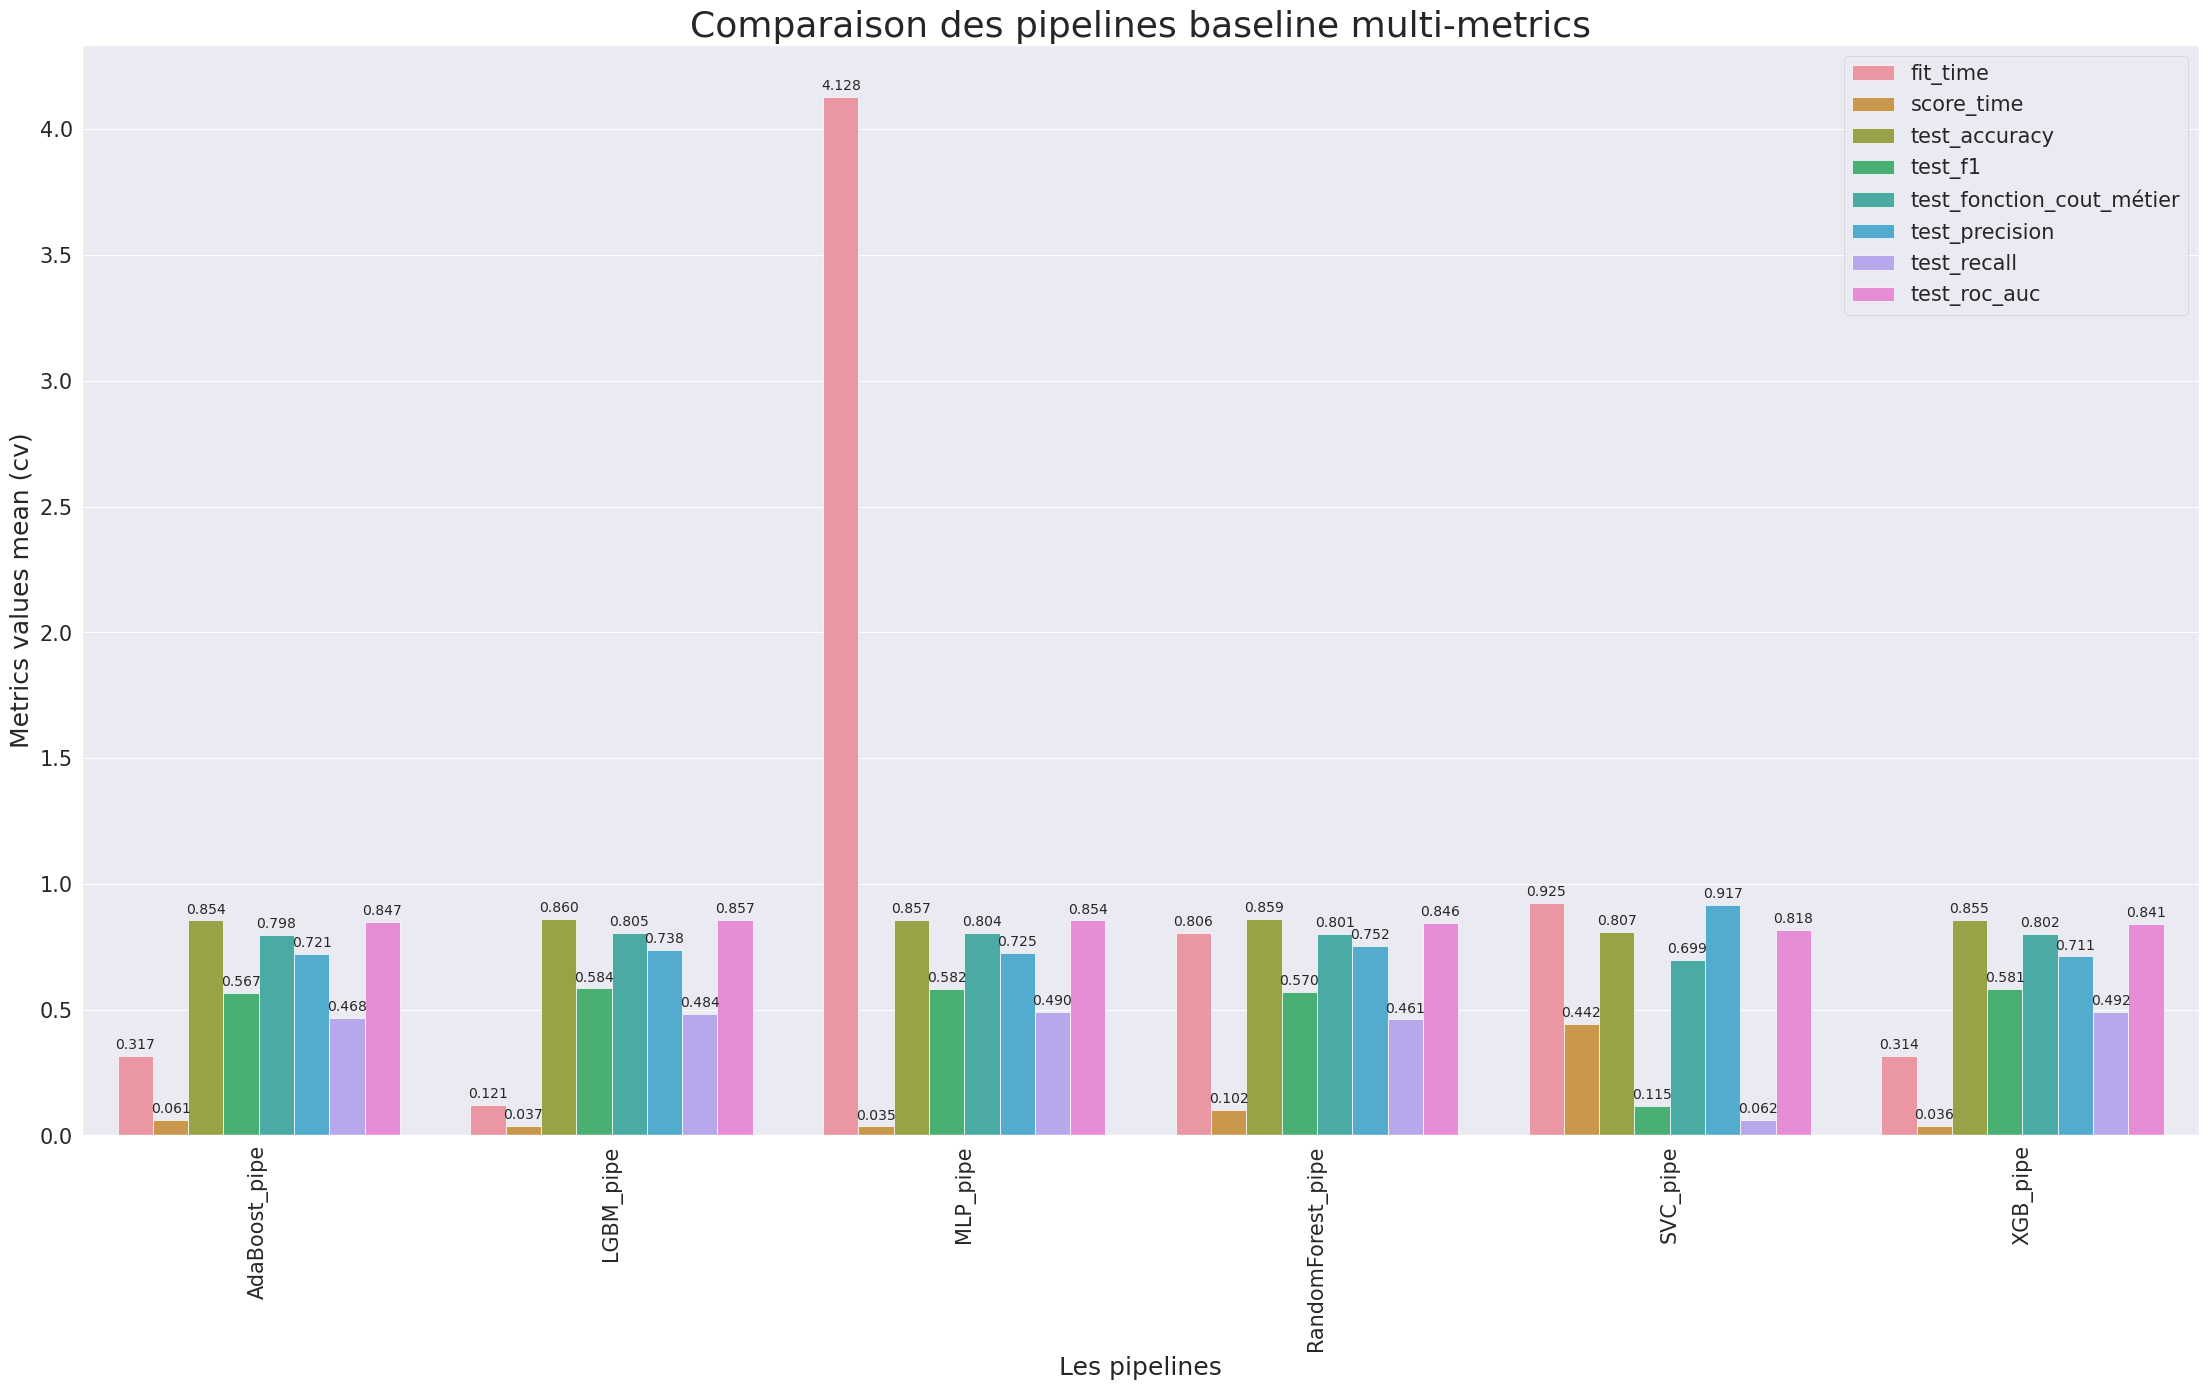

In [54]:
# Appeler methode barplot_evaluate pour comparer les metrics pour chaques pipelines 
Pipeline_Baseline_Multi_Metrics.barplot_evaluate(filter_pipes)

### Run cross validation fonction cout métier

- [X] La fonction cout metier 

   Fp = - 5: ce coefficient indique que les faux positifs sont 5 fois plus important que      les tp, tn et 2 fois moins important que les faux négatifs
   
   Fn = -10: ce coefficient indique les faux négatifs sont 2 fois plus important que les      fp et 10 fois plus important que les tp, tn

- [X] Cross validation (procédure évaluation)

    cv=5
    
    StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

- [X] Learning curve 

  Identifier les problèmes de sur-apprentissage (overfitting) ou de sous-apprentissage (underfitting) en fonction de la   taille de l'ensemble de données d'entraînement.
  Déterminer la quantité optimale de données d'entraînement nécessaires pour obtenir une performance satisfaisante.
  Évaluer la performance de différents modèles en comparant leurs courbes d'apprentissage.
  
  
- [X] Matrix confusion 

  Pour évaluer la performance des pipelines classification, afin de  comparer les           prédictions du modèle (y_pred) avec les vraies valeurs y_test.

- [X] Les pipelines à optimiser:

  Linéaire (SVC_pipe) (à surveiller car precision bien)
  
  Ensembliste (RandomForest_pipe)
  
  Boosting (AdaBoost_pip, LGBM_pipe, XGB_pipe)
       
  neural_network (MLP_pipe)

In [55]:
#instancie un objet de la classe PipelineBaselineOneMetric
Pipeline_Baseline_One_Metric = PipelineBaselineOneMetric(X_train, y_train, myscorer, dict_pipeline_baseline)

In [56]:
#Appeler la méthode run_cross_validation() pour effectuer une cross validation sur 
#plusieurs pipelines
df_results_final_1, results_CV_mean = Pipeline_Baseline_One_Metric.run_cross_validation()

DUMMY_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('dummyclassifier', DummyClassifier(random_state=77))])


Scores cv pour Dummy_pipe: [0.68067676 0.67983979 0.67983979 0.67983979 0.67983979]
Score cv mean pour Dummy_pipe: 0.6800071808418944
Score écart type cv pour Dummy_pipe: 0.00033478892010361253

LOGISTICREGRESSION_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('logisticregression', LogisticRegression(random_state=77))])


Scores cv pour LogisticRegression_pipe: [0.73570793 0.73066311 0.73048509 0.72532265 0.72763685]
Score cv mean pour LogisticRegression_pipe: 0.7299631248709568
Score écart type cv pour LogisticRegression_pipe: 0.003484557278291371

SVC_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('svc', SVC(random_state=77))])


Scores cv pour SVC_pipe: [0.7032057  0.69968847 0.70075656 0.69203382 0.69790832]
Score cv mean pour SVC_pipe: 0.6987185763862056
Score écart type cv pour SVC_pipe: 0.003756881847902687

KNN_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])


Scores cv pour KNN_pipe: [0.74372217 0.75184691 0.75229194 0.71829105 0.74321317]
Score cv mean pour KNN_pipe: 0.7418730504826658
Score écart type cv pour KNN_pipe: 0.012404490136695185

GAUSSIANNB_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('gaussiannb', GaussianNB())])


Scores cv pour GaussianNB_pipe: [0.76527159 0.74899866 0.74214508 0.74339119 0.75959057]
Score cv mean pour GaussianNB_pipe: 0.7518794189224696
Score écart type cv pour GaussianNB_pipe: 0.009098551987168755

SGD_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('sgdclassifier', SGDClassifier(random_state=77))])


Scores cv pour SGD_pipe: [0.7522707  0.71989319 0.73146417 0.73929684 0.71775701]
Score cv mean pour SGD_pipe: 0.7321363836852223
Score écart type cv pour SGD_pipe: 0.012757562556846043

DECISIONTREE_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=77))])


Scores cv pour DecisionTree_pipe: [0.77346394 0.7564753  0.74276814 0.74463729 0.75193591]
Score cv mean pour DecisionTree_pipe: 0.7538561160601589
Score écart type cv pour DecisionTree_pipe: 0.010981292212940445

RANDOMFOREST_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=77))])


Scores cv pour RandomForest_pipe: [0.82635797 0.79706275 0.79012016 0.79875389 0.79154428]
Score cv mean pour RandomForest_pipe: 0.800767811123251
Score écart type cv pour RandomForest_pipe: 0.013199132755416126

ADABOOST_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=77))])


Scores cv pour AdaBoost_pipe: [0.82128228 0.79706275 0.78495772 0.80169114 0.78549177]
Score cv mean pour AdaBoost_pipe: 0.7980971323791374
Score écart type cv pour AdaBoost_pipe: 0.01328967477445877

XGB_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('xgbclass...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=77, ...))])


Scores cv pour XGB_pipe: [0.81861086 0.79252336 0.78388963 0.81593235 0.80062305]
Score cv mean pour XGB_pipe: 0.8023158532143977
Score écart type cv pour XGB_pipe: 0.013335820607775419

LGBM_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=77))])


Scores cv pour LGBM_pipe: [0.82430988 0.79830886 0.79003115 0.81851357 0.79332443]
Score cv mean pour LGBM_pipe: 0.8048975798739866
Score écart type cv pour LGBM_pipe: 0.013860681968381312

MLP_PIPE


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('discrete_vars',
                                                  'passthrough',
                                                  ['credit_card',
                                                   'active_member']),
                                                 ('cat_vars', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('continuous_vars',
                                                  PowerTransformer(),
                                                  ['balance',
                                                   'estimated_salary',
                                                   'credit_score', 'age']),
                                                 ('ordinal_vars',
                                                  OrdinalEncoder(),
                                                  ['tenure',
                                                   'products_number'])])),
                ('mlpclassifier', MLPClassifier(random_state=77))])


Scores cv pour MLP_pipe: [0.83116652 0.79875389 0.78842902 0.79991099 0.8011571 ]
Score cv mean pour MLP_pipe: 0.8038835039179577
Score écart type cv pour MLP_pipe: 0.014371715872207771



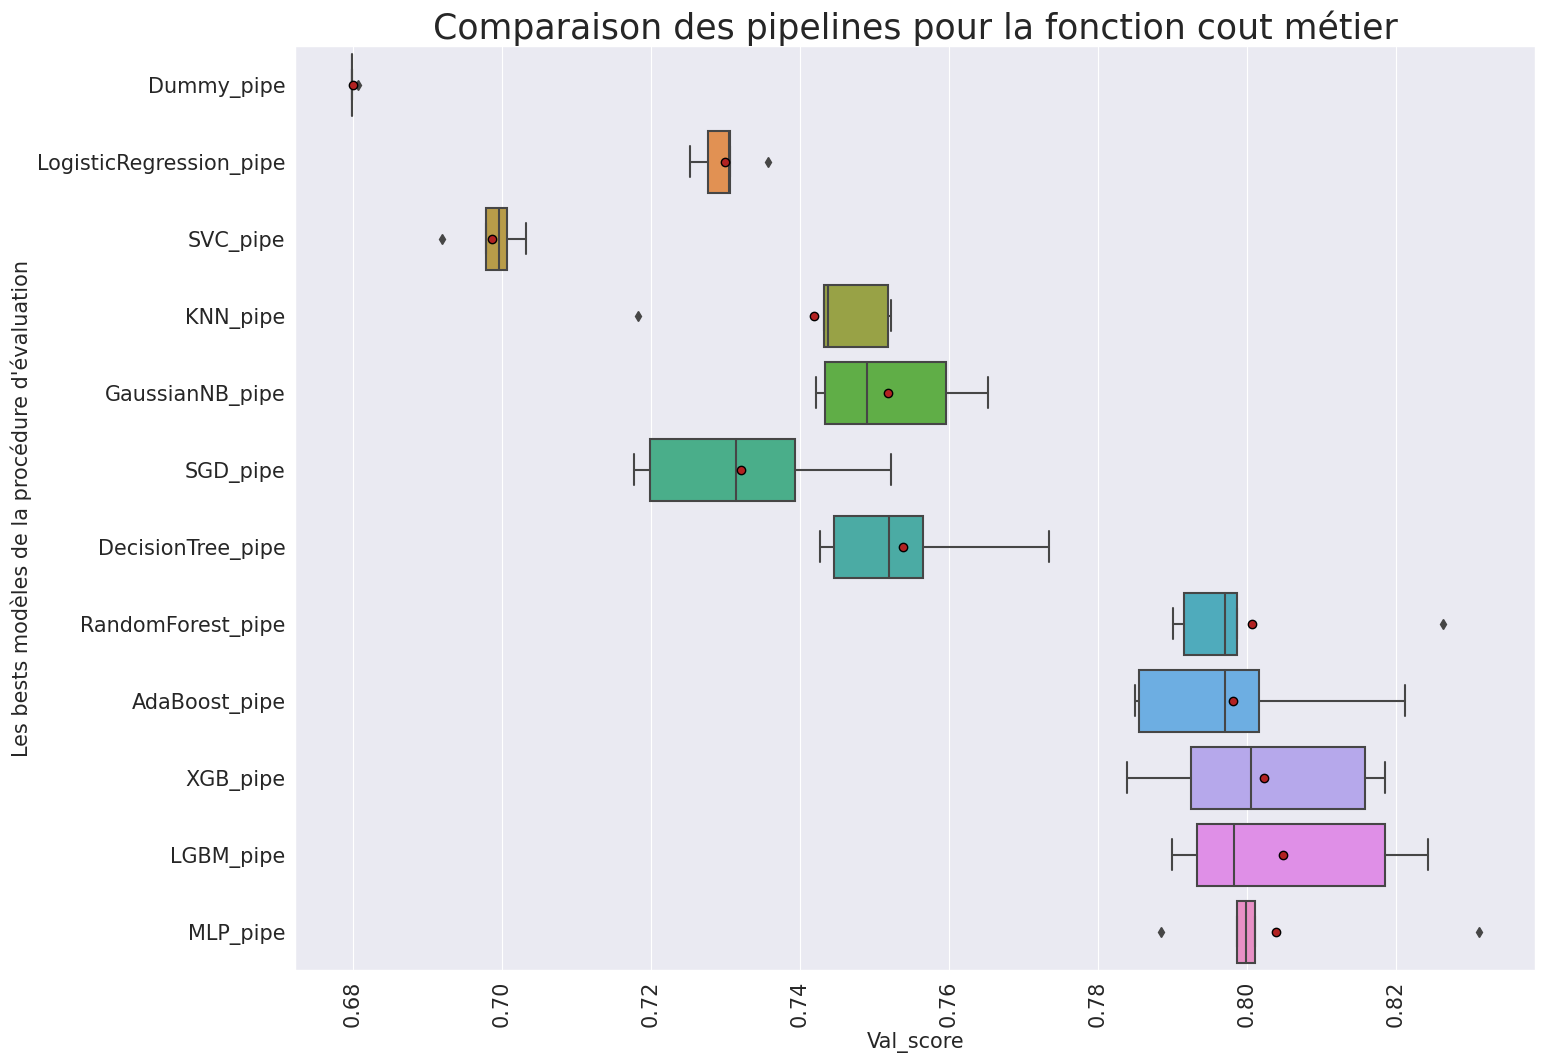

In [57]:
# Appeler methode boxplot_evaluate pour visualiser boxplot des différentes pipelines
Pipeline_Baseline_One_Metric.boxplot_evaluate(df_results_final_1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


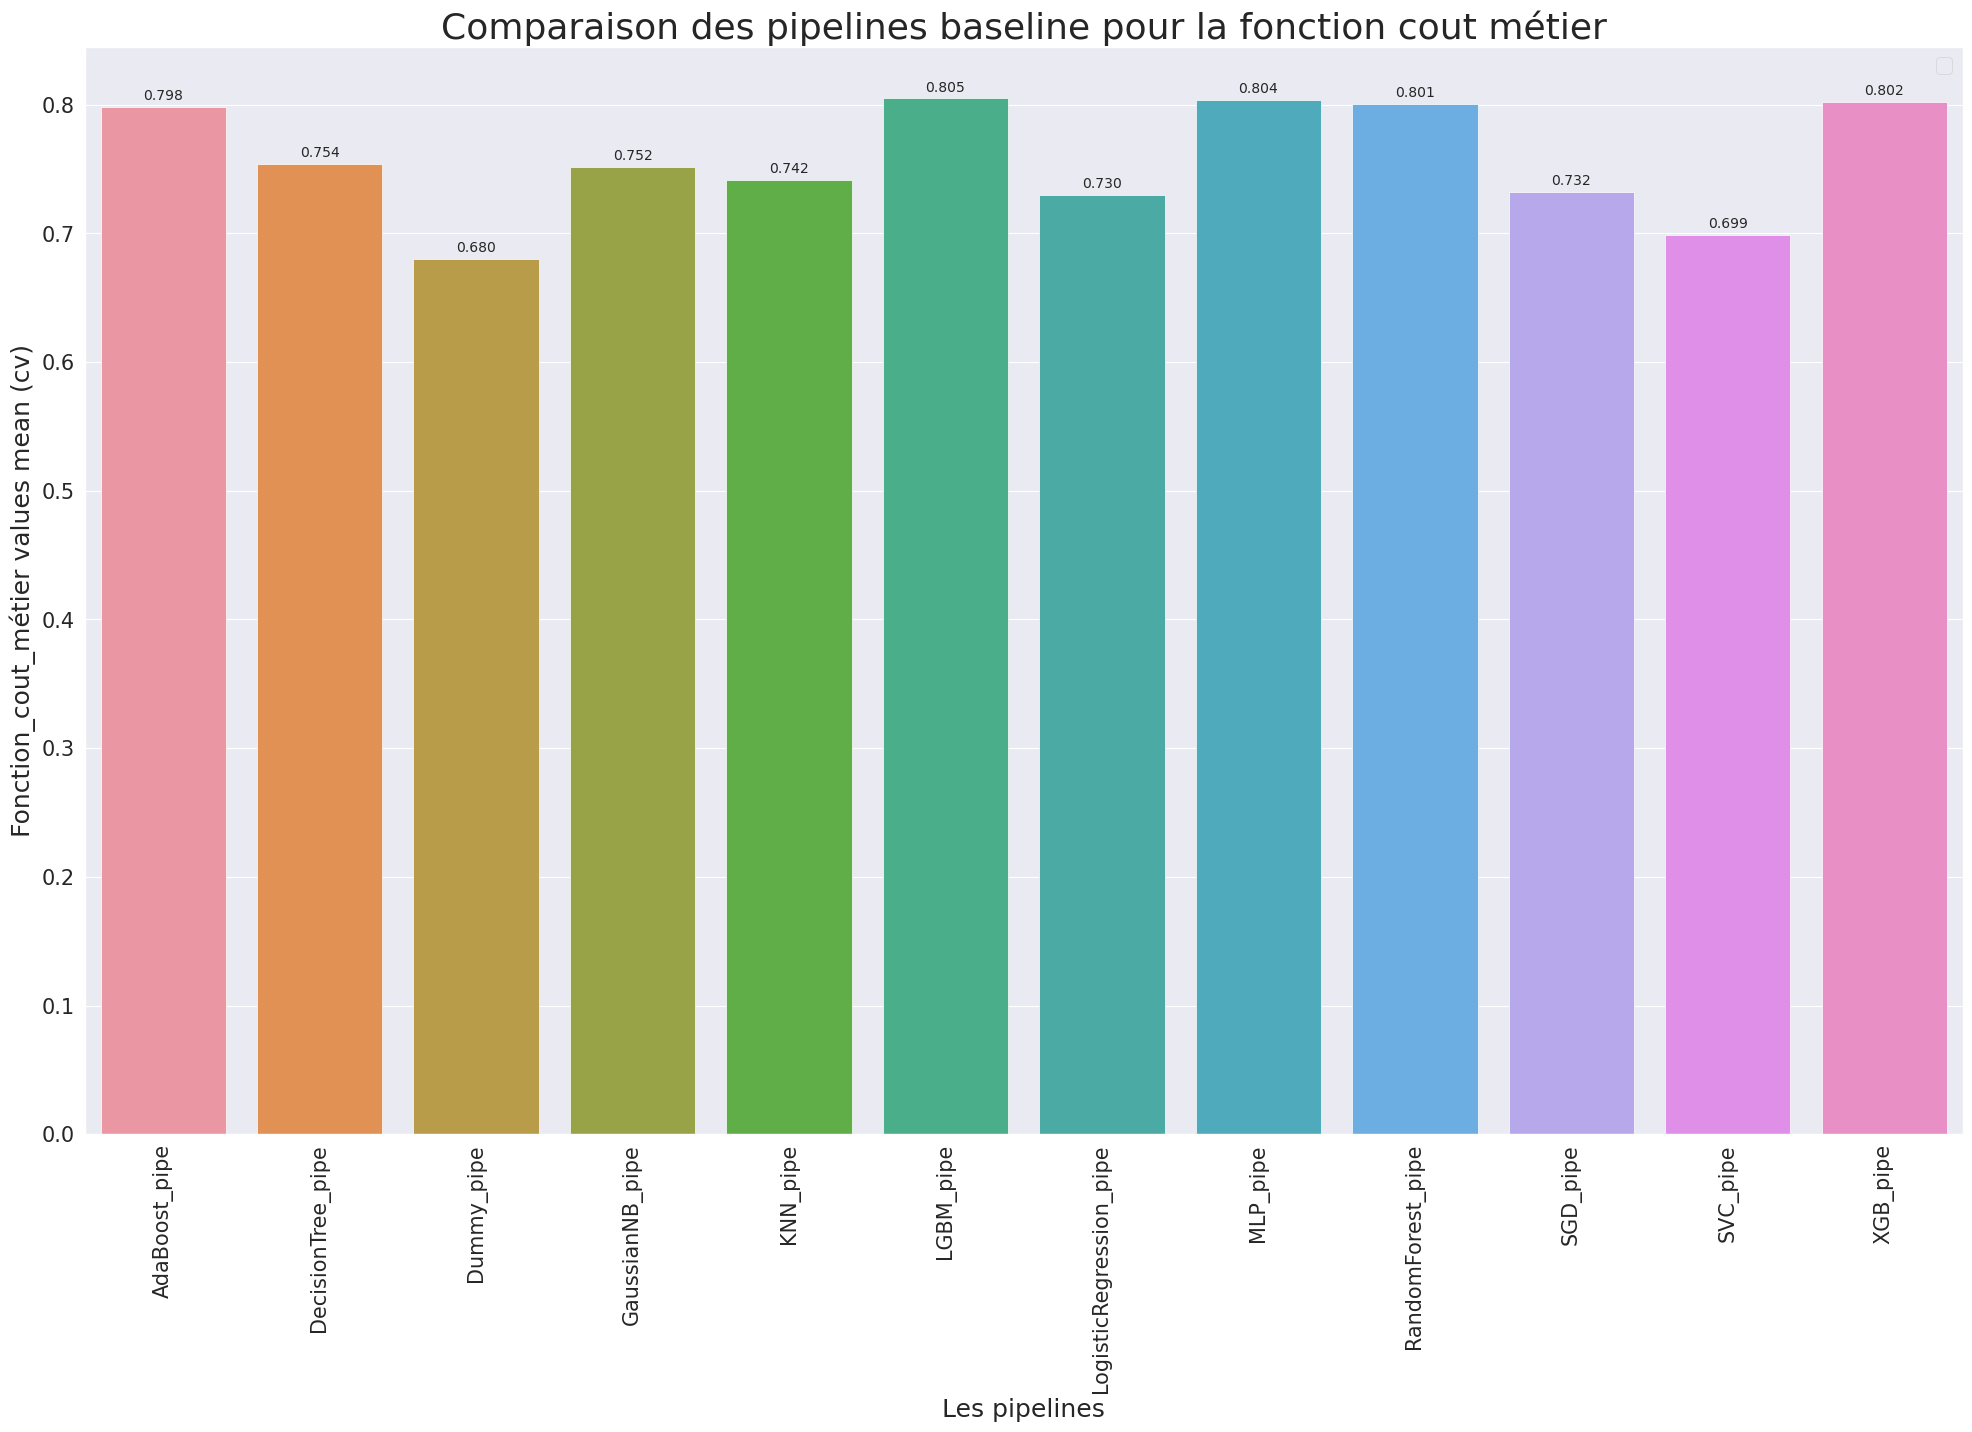

In [58]:
# Apppeler methode barplot_evaluate pour voir 
# le score moyen CV pour les différentes pipelines
Pipeline_Baseline_One_Metric.barplot_evaluate(results_CV_mean)

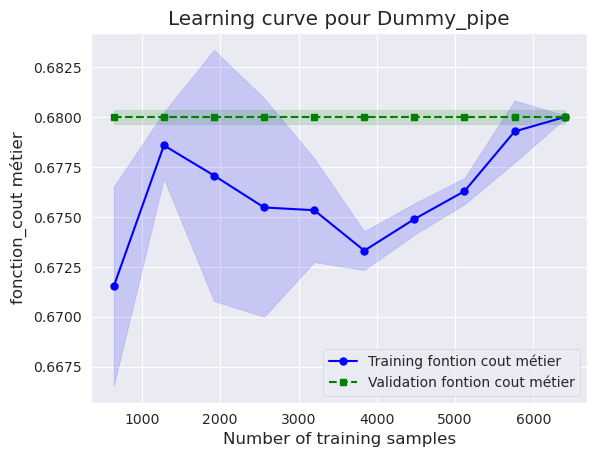

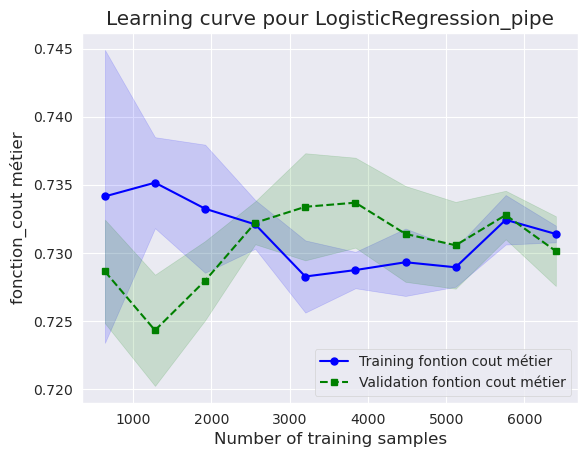

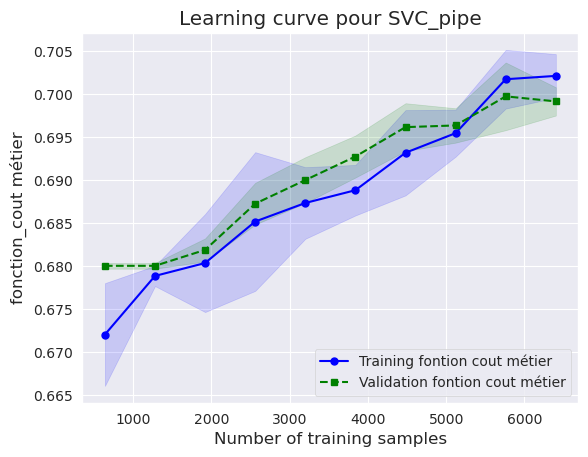

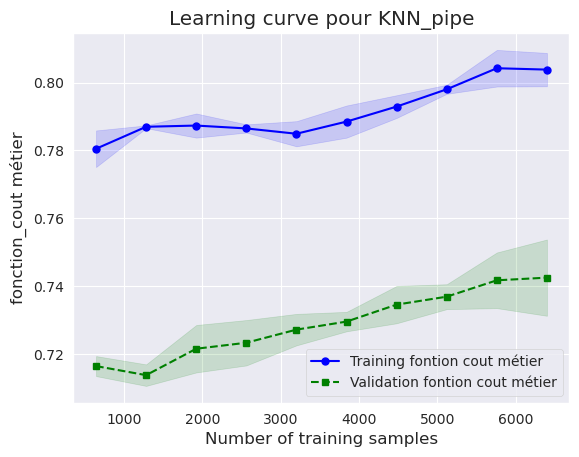

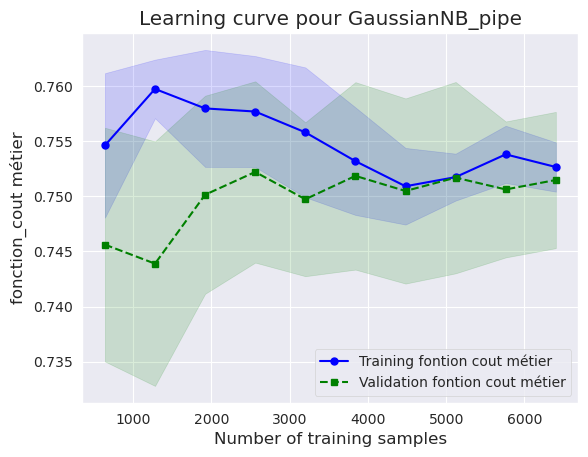

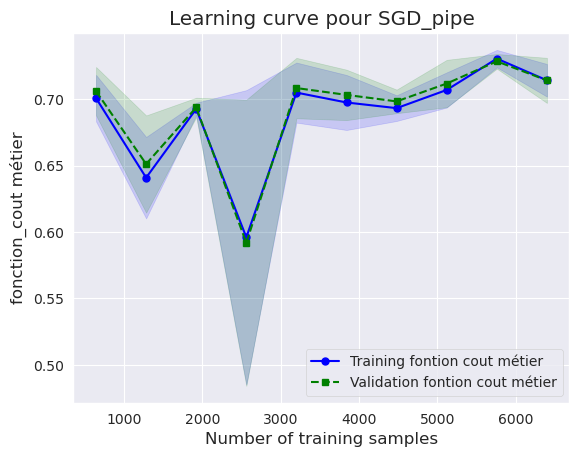

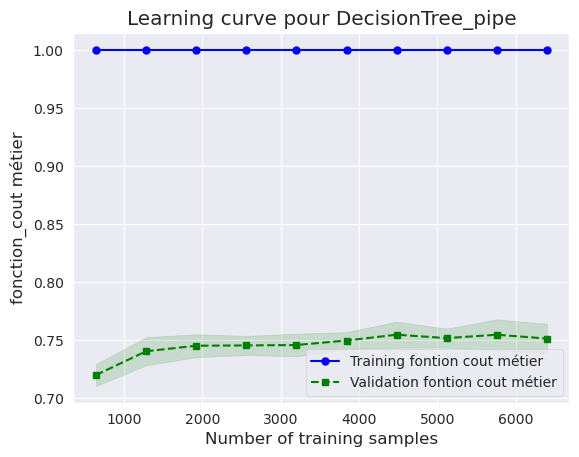

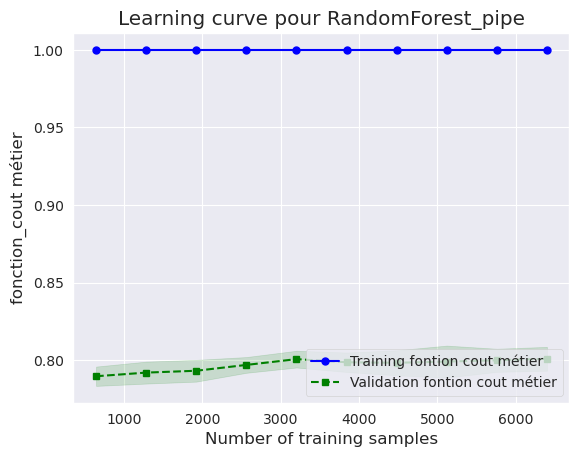

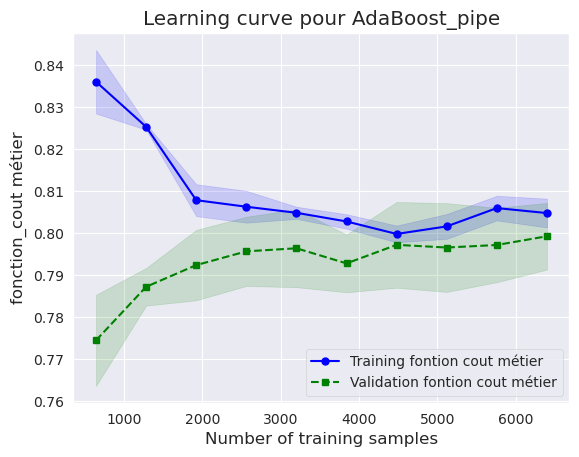

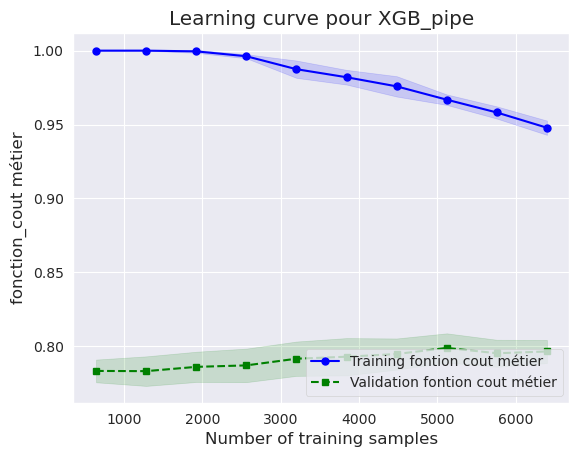

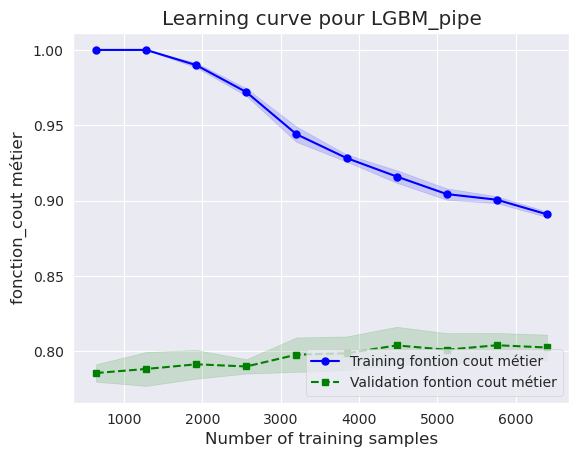

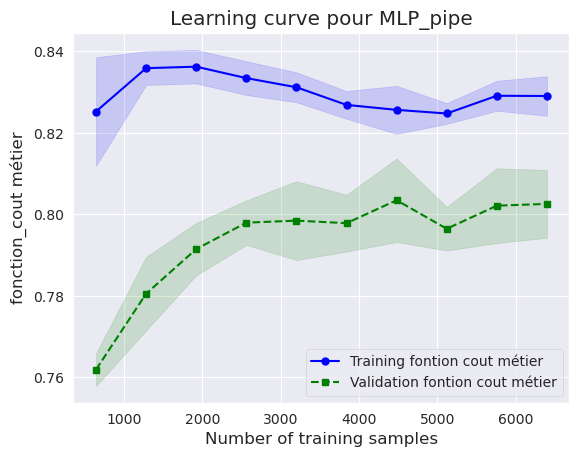

In [59]:
# Appeler methode learning_curve
# pour visualiser les courbes d'apprentissages afin de verifier overfitting ou underfitting pour les pipelines
Pipeline_Baseline_One_Metric.learning_curve()

------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE Dummy_pipe BASELINE SUR LES DONNÉES DE TEST



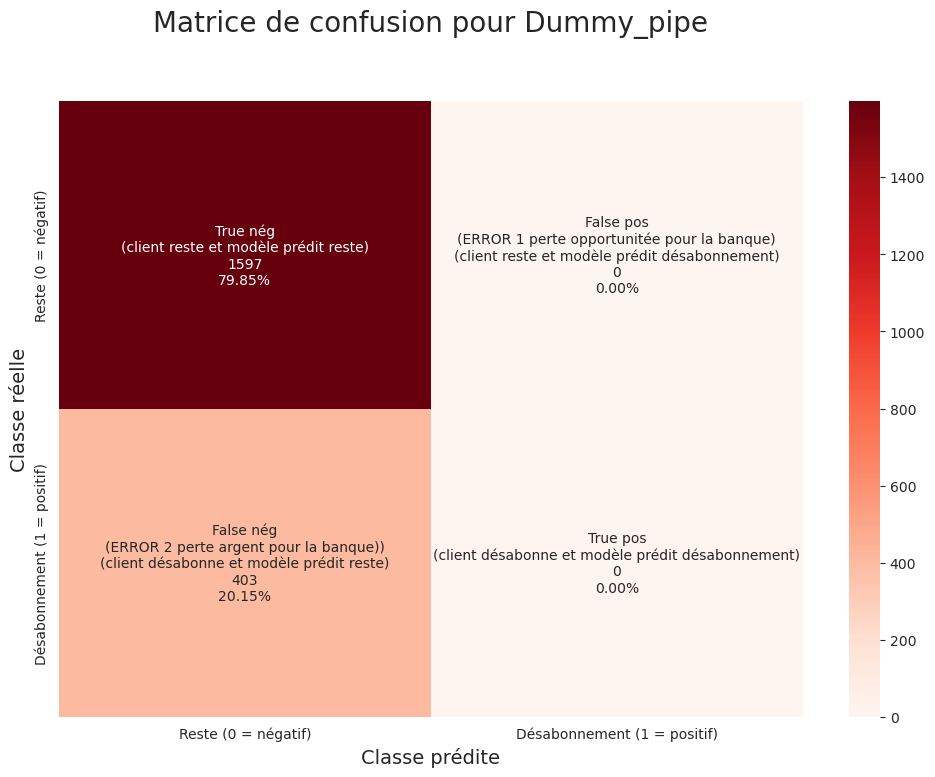


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1597
           1       0.00      0.00      0.00       403

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE LogisticRegression_pipe BASELINE SUR LES DONNÉES DE TEST



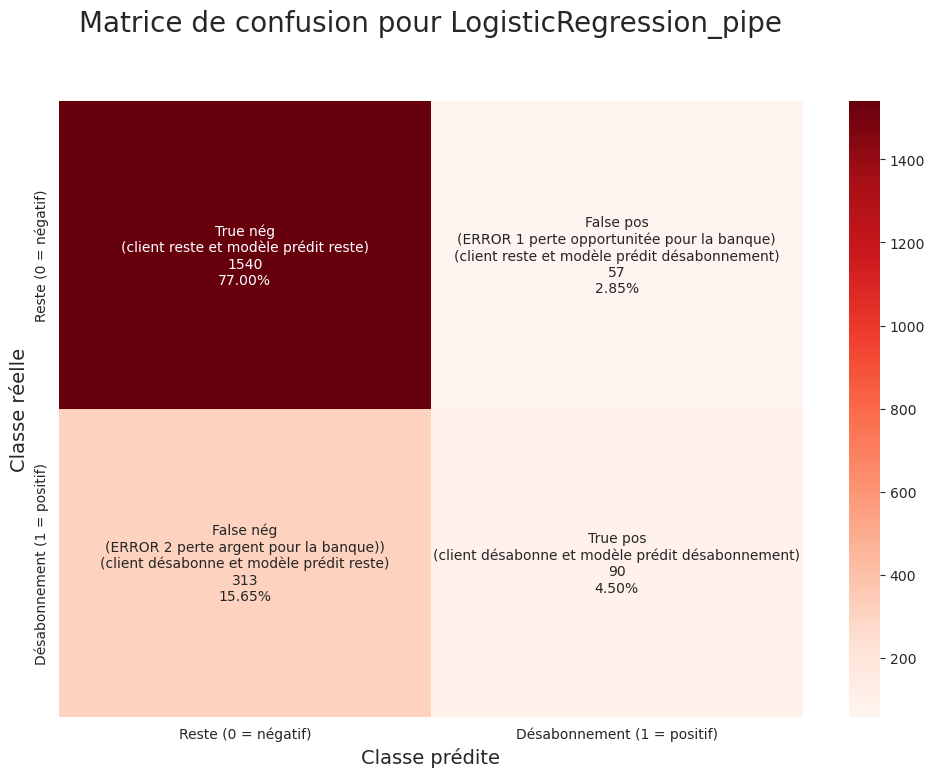


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1597
           1       0.61      0.22      0.33       403

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.79      0.81      0.78      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE SVC_pipe BASELINE SUR LES DONNÉES DE TEST



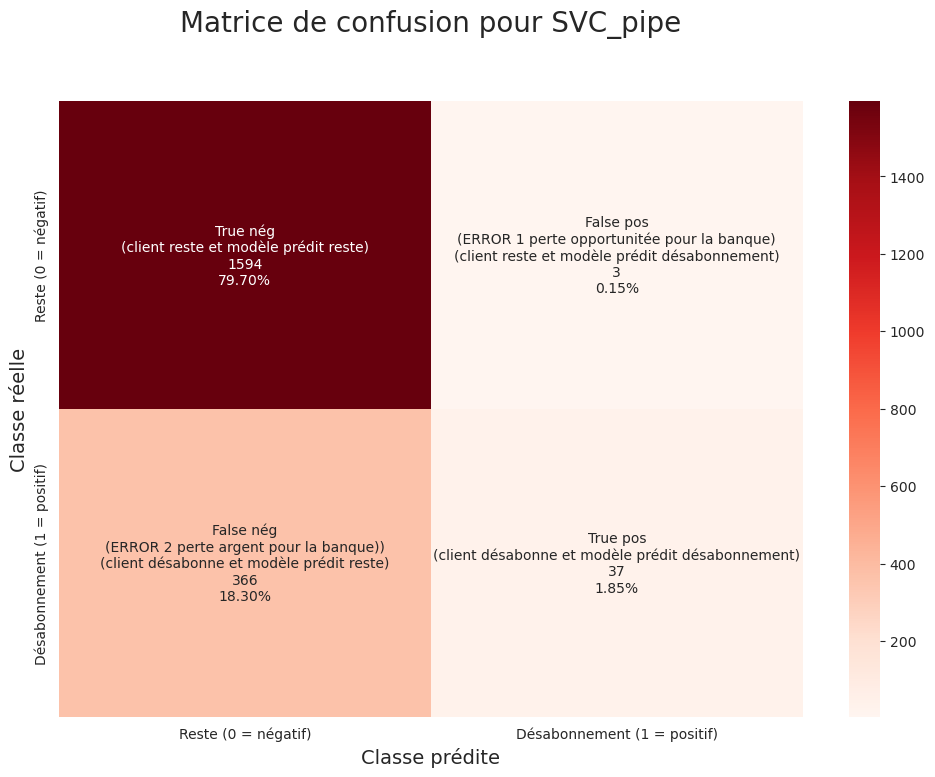


              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1597
           1       0.93      0.09      0.17       403

    accuracy                           0.82      2000
   macro avg       0.87      0.54      0.53      2000
weighted avg       0.84      0.82      0.75      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE KNN_pipe BASELINE SUR LES DONNÉES DE TEST



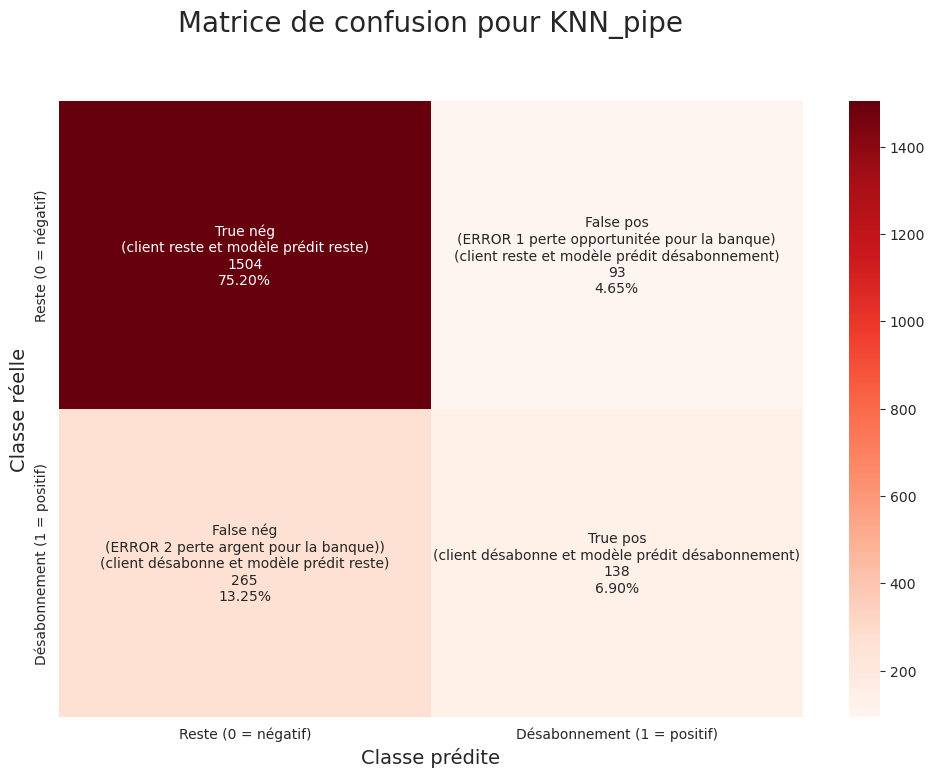


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1597
           1       0.60      0.34      0.44       403

    accuracy                           0.82      2000
   macro avg       0.72      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE GaussianNB_pipe BASELINE SUR LES DONNÉES DE TEST



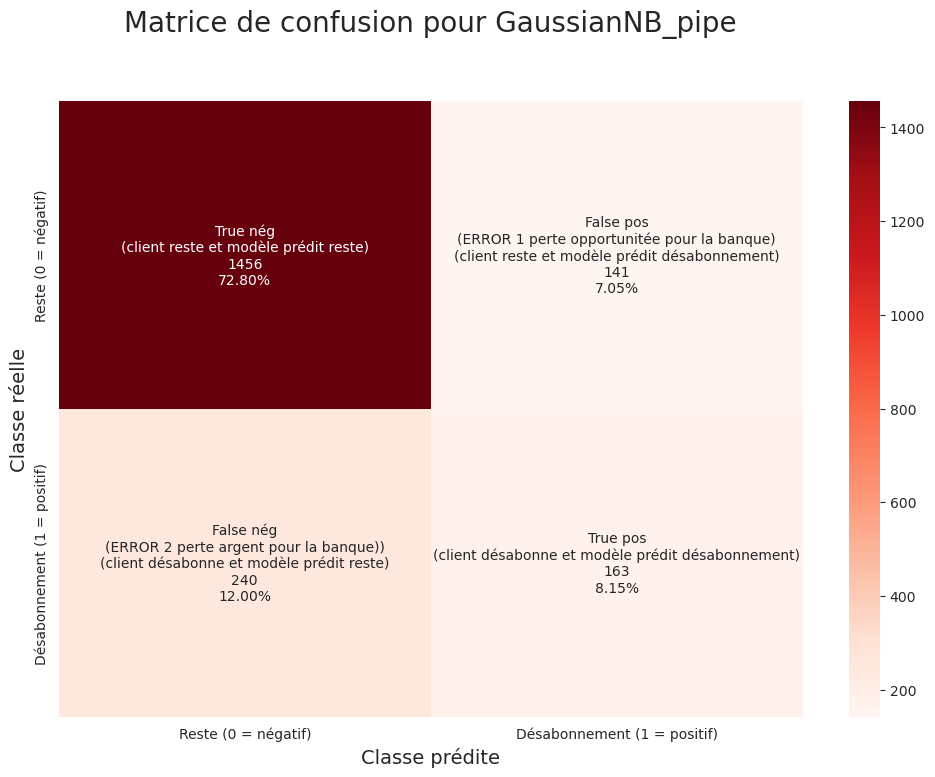


              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1597
           1       0.54      0.40      0.46       403

    accuracy                           0.81      2000
   macro avg       0.70      0.66      0.67      2000
weighted avg       0.79      0.81      0.80      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE SGD_pipe BASELINE SUR LES DONNÉES DE TEST



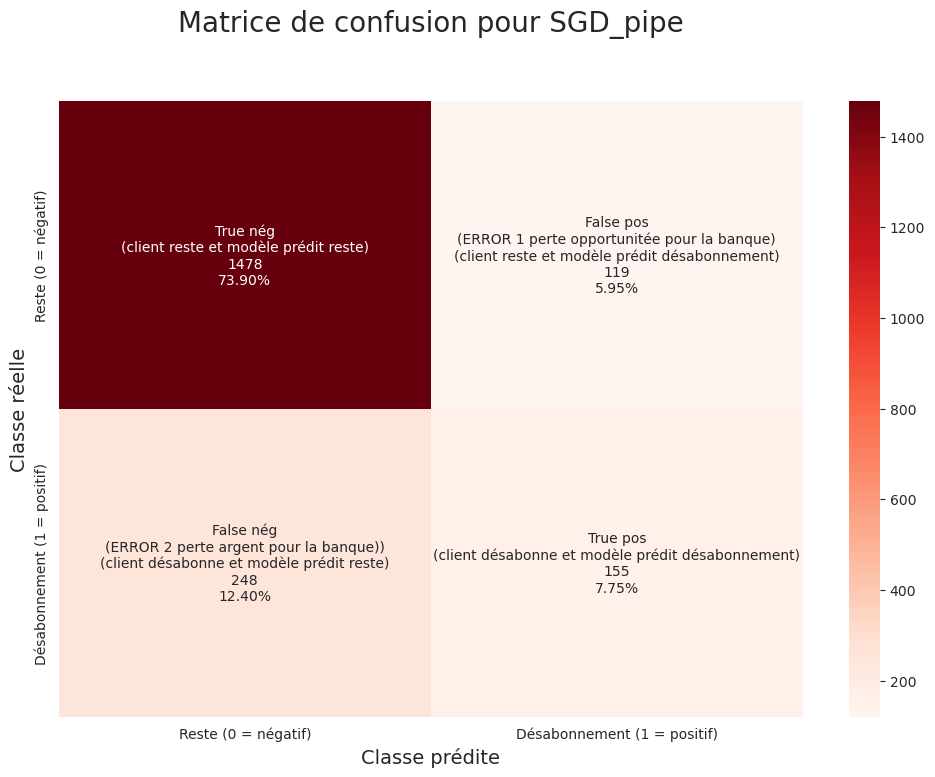


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1597
           1       0.57      0.38      0.46       403

    accuracy                           0.82      2000
   macro avg       0.71      0.66      0.67      2000
weighted avg       0.80      0.82      0.80      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE DecisionTree_pipe BASELINE SUR LES DONNÉES DE TEST



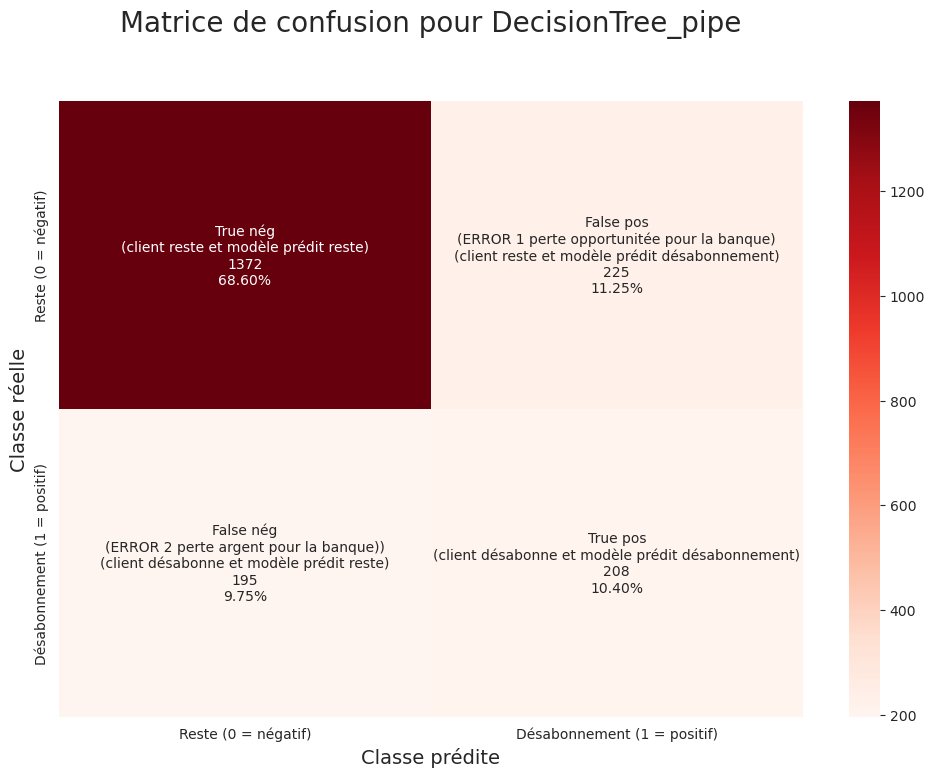


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1597
           1       0.48      0.52      0.50       403

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE RandomForest_pipe BASELINE SUR LES DONNÉES DE TEST



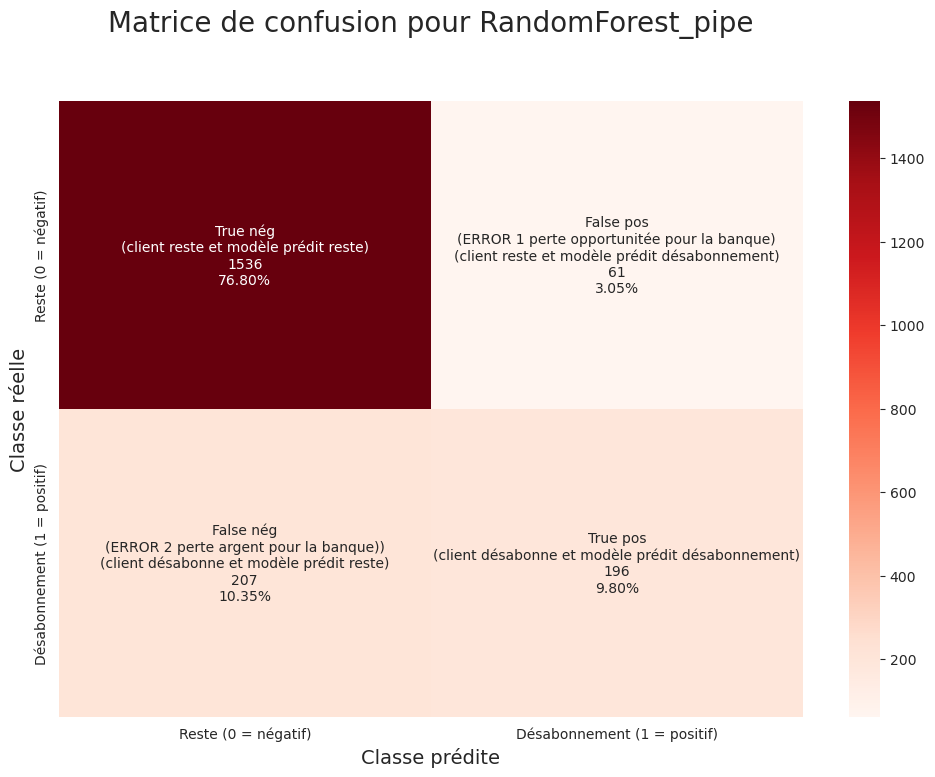


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1597
           1       0.76      0.49      0.59       403

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE AdaBoost_pipe BASELINE SUR LES DONNÉES DE TEST



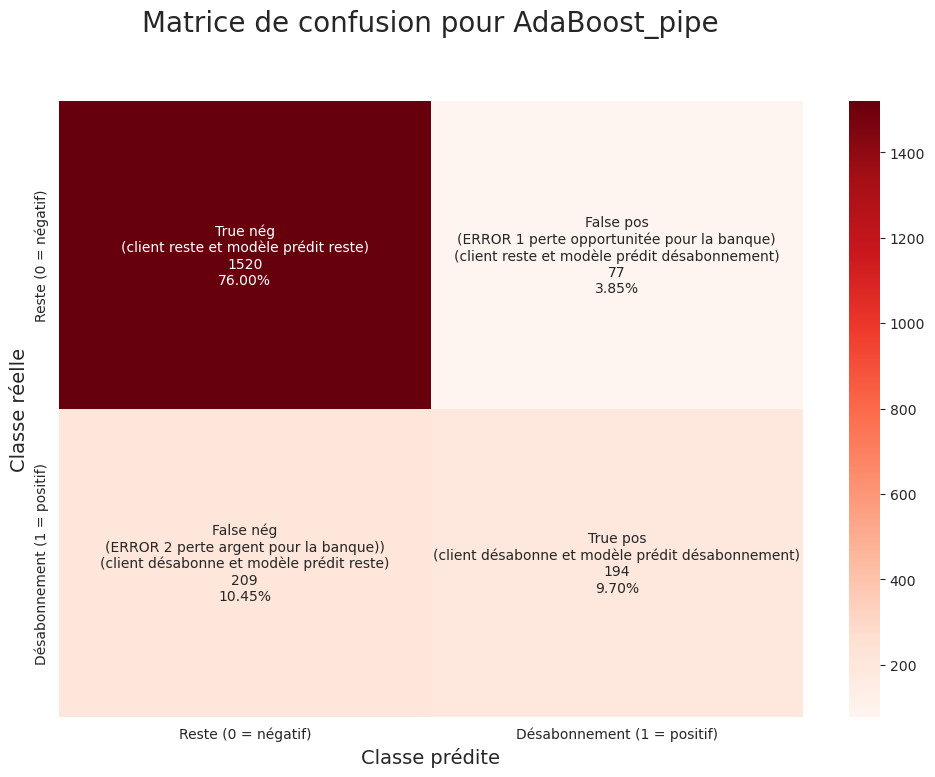


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1597
           1       0.72      0.48      0.58       403

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE XGB_pipe BASELINE SUR LES DONNÉES DE TEST



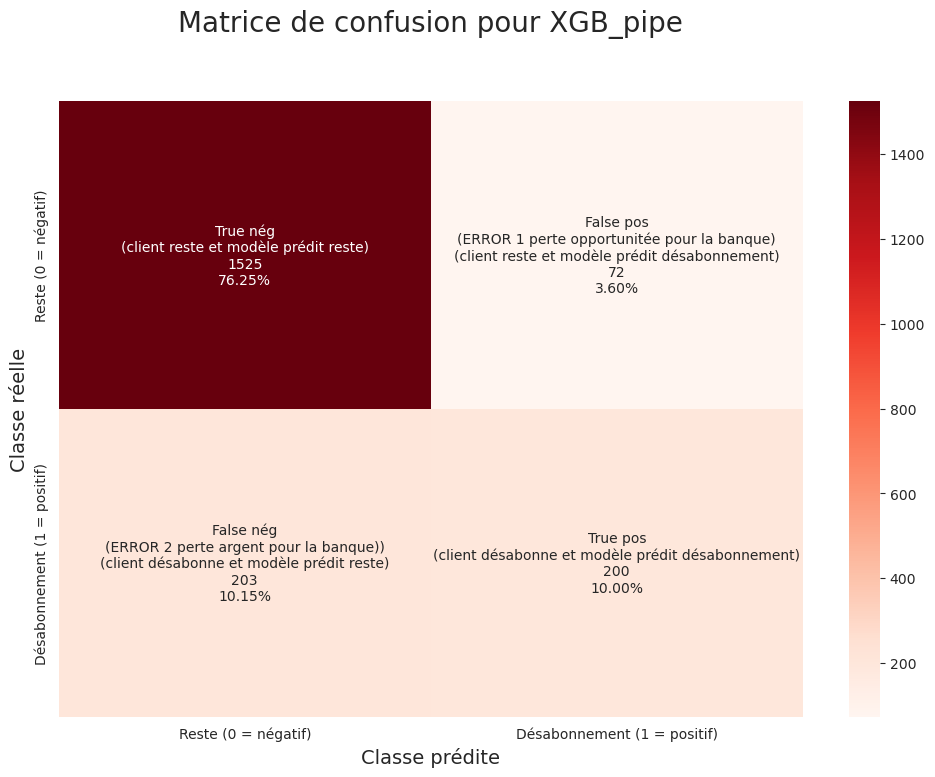


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1597
           1       0.74      0.50      0.59       403

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE LGBM_pipe BASELINE SUR LES DONNÉES DE TEST



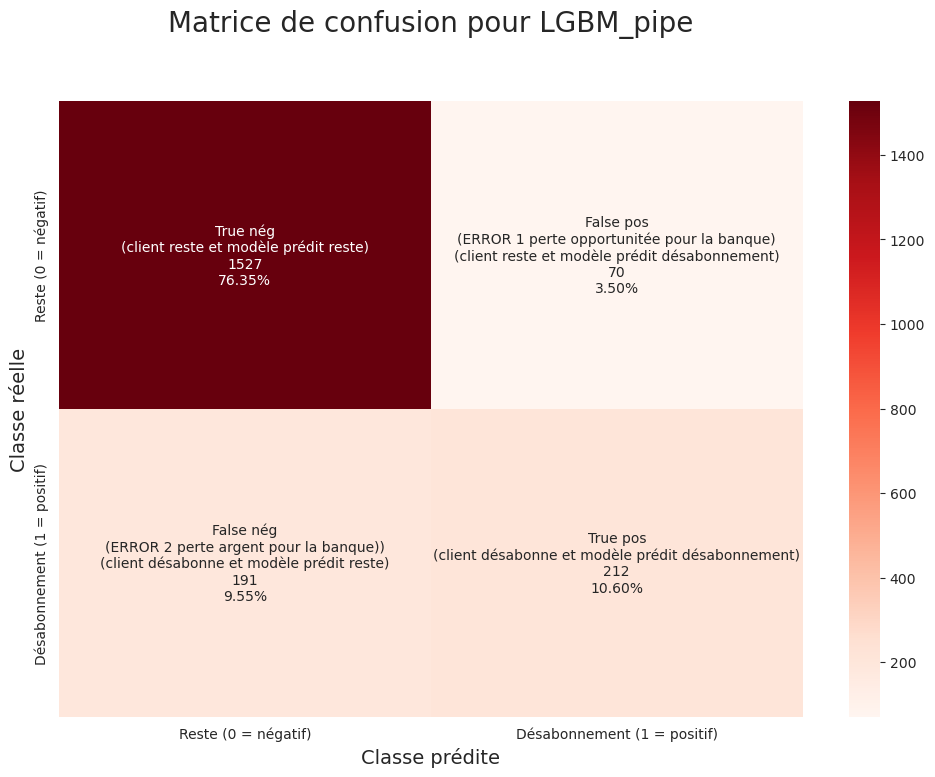


              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1597
           1       0.75      0.53      0.62       403

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000


------------------------------------------------------------------------------------------------------------------------

EVALUATION DE LA PIPELINE MLP_pipe BASELINE SUR LES DONNÉES DE TEST



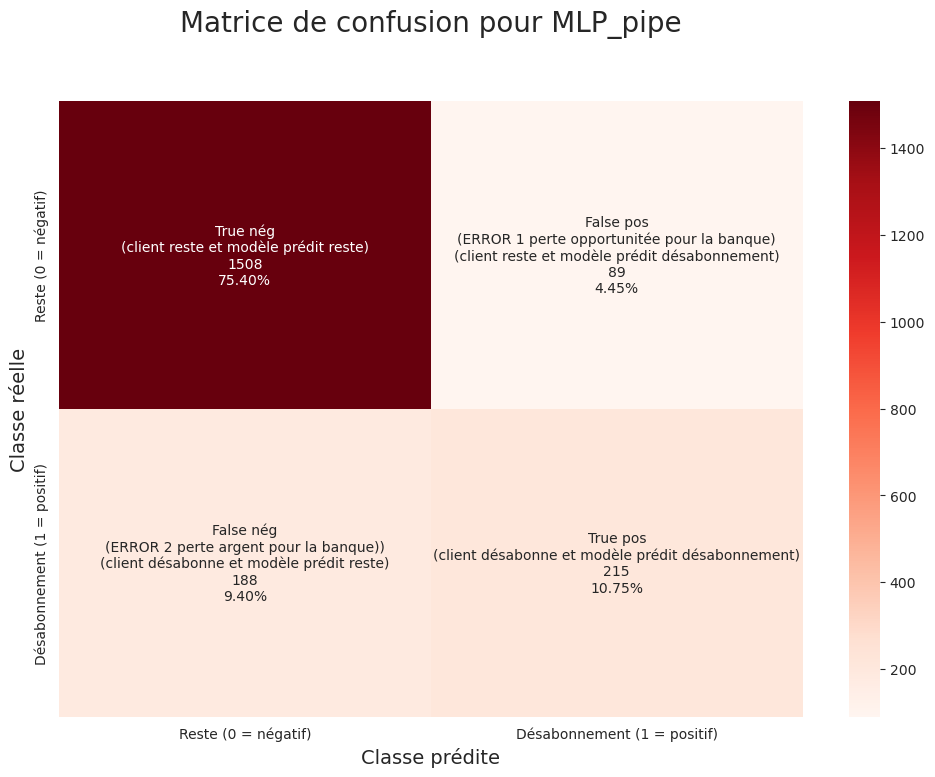


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1597
           1       0.71      0.53      0.61       403

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000




In [60]:
# Appeler methode evaluate_new_data pour evaluer les pipelines sur les données test
#pipeline.fit(X_train, y_train) et évaluer les pipelines avec les ypred = pipeline.predict(X_test)
Pipeline_Baseline_One_Metric.evaluate_new_data(X_test, y_test)

# 7) Optimisation pipelines

In [ ]:
def objective(trial):
  
    n_estimators = trial.suggest_int('LGBM__n_estimators', 400,2000)
    max_depth = trial.suggest_int('LGBM__max_depth', 2,16)
    num_leaves = trial.suggest_int('LGBM__num_leaves', 20,600)
    learning_rate = trial.suggest_float('LGBM__learning_rate ', 0.001, 0.2)
    reg_alpha = trial.suggest_float('LGBM__reg_alpha', 0, 10)
    reg_lambda = trial.suggest_float('LGBM__reg_lambda', 0, 10)
    #min_split_gain = trial.suggest_float('LGBM__min_split_gain', 0.3, 0.4)
    k = trial.suggest_int('SelectKBest__k', 20, 140)
    #n_neighbors = trial.suggest_int('imputer_n_neighbors', 2, 5)
    class_weight = trial.suggest_categorical('LGBM_class_weight',[None, "balanced"])


    numeric_NaN_transformer = Pipeline([('imputer', SimpleImputer(strategy='median'))])



    # appliquer les transformations sur les features 
    preprocessor_under =  make_column_transformer(#(numeric_transformer, colonnes_numériques),
                                             ('passthrough' ,colonnes_numériques ),
                                             (numeric_NaN_transformer, colonnes_numériques_avec_valeurs_manquantes))
     
     
     
    
    pipe_LGBM_class_weight = Pipeline([('transform',preprocessor_under),('SelectKBest', SelectKBest(k=k)),('LGBM',LGBMClassifier(class_weight=class_weight,max_depth=max_depth, n_estimators=n_estimators, 
                                                                                                                                            learning_rate=learning_rate, num_leaves=num_leaves,
                                                                                                                                       random_state=7,reg_alpha=reg_alpha, reg_lambda=reg_lambda))])
     
    
   

    score = cross_val_score(pipe_LGBM_class_weight, X_train , y_train, cv=stratified_Kfold,scoring=myscorer)
    myscorer_mean = score.mean()
    return  myscorer_mean

mlflc = MLflowCallback(
    tracking_uri="server URI", # mettre URI server 
    metric_name="cost_function_métier")


study = optuna.create_study(direction="maximize", study_name="LGBM_oversampling_class weight")
study.optimize(objective, n_trials= 20, show_progress_bar = True, callbacks=[mlflc])
callbacks=[mlflc]
print(study.best_trial)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('\tValue: {}'.format(trial.value))
print('\tParams: ')
for key, value in trial.params.items():
    print('\t\t{}: {}'.format(key, value))

